In [15]:
import datetime
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme(context='talk', style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# для графиков, где надо много цветов, юзайте воть:
sns.set_palette(sns.color_palette('deep'))
# а по дефолту воть:
sns.set_palette(sns.color_palette("BuGn_r", n_colors=10)[2::3])
pd.set_option('display.max_columns', 60)

In [16]:
df = pd.read_pickle("feeding_and_details.pkl")

In [17]:
monthly_feeding = pd.read_excel("datasets/Ekoniva_dataset.xlsx", sheet_name="Feeding (monthly)")
herd_metrics = pd.read_excel("datasets/Ekoniva_dataset.xlsx", sheet_name="Herd maintenance", header=1, skiprows=[2]).replace("-", np.nan)
production_indicators = pd.read_excel("datasets/Ekoniva_dataset.xlsx", sheet_name="Dairy indicators", header=1, skiprows=[2]).replace("-", np.nan)

<Axes: xlabel='RationPart', ylabel='Count'>

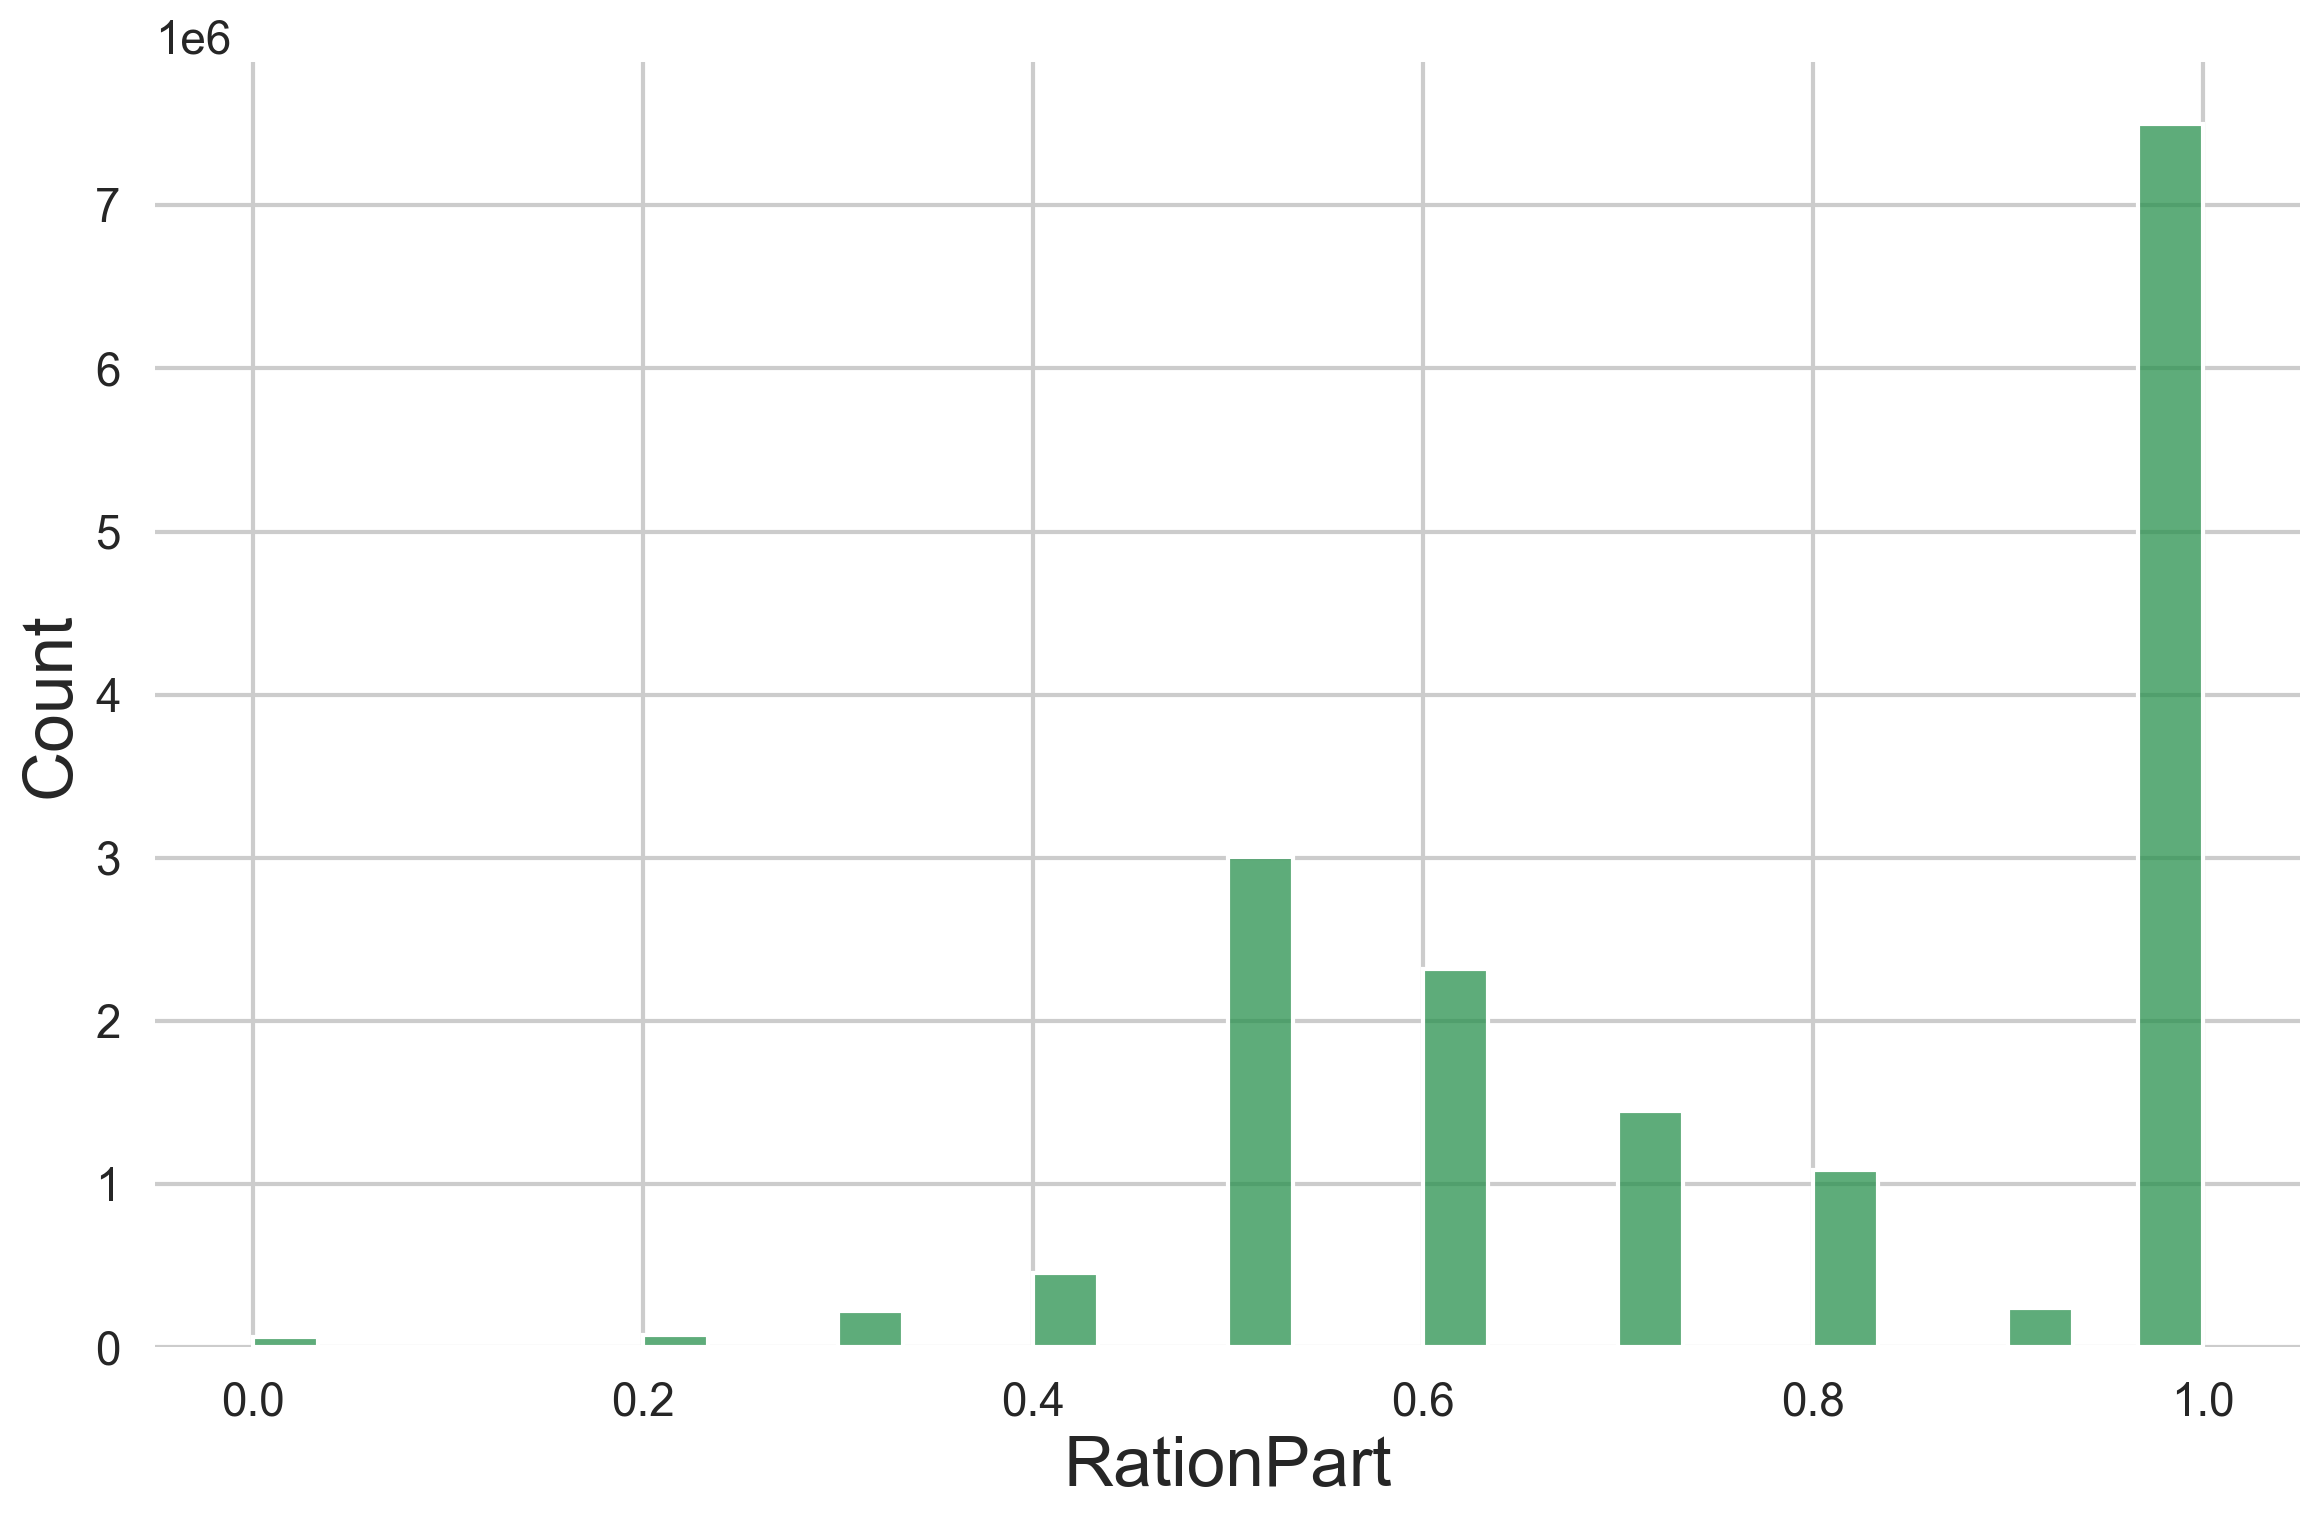

In [18]:
sns.histplot(df.RationPart, bins=30)

<Axes: xlabel='milk_cows', ylabel='bull_num'>

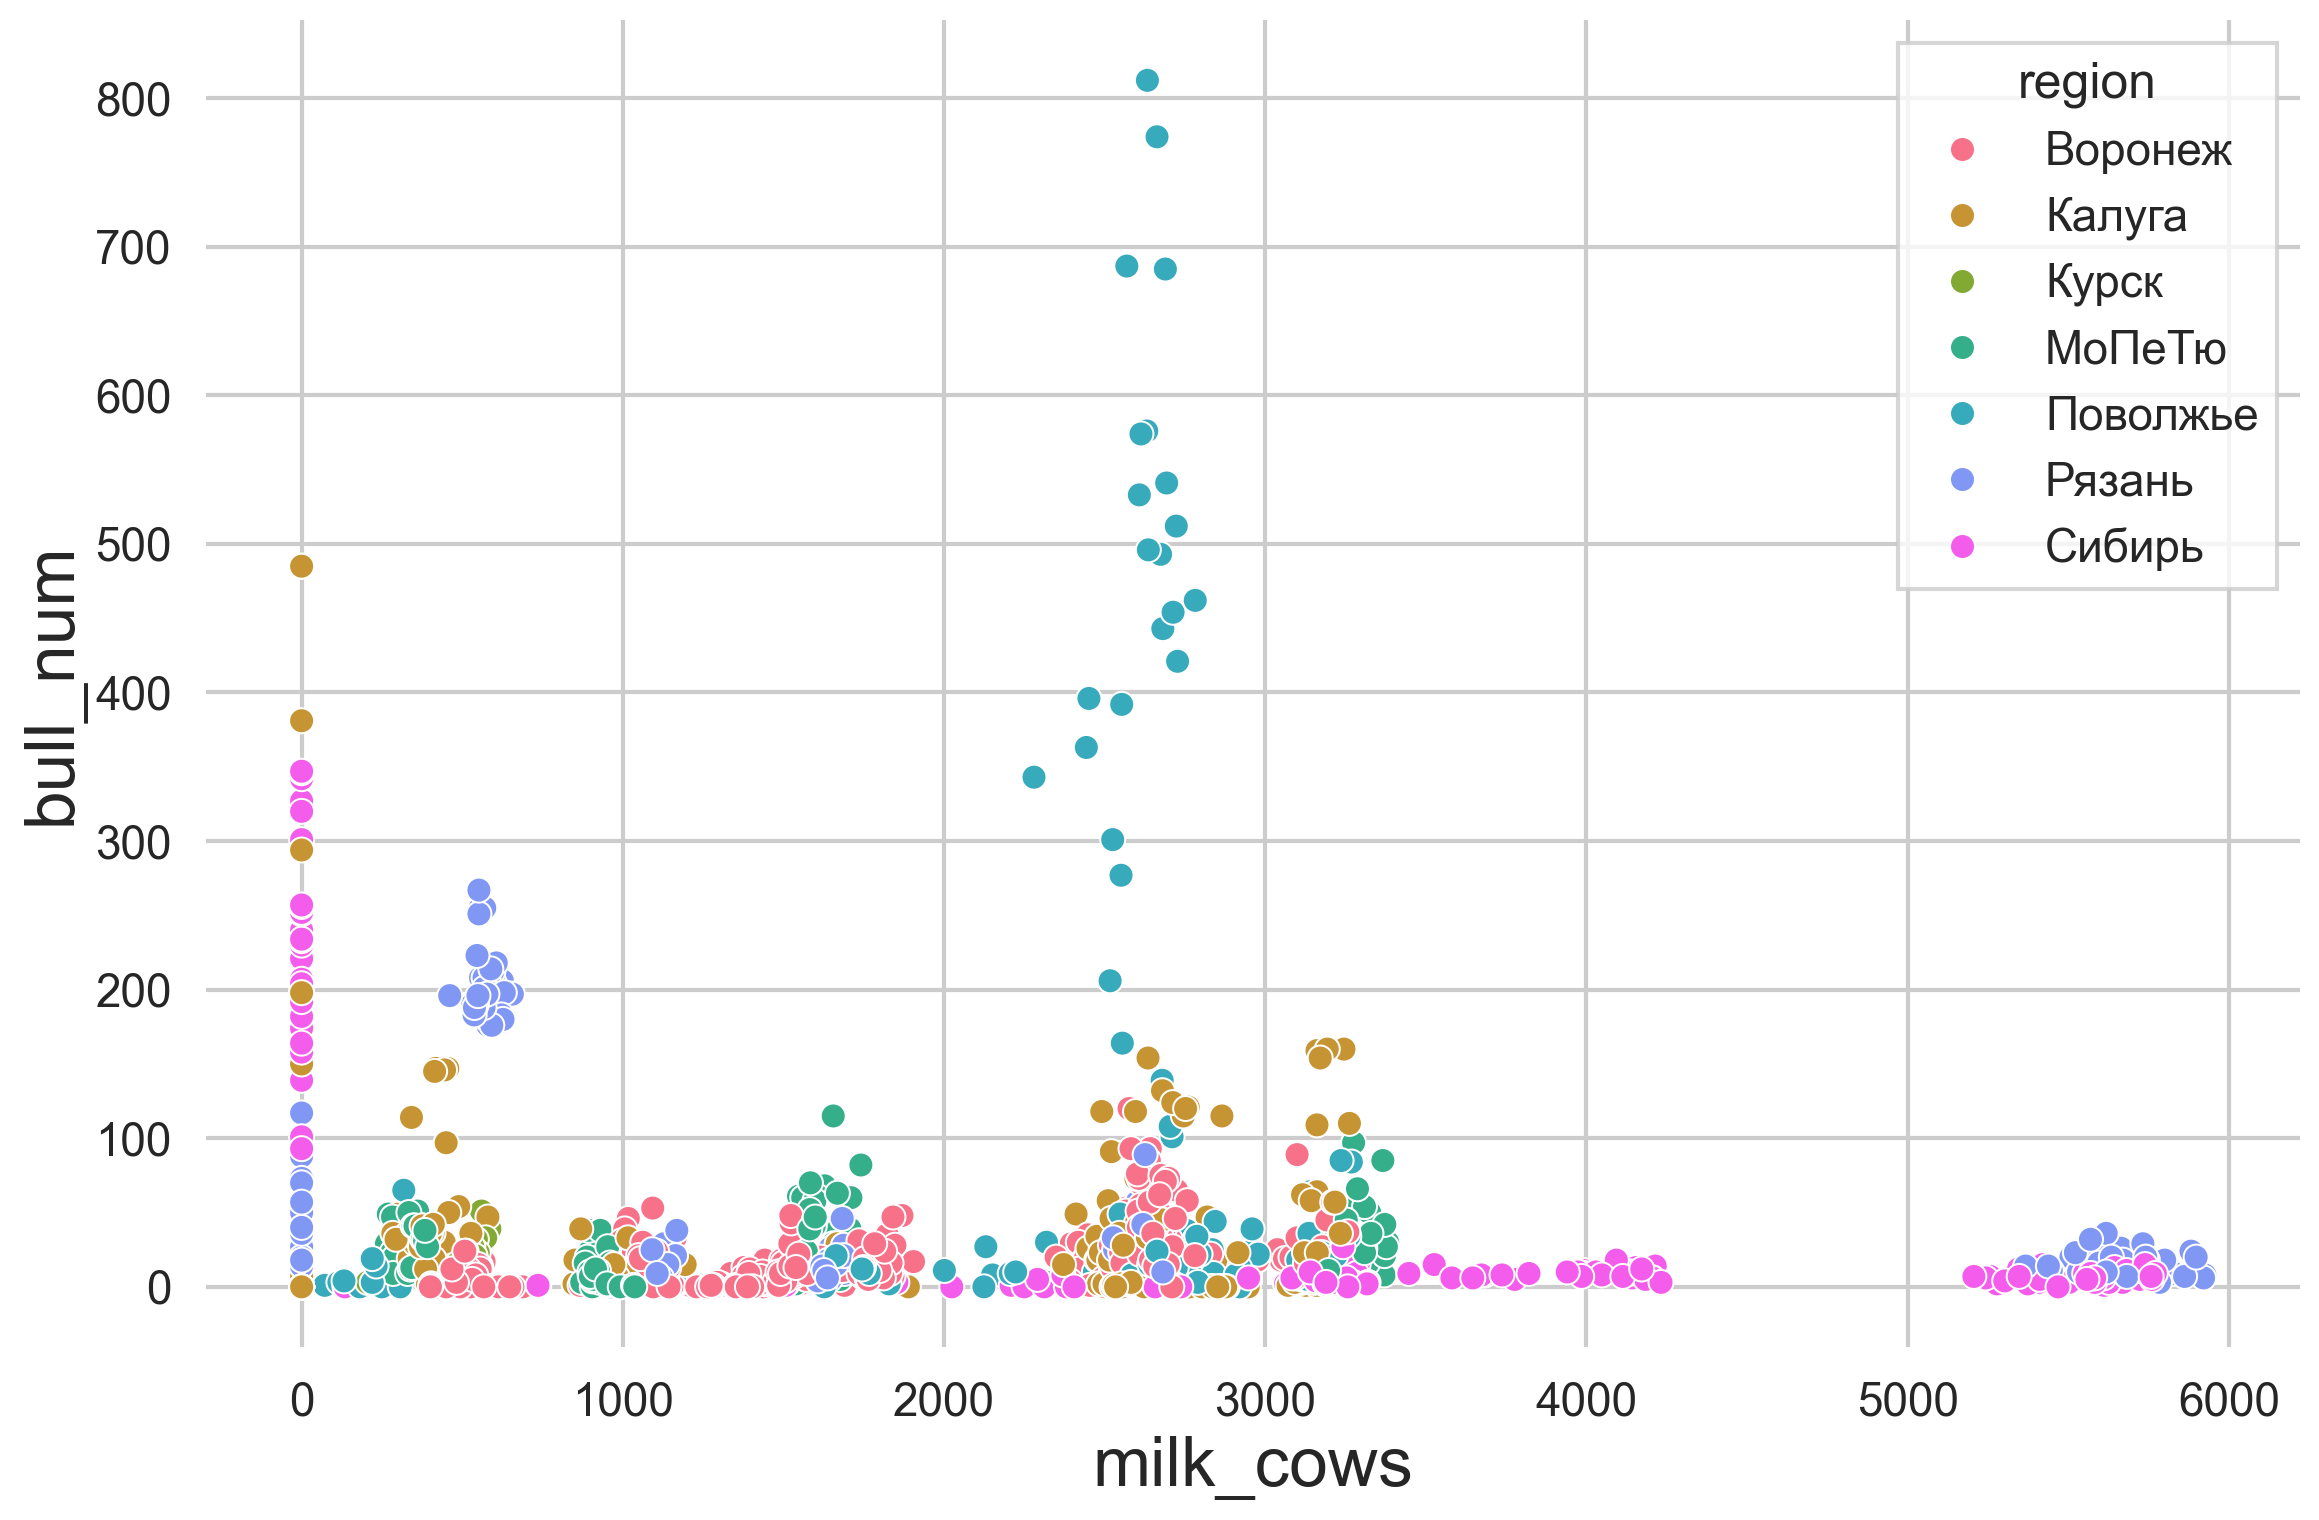

In [19]:
sns.scatterplot(data=production_indicators, x='milk_cows', y='bull_num', hue='region')

<Axes: xlabel='cow_retired_low_prod', ylabel='Count'>

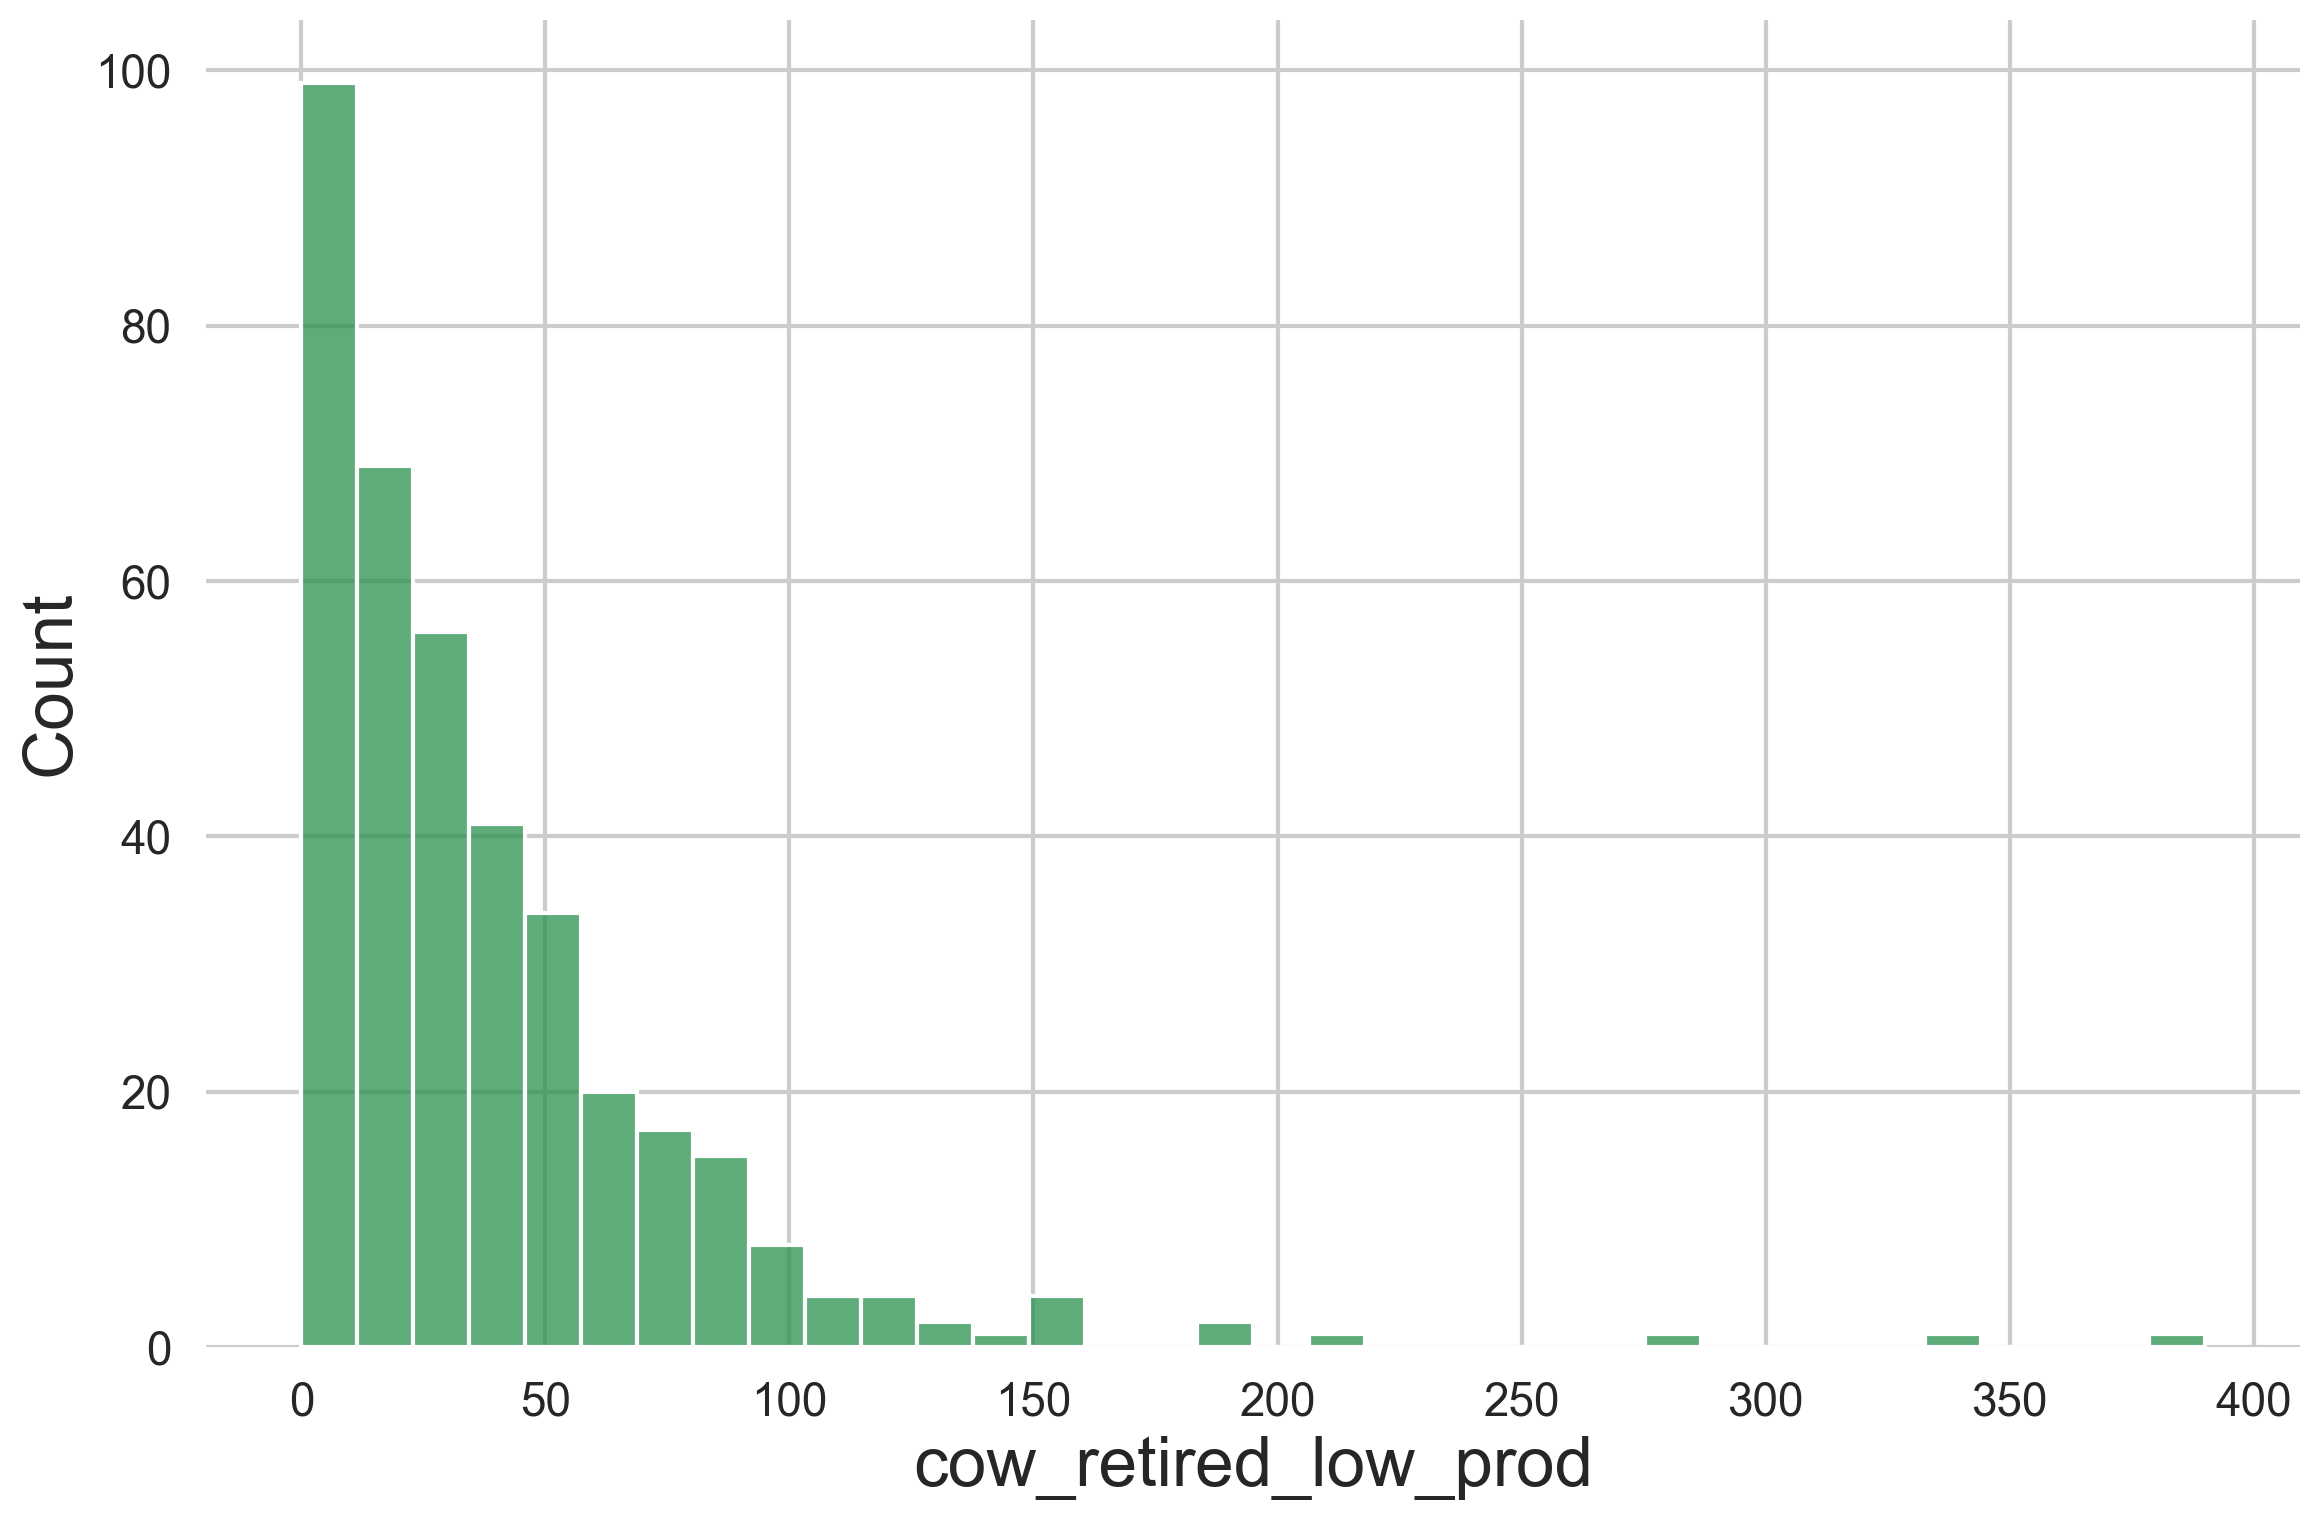

In [20]:
sns.histplot(production_indicators, x='cow_retired_low_prod')

<Axes: xlabel='milk_cows', ylabel='cow_retired_low_prod'>

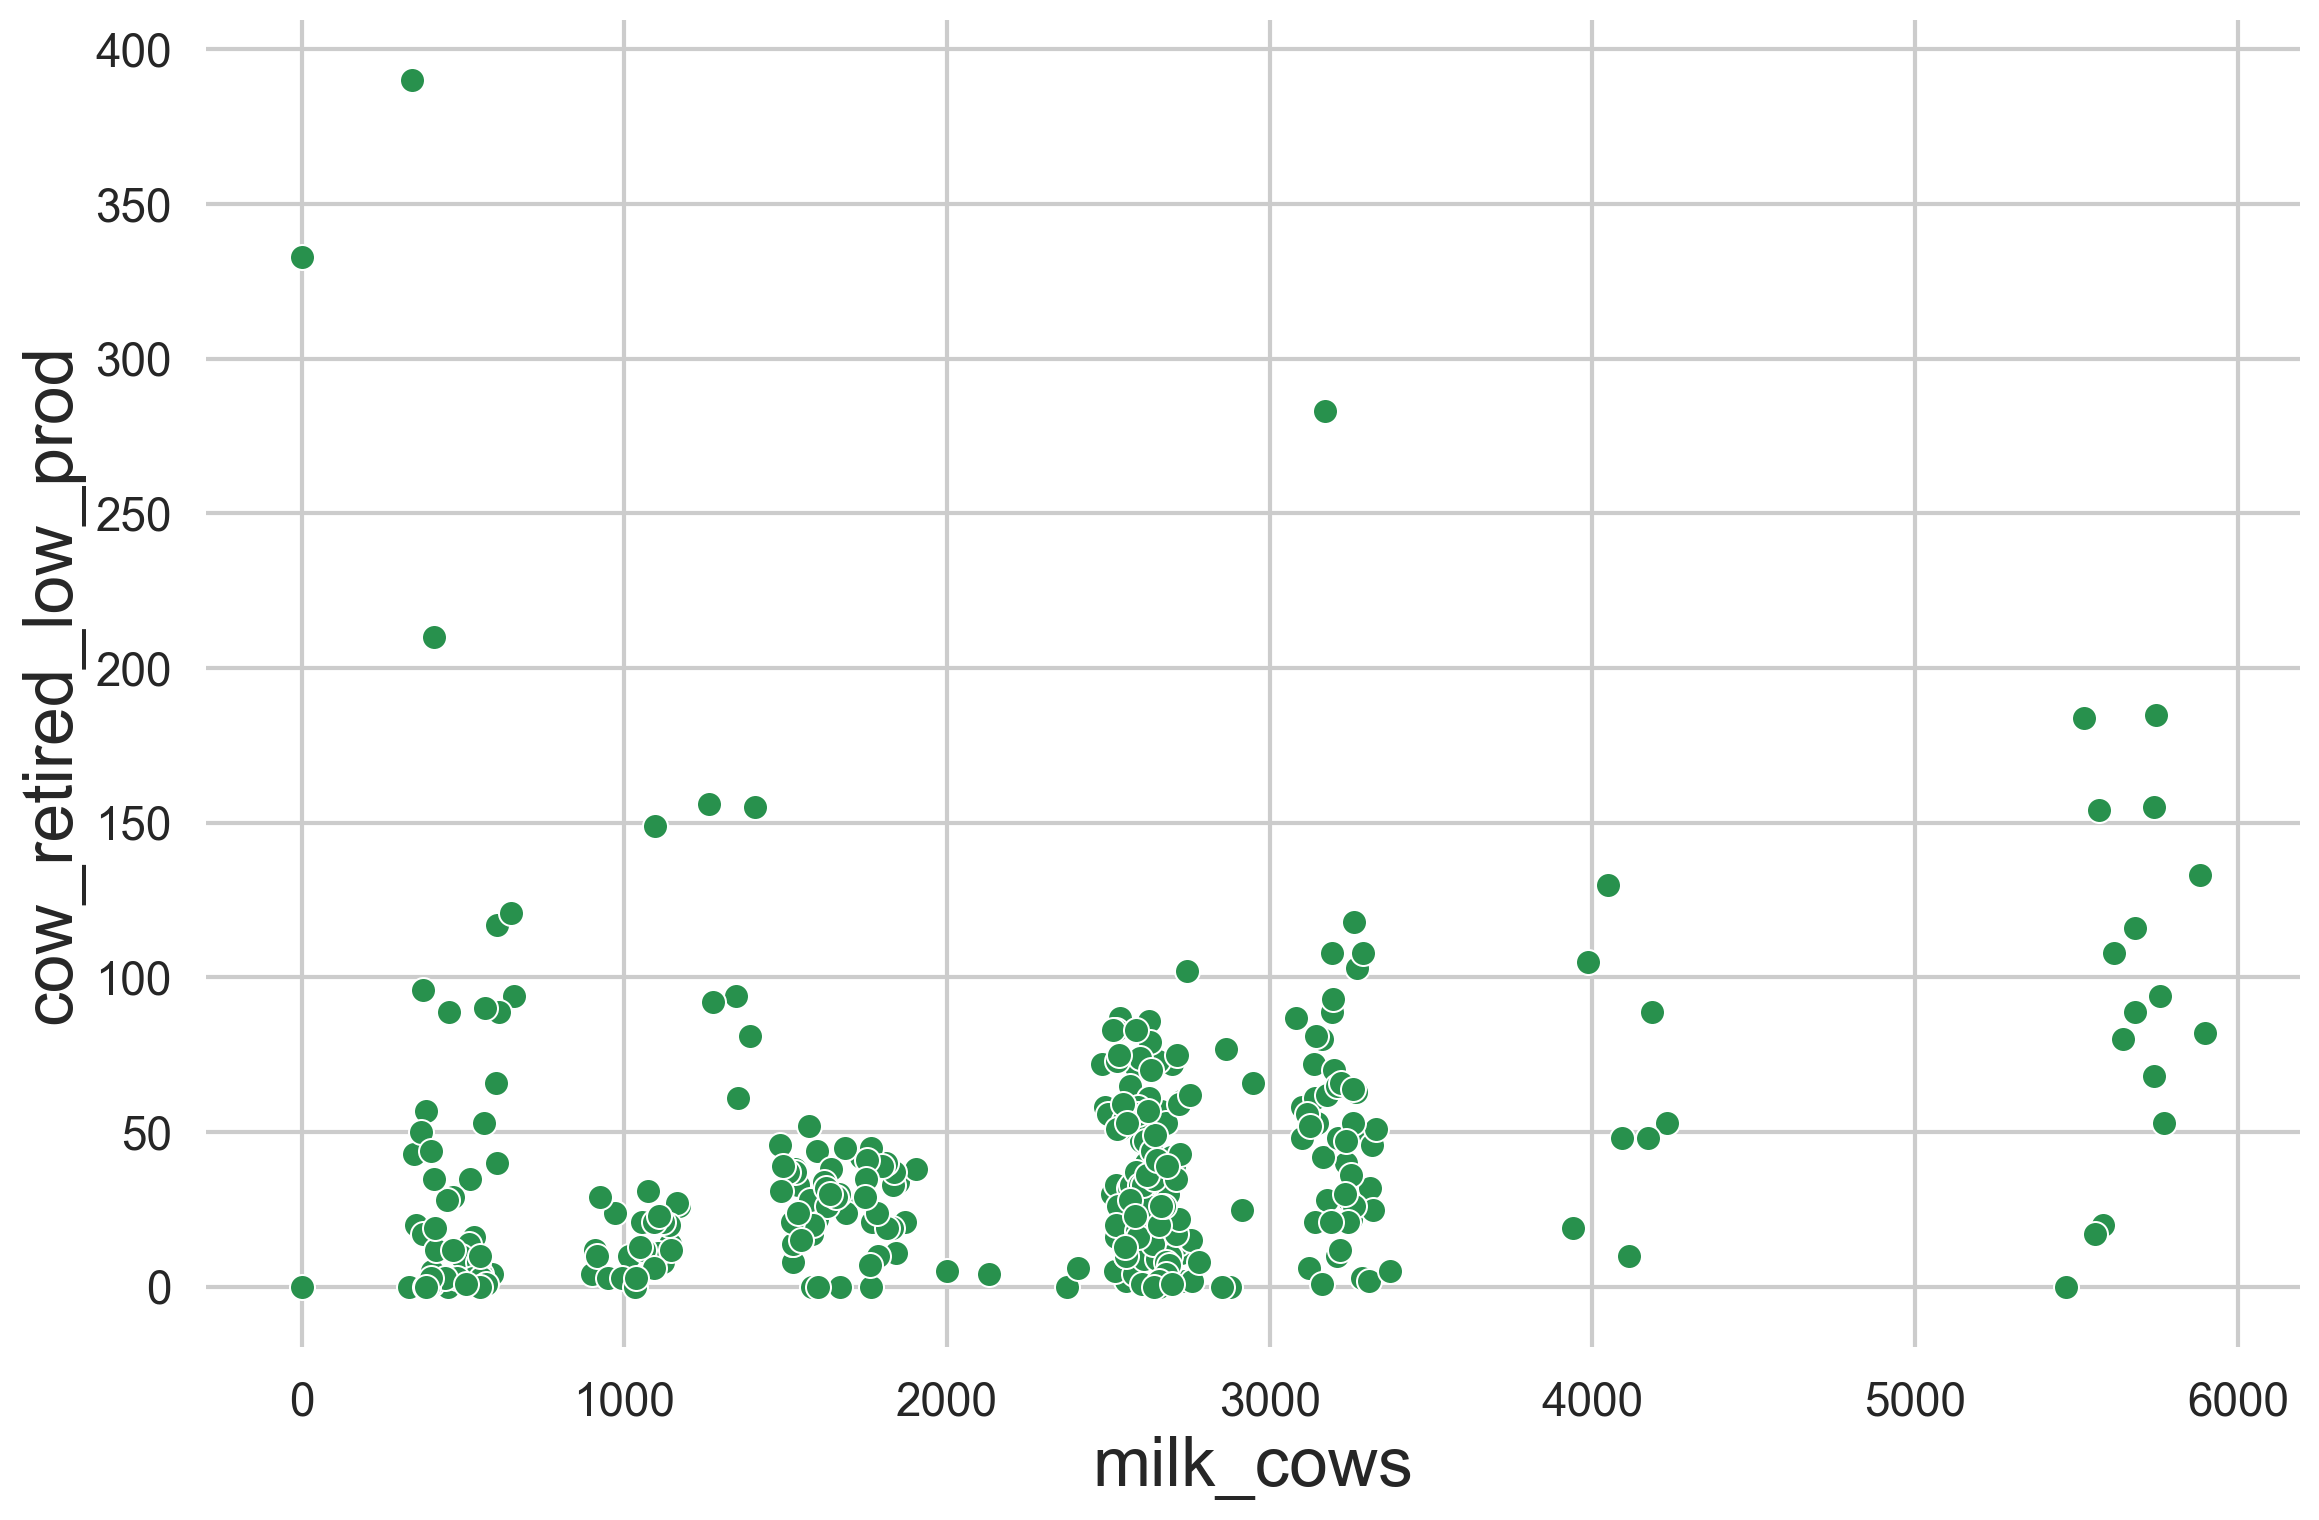

In [21]:
sns.scatterplot(data=production_indicators, x='milk_cows', y='cow_retired_low_prod')

<Axes: xlabel='bull_num', ylabel='cow_retired_low_prod'>

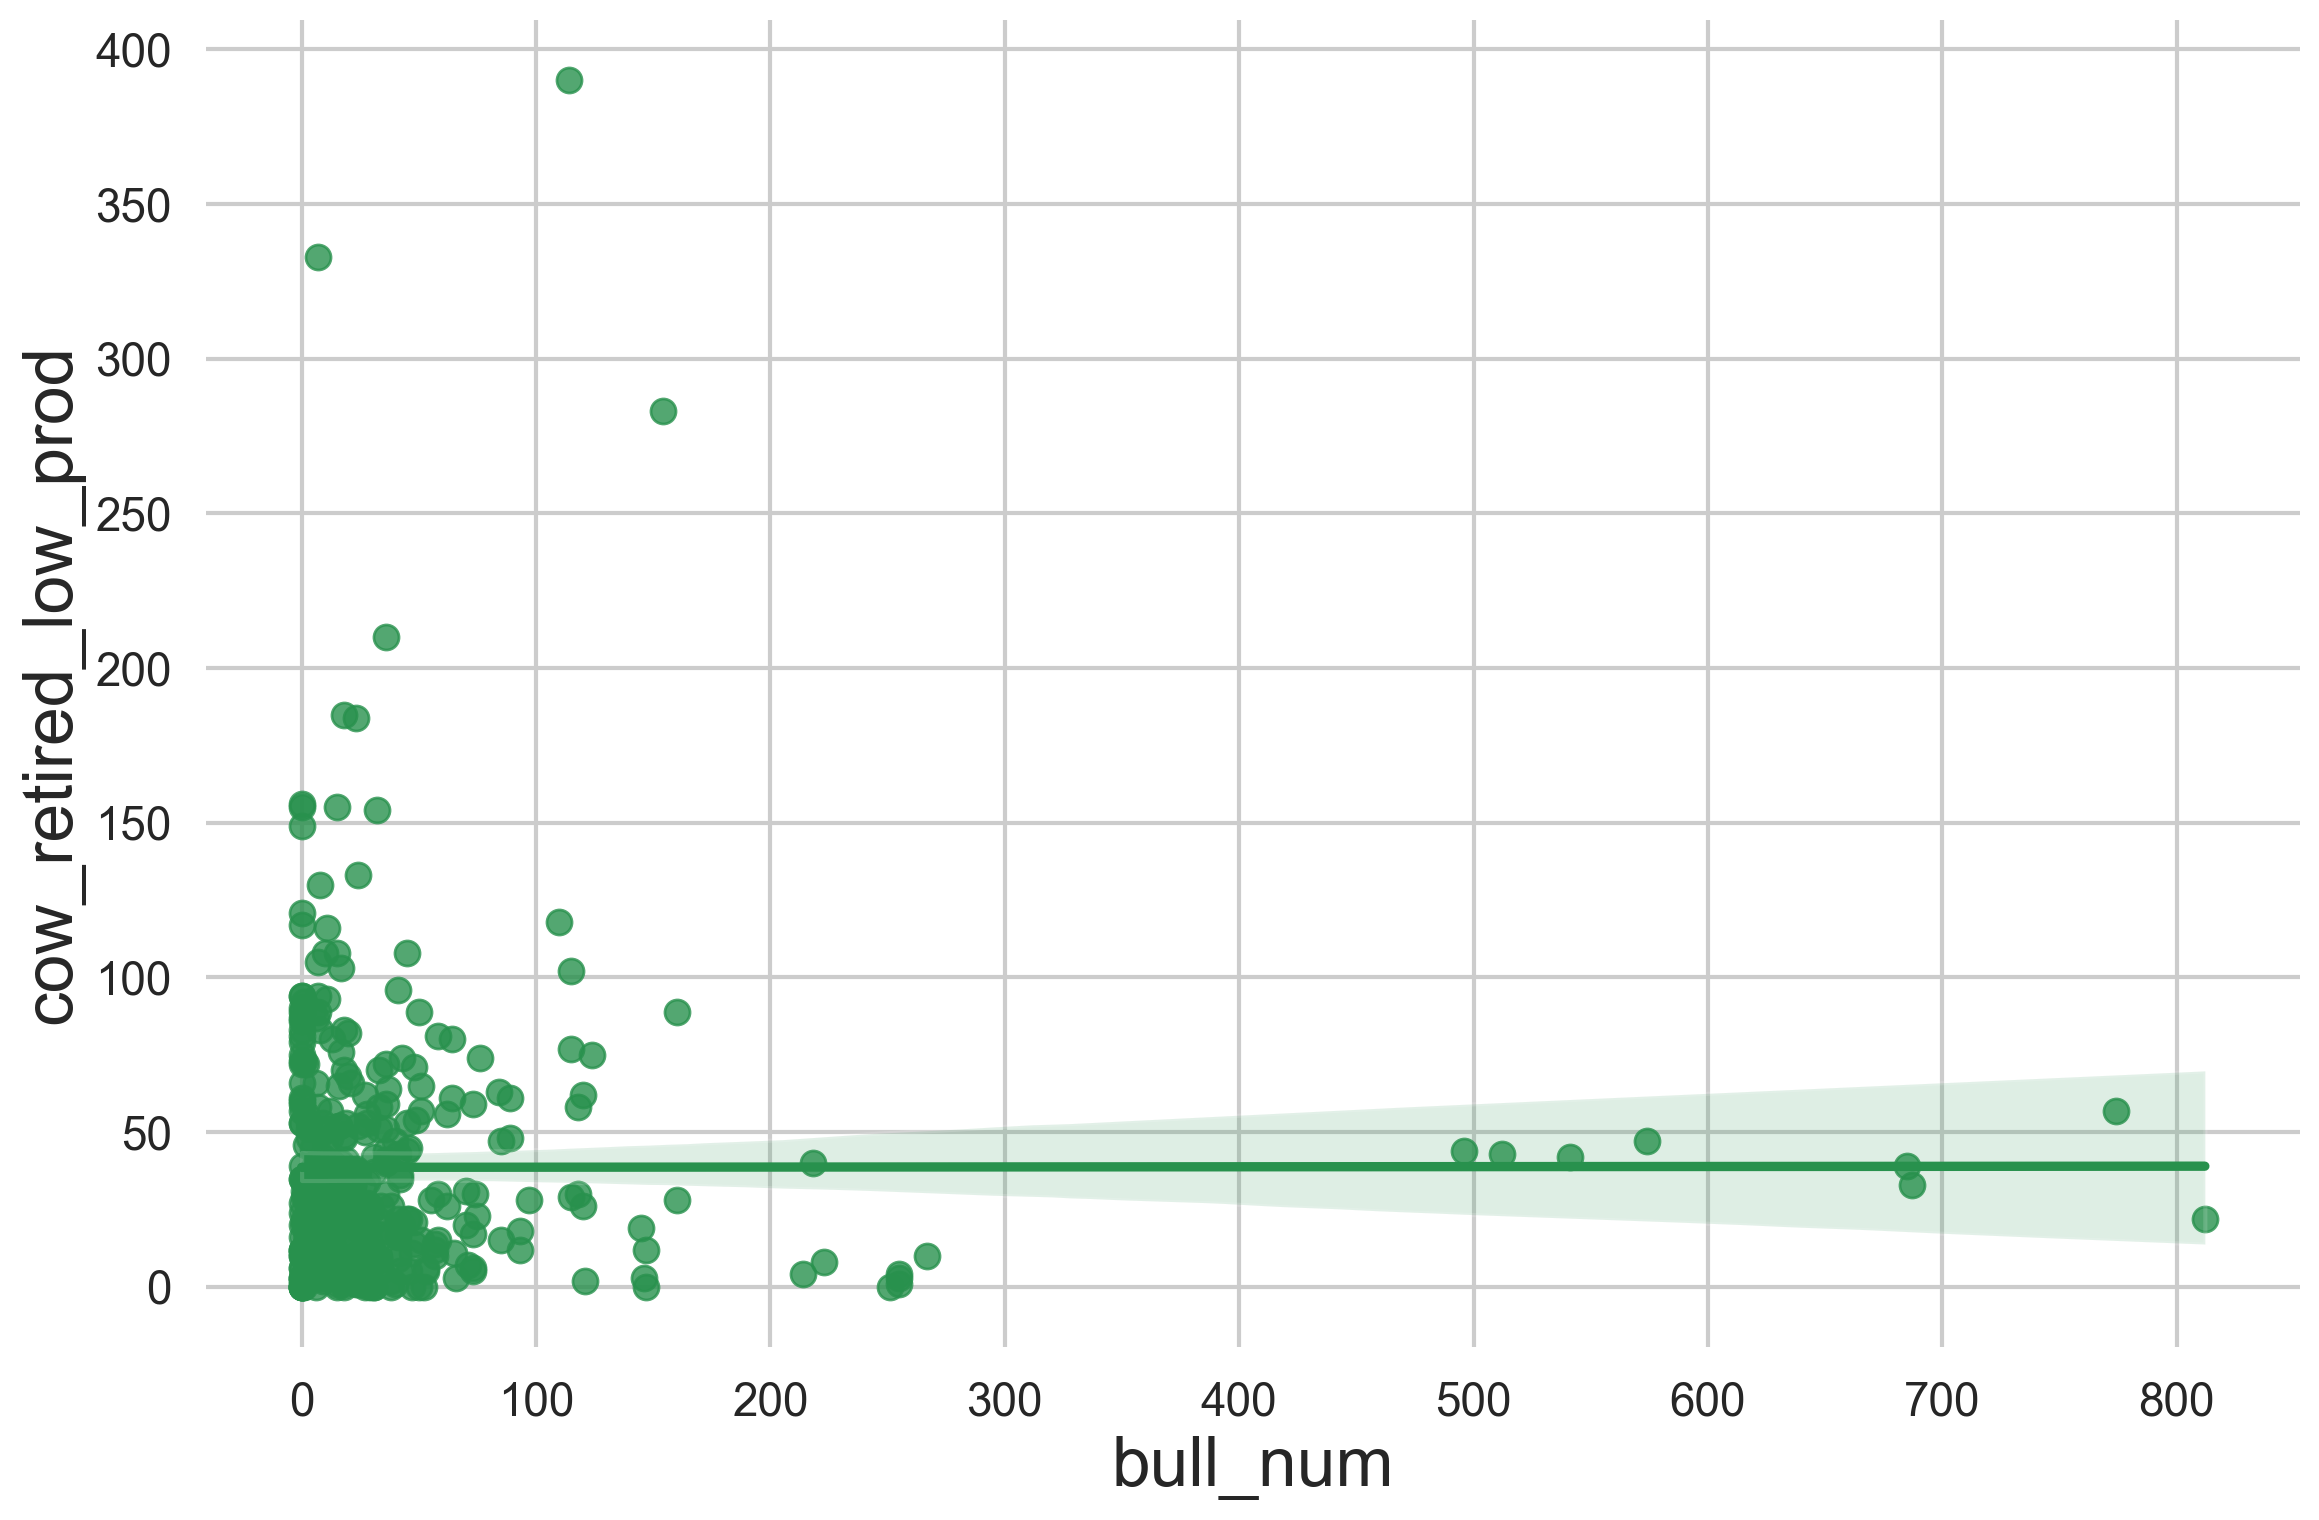

In [22]:
sns.regplot(data=production_indicators, x='bull_num', y='cow_retired_low_prod')

<Axes: xlabel='bull_num', ylabel='cow_retired'>

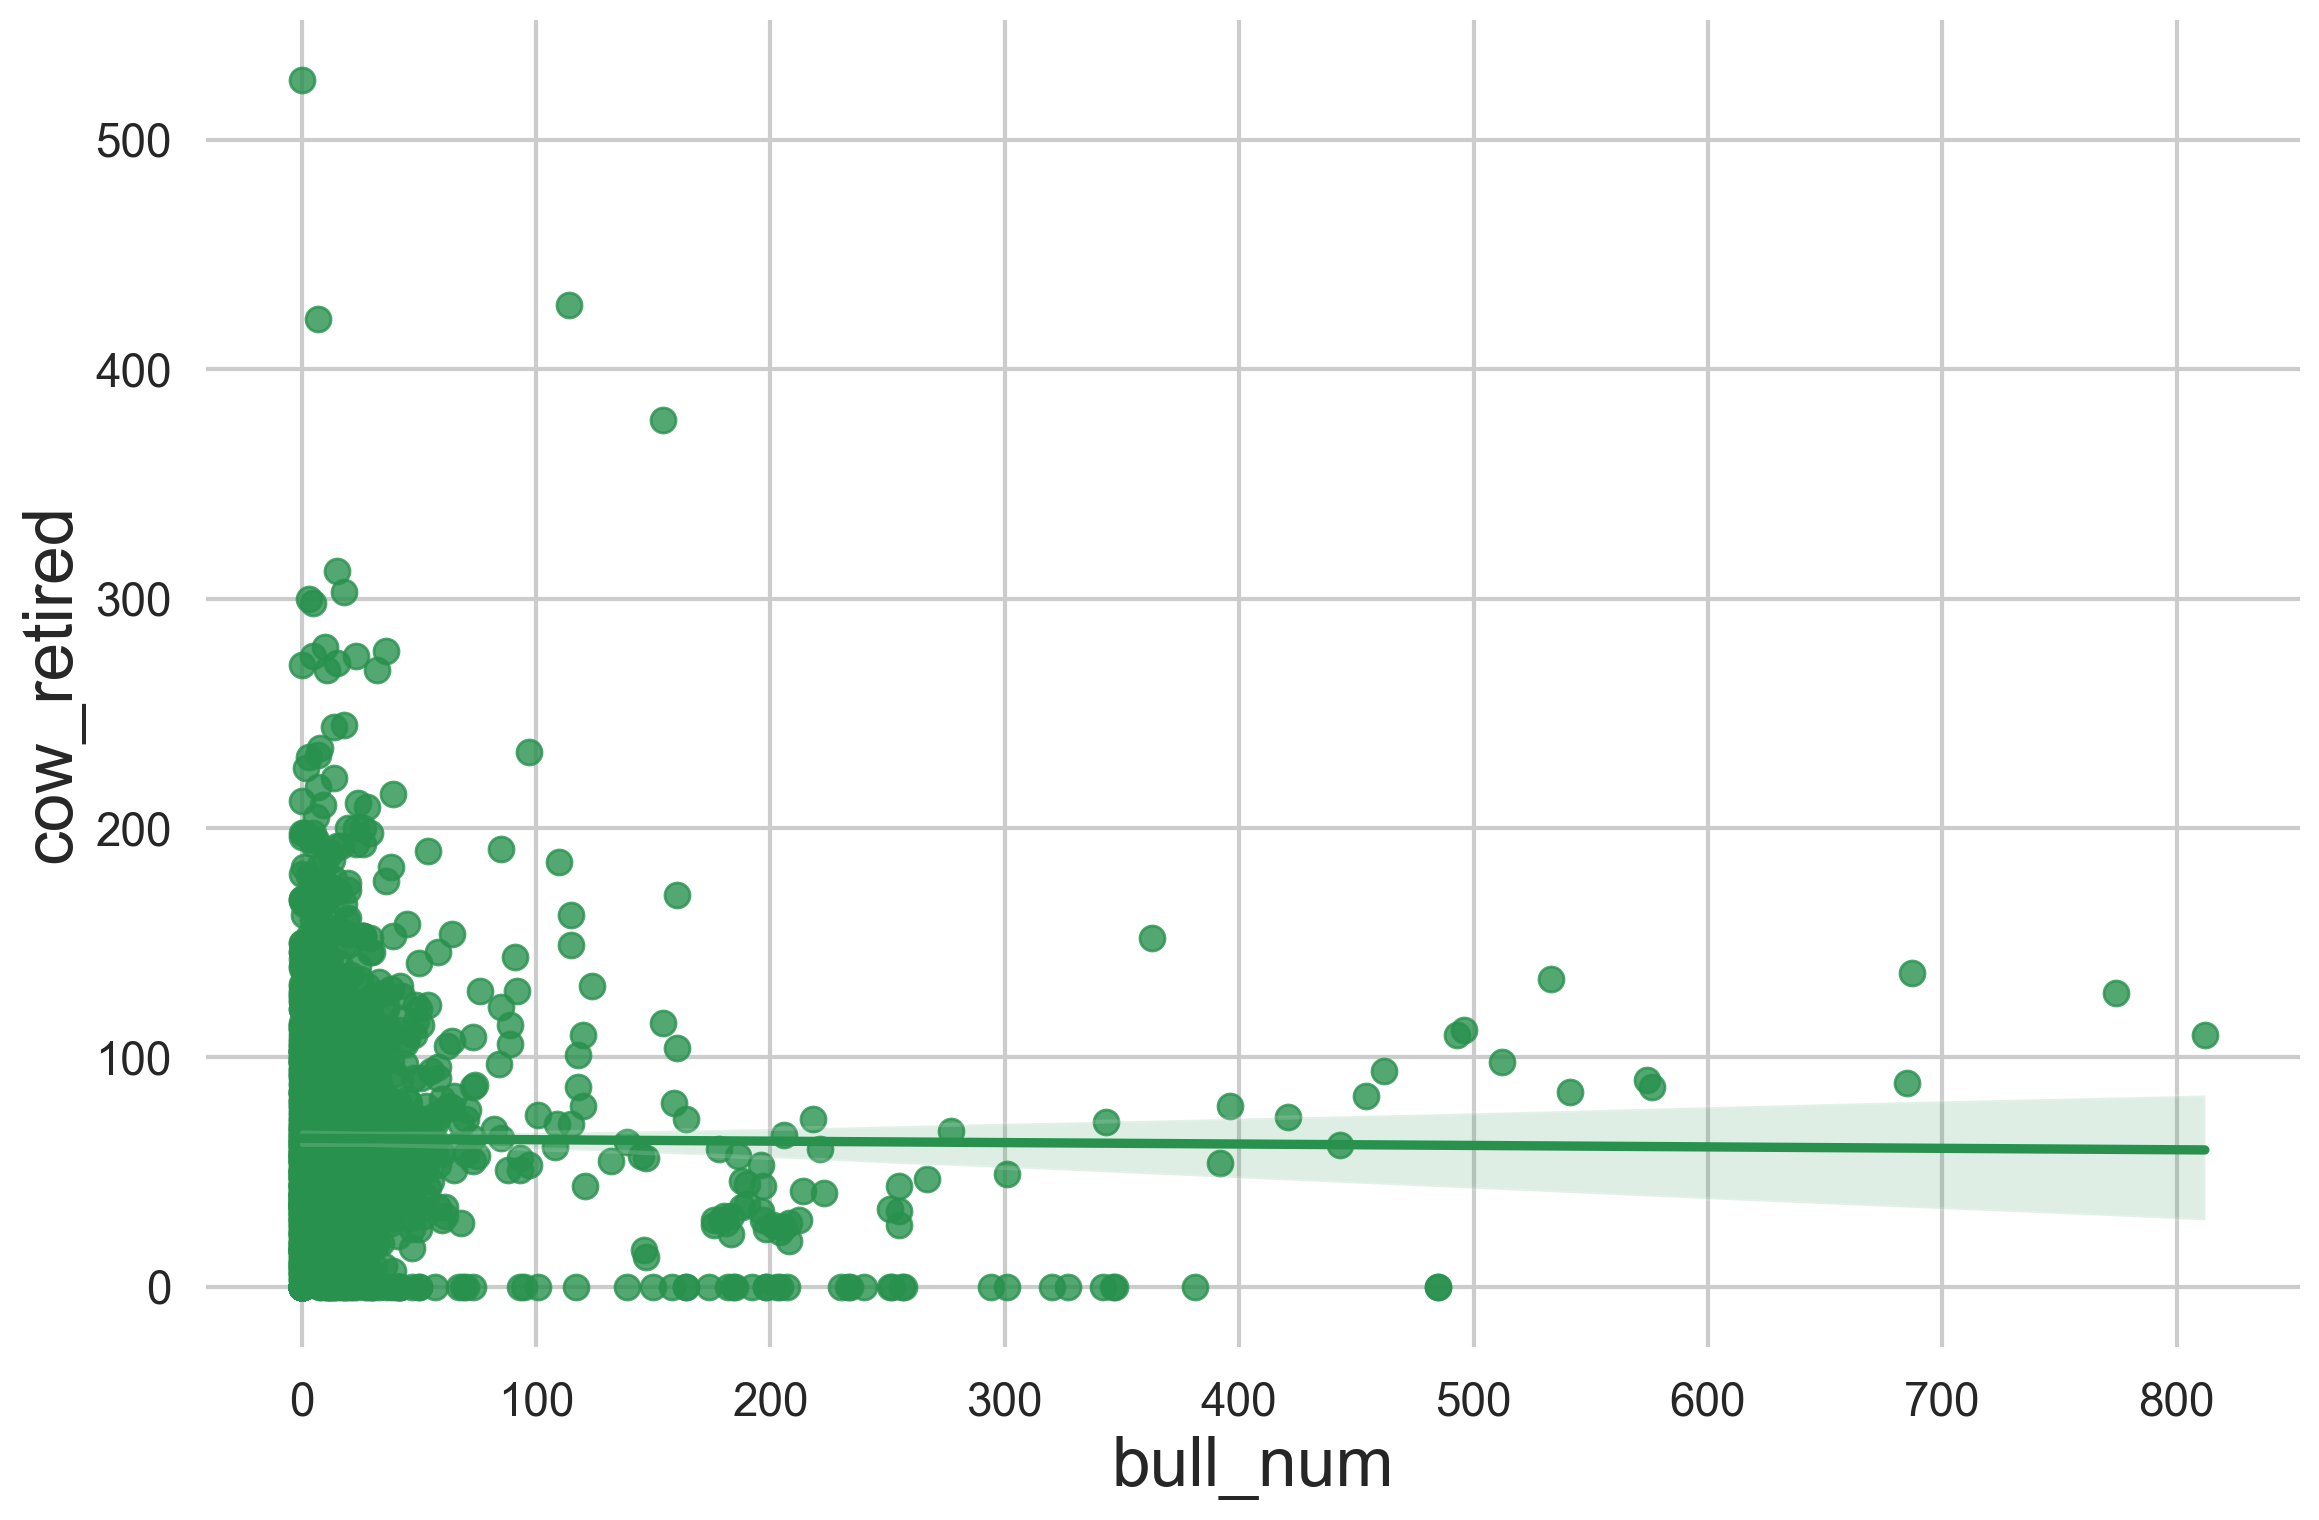

In [23]:
sns.regplot(data=production_indicators, x='bull_num', y='cow_retired')

<Axes: xlabel='weekly_milking_per_cow', ylabel='bull_num'>

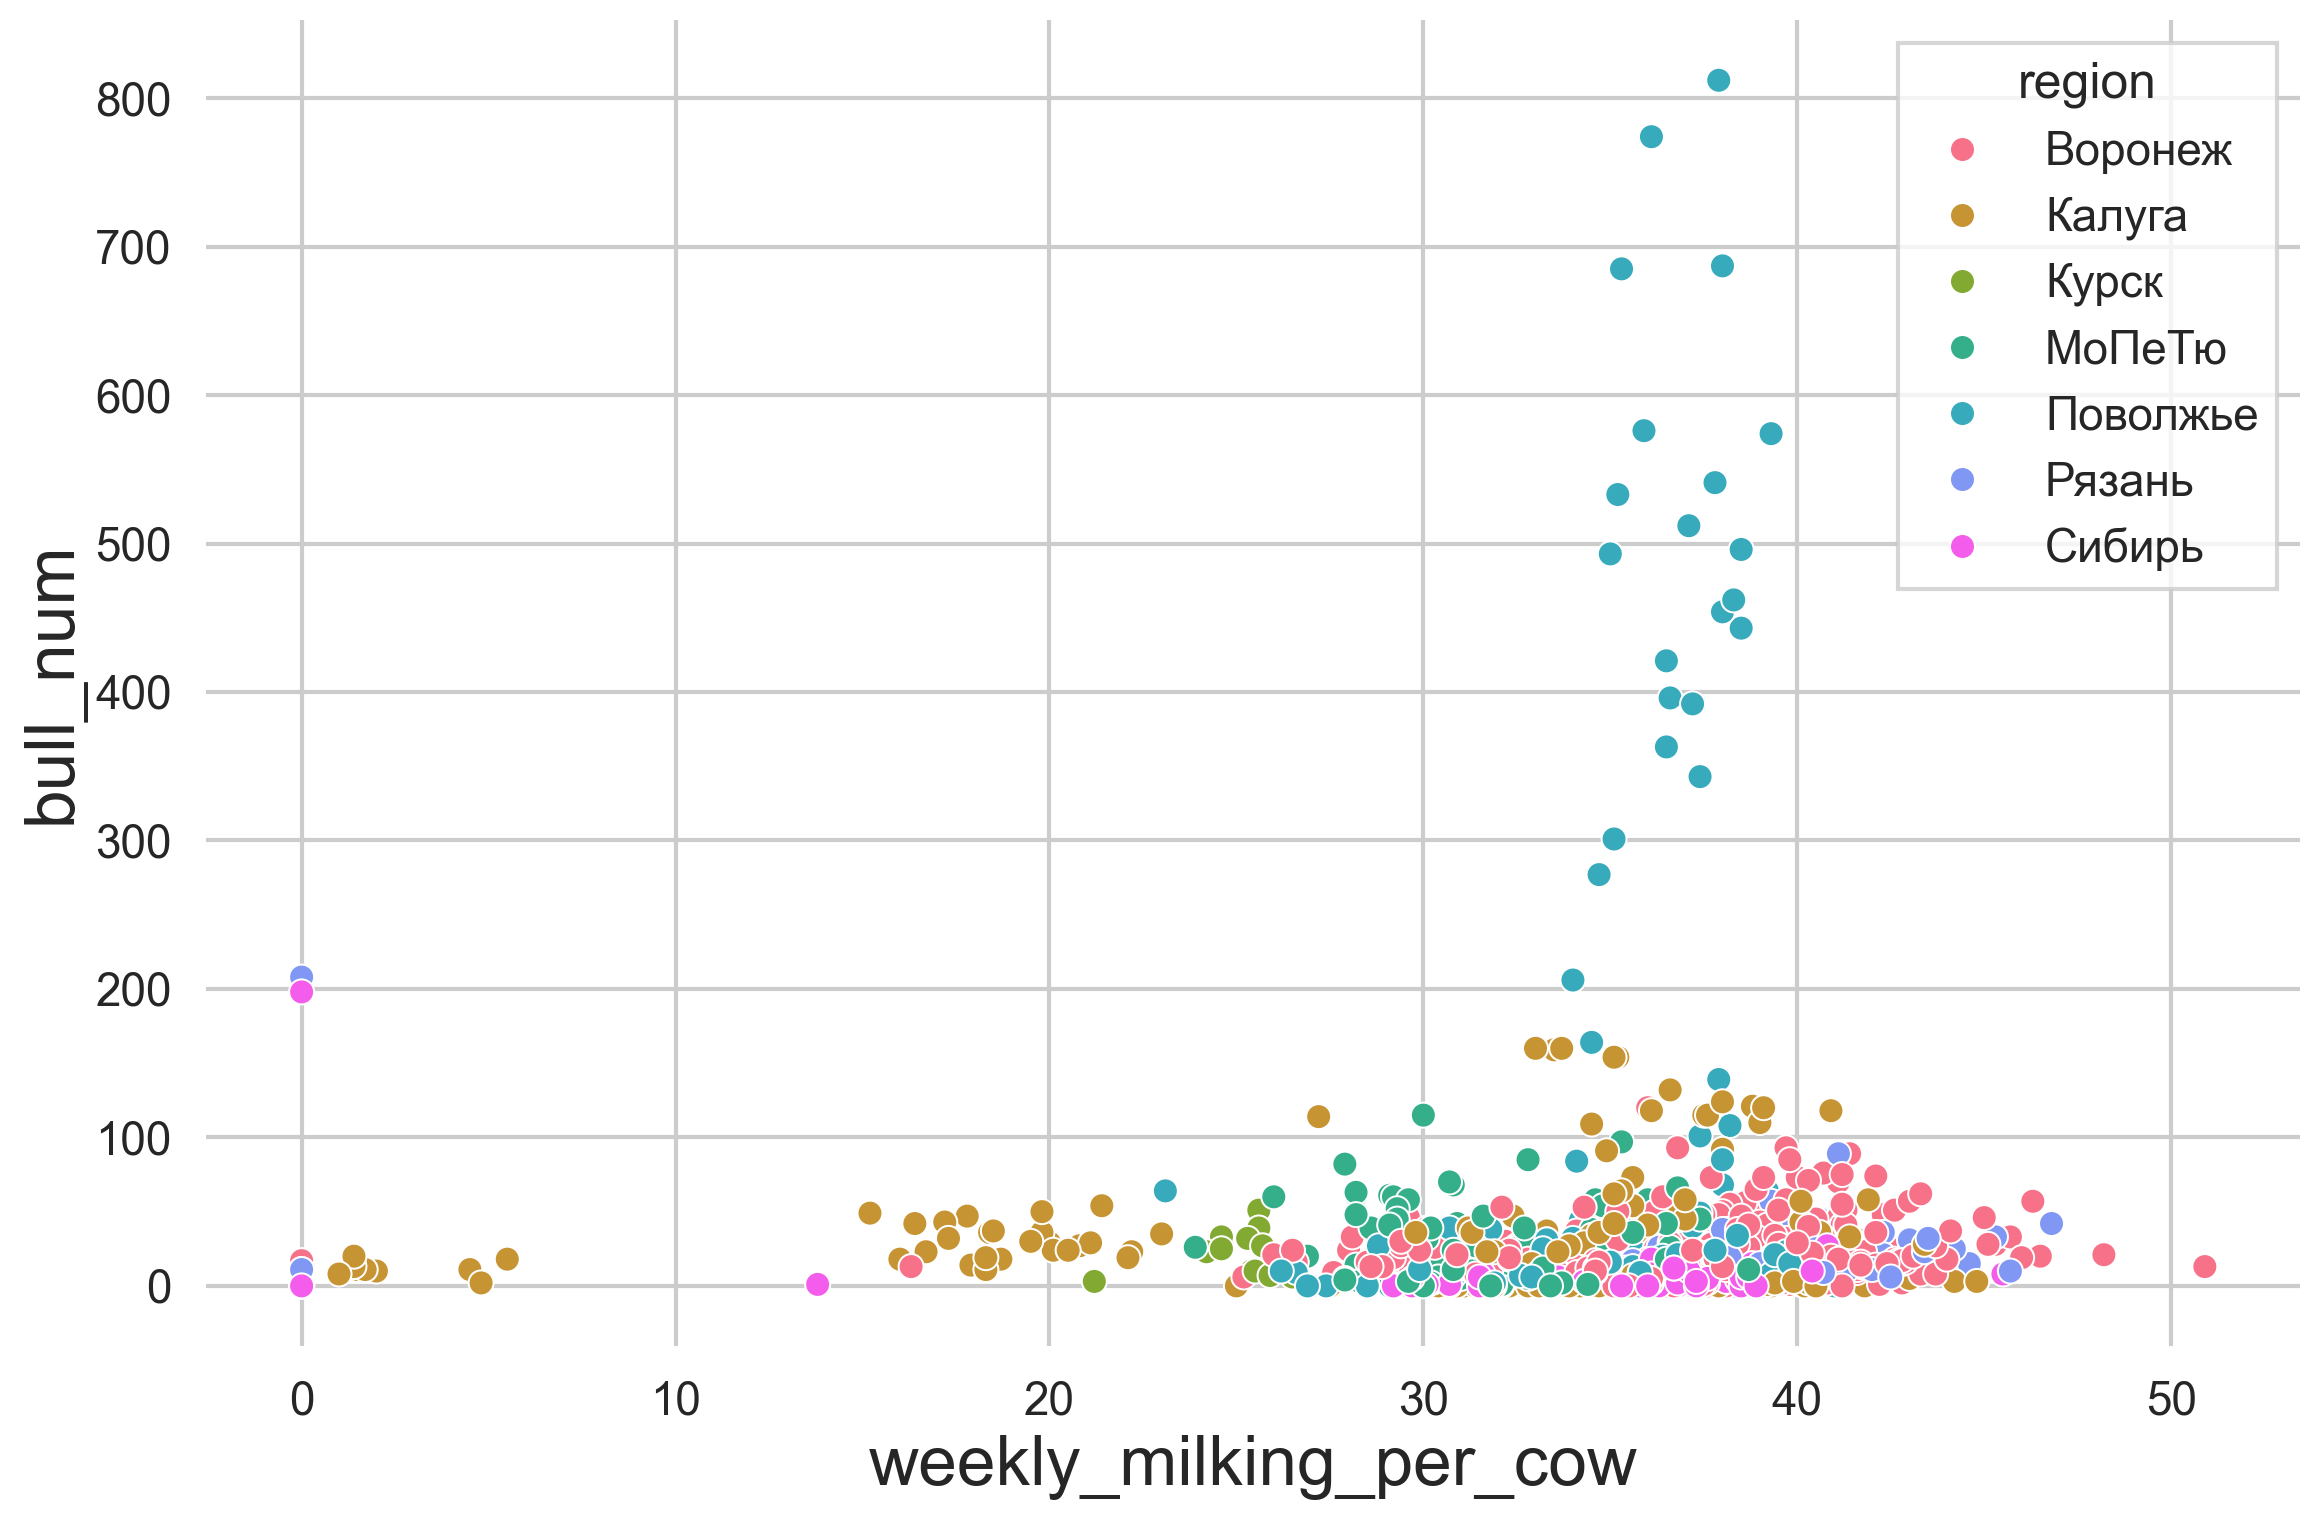

In [24]:
sns.scatterplot(data=production_indicators, x='weekly_milking_per_cow', y='bull_num', hue='region')

<Axes: xlabel='milk_cows', ylabel='bull_num'>

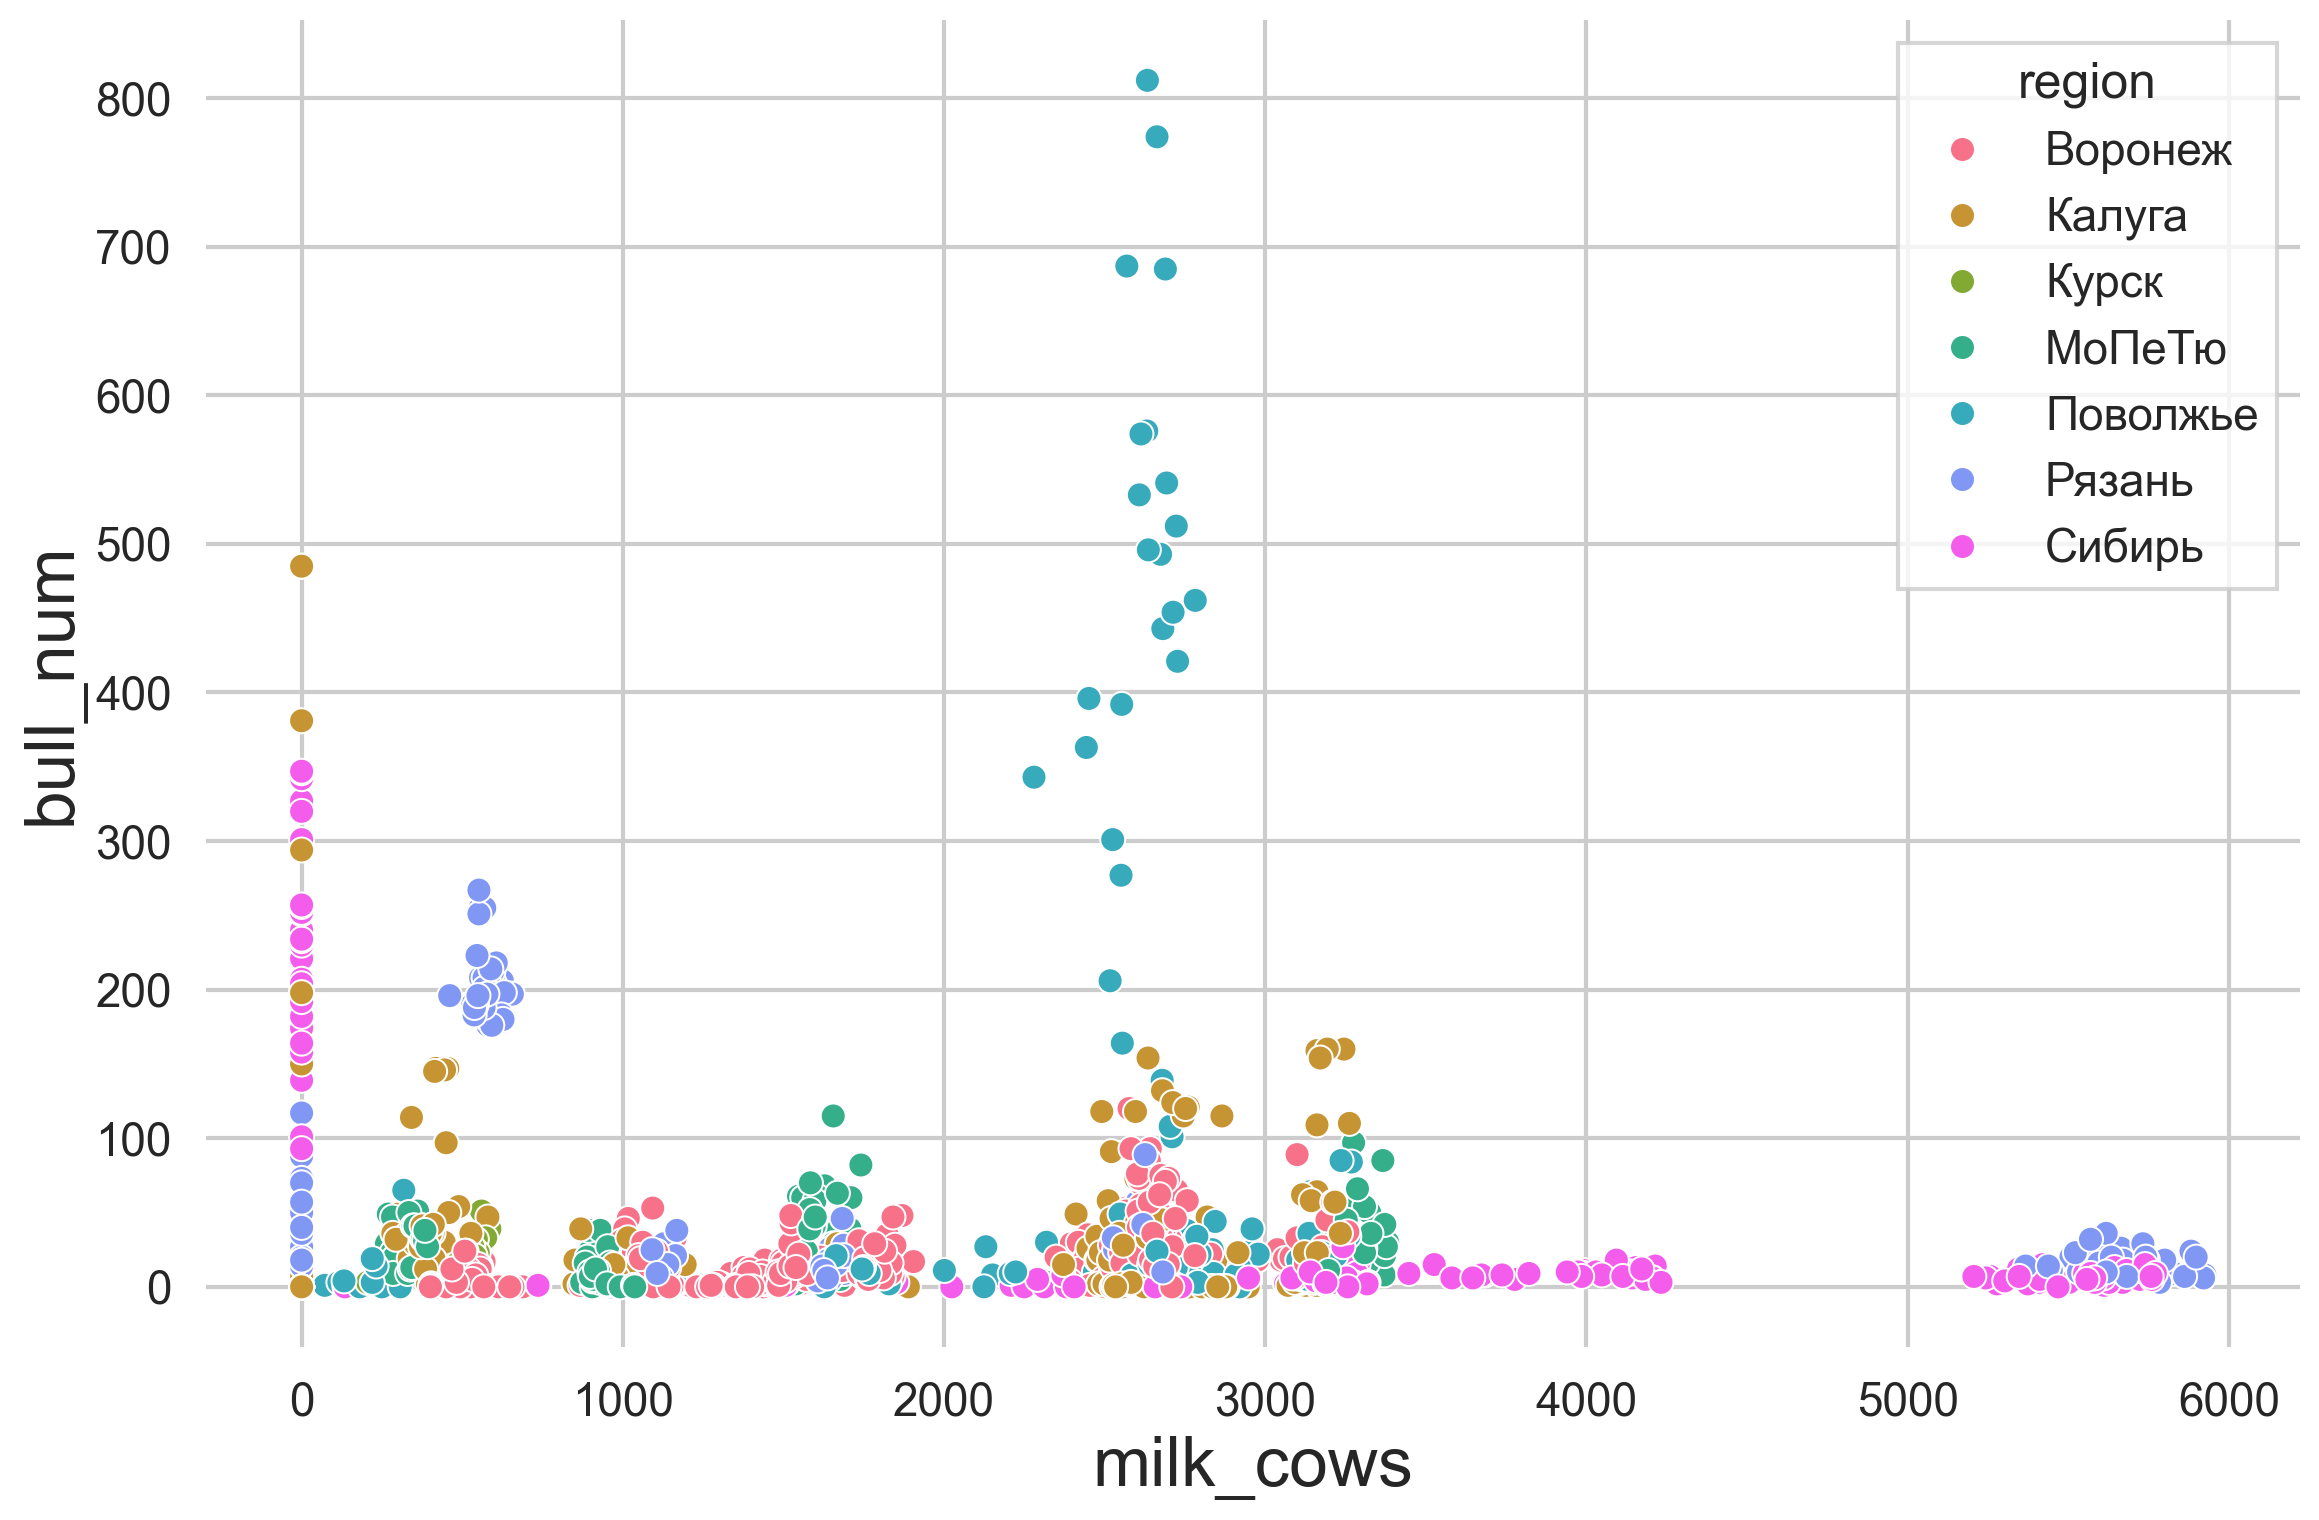

In [25]:
sns.scatterplot(data=production_indicators, x='milk_cows', y='bull_num', hue='region')

<Axes: xlabel='weekly_milking_per_cow', ylabel='gross_milk_yield'>

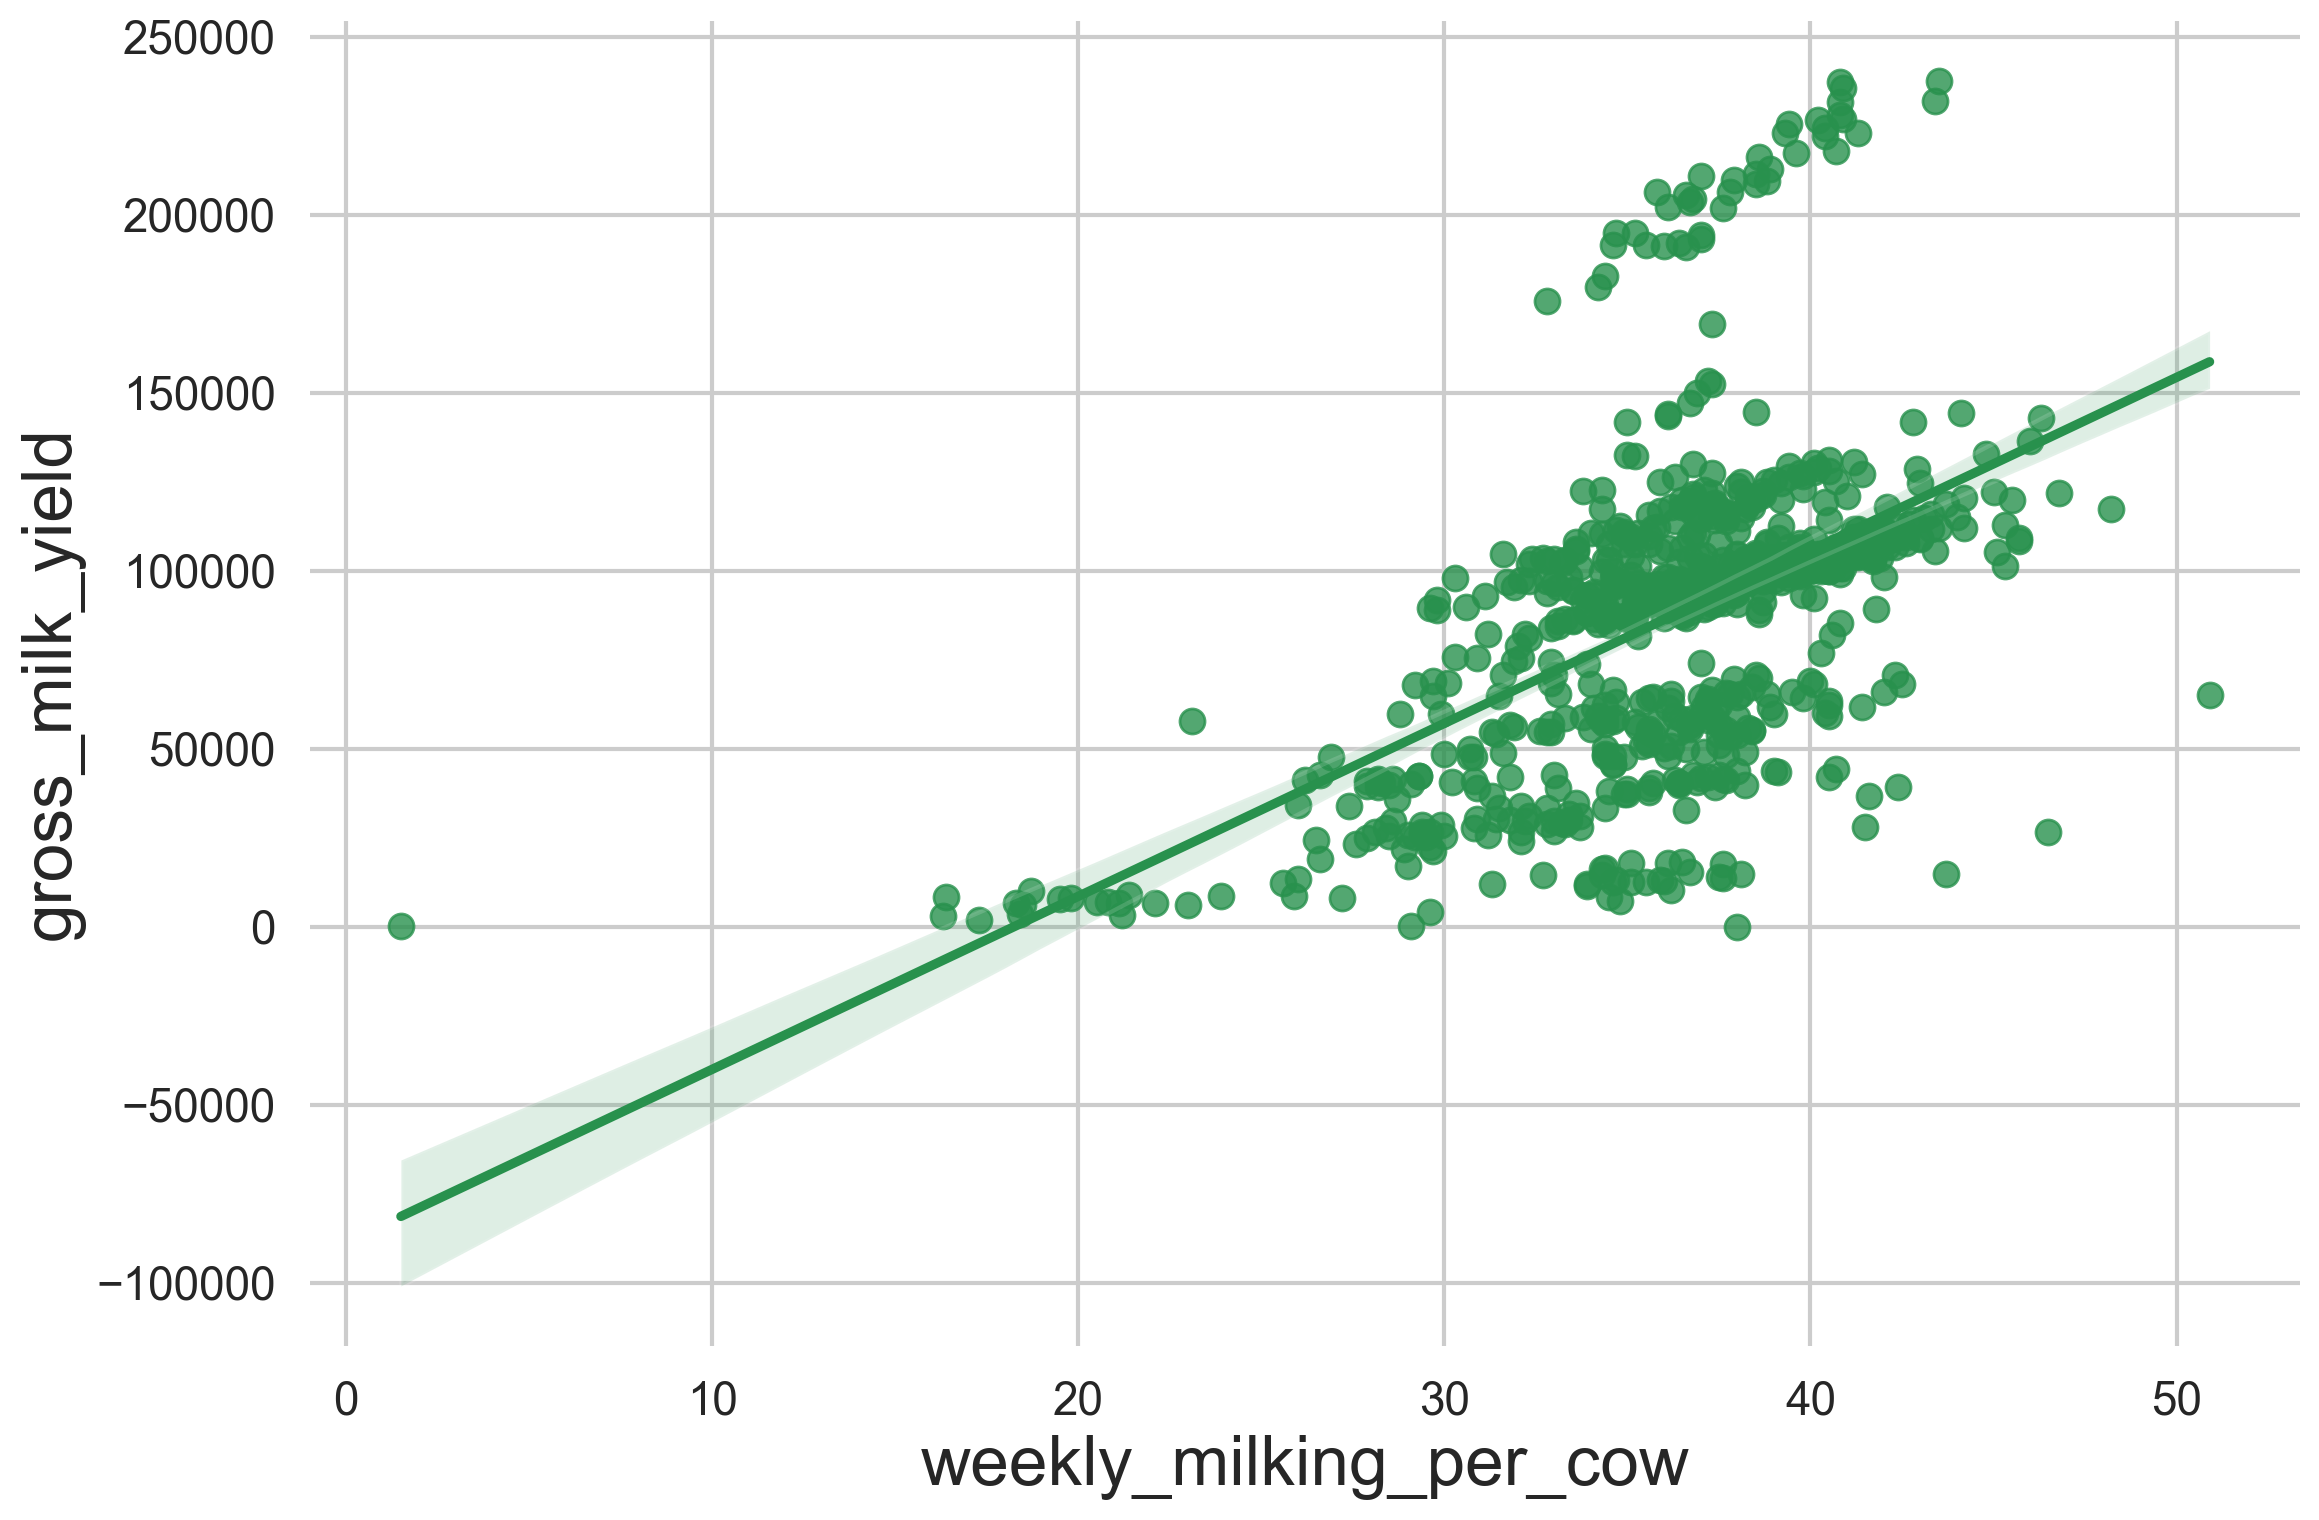

In [26]:
sns.regplot(data=production_indicators, x='weekly_milking_per_cow', y='gross_milk_yield')

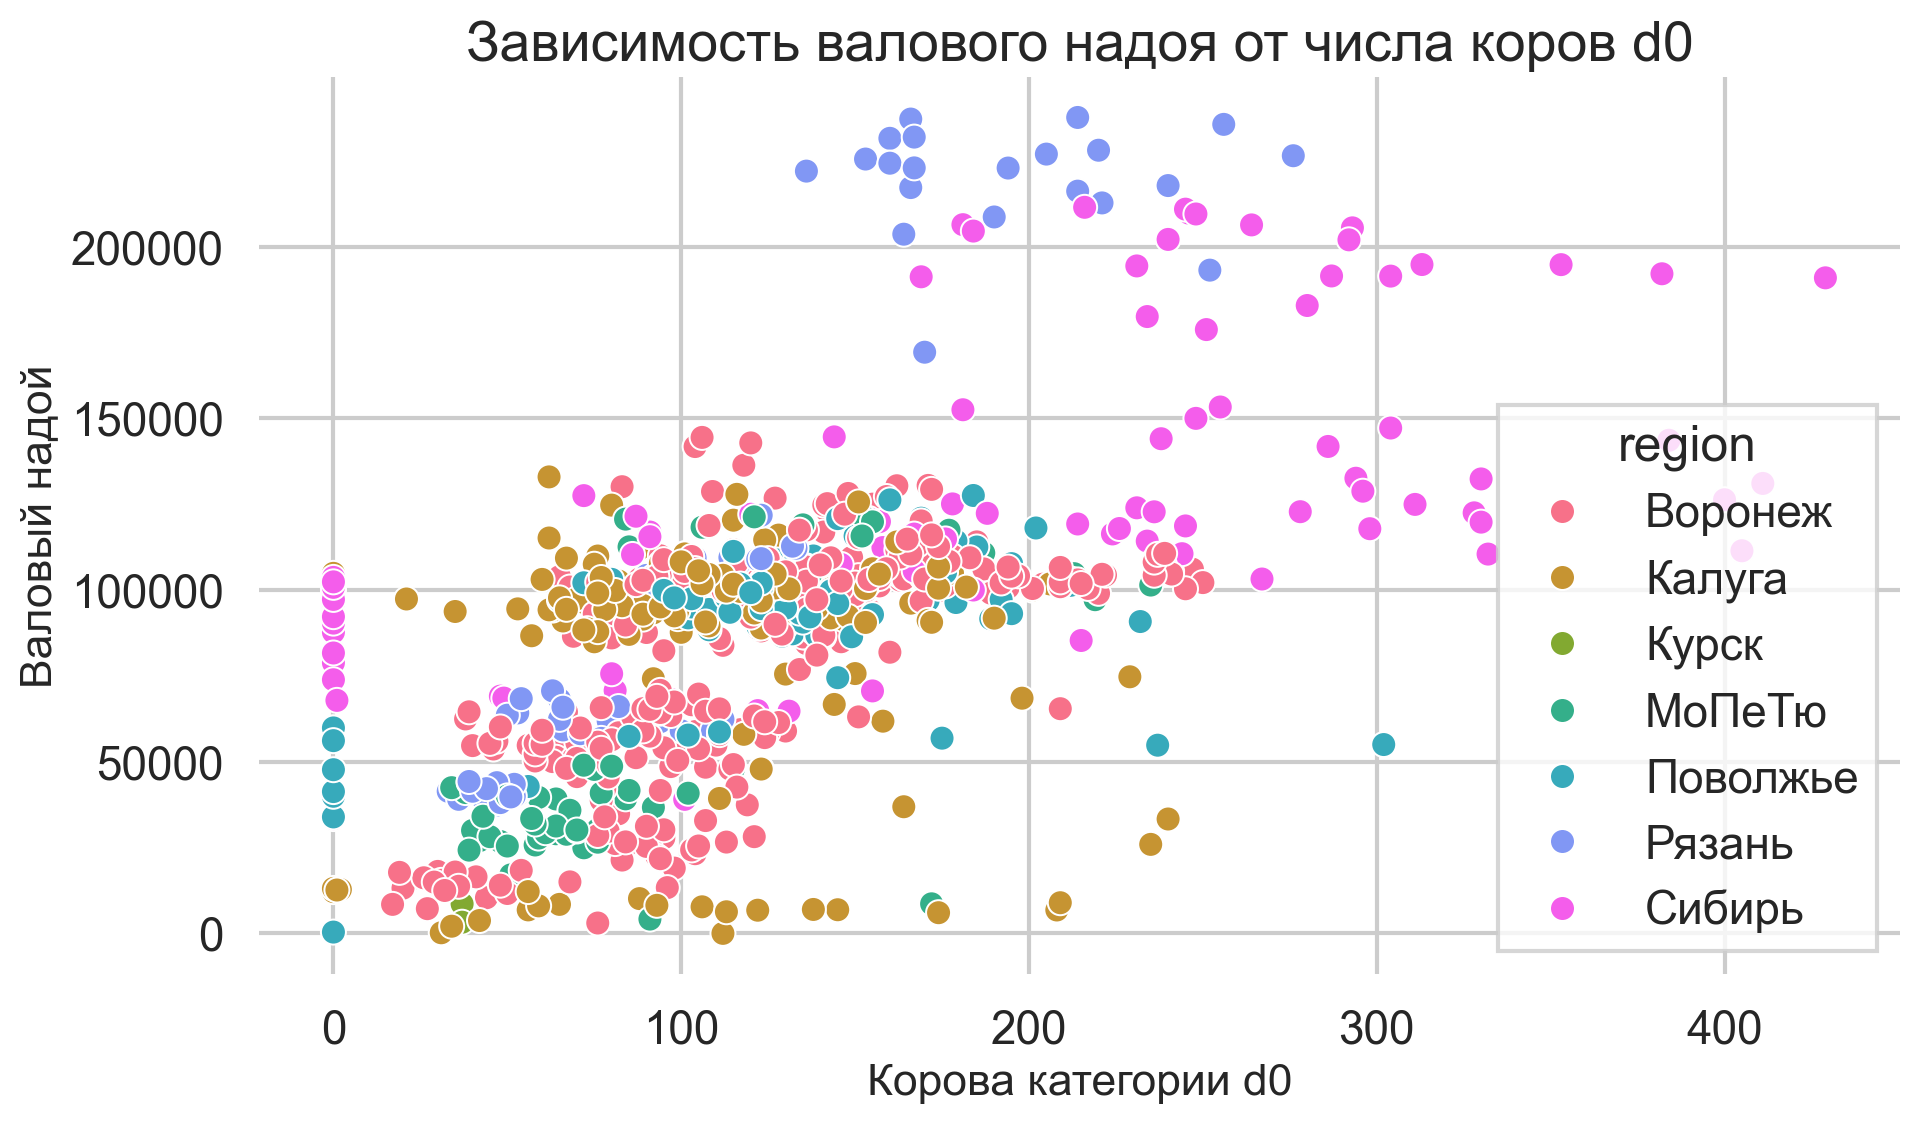

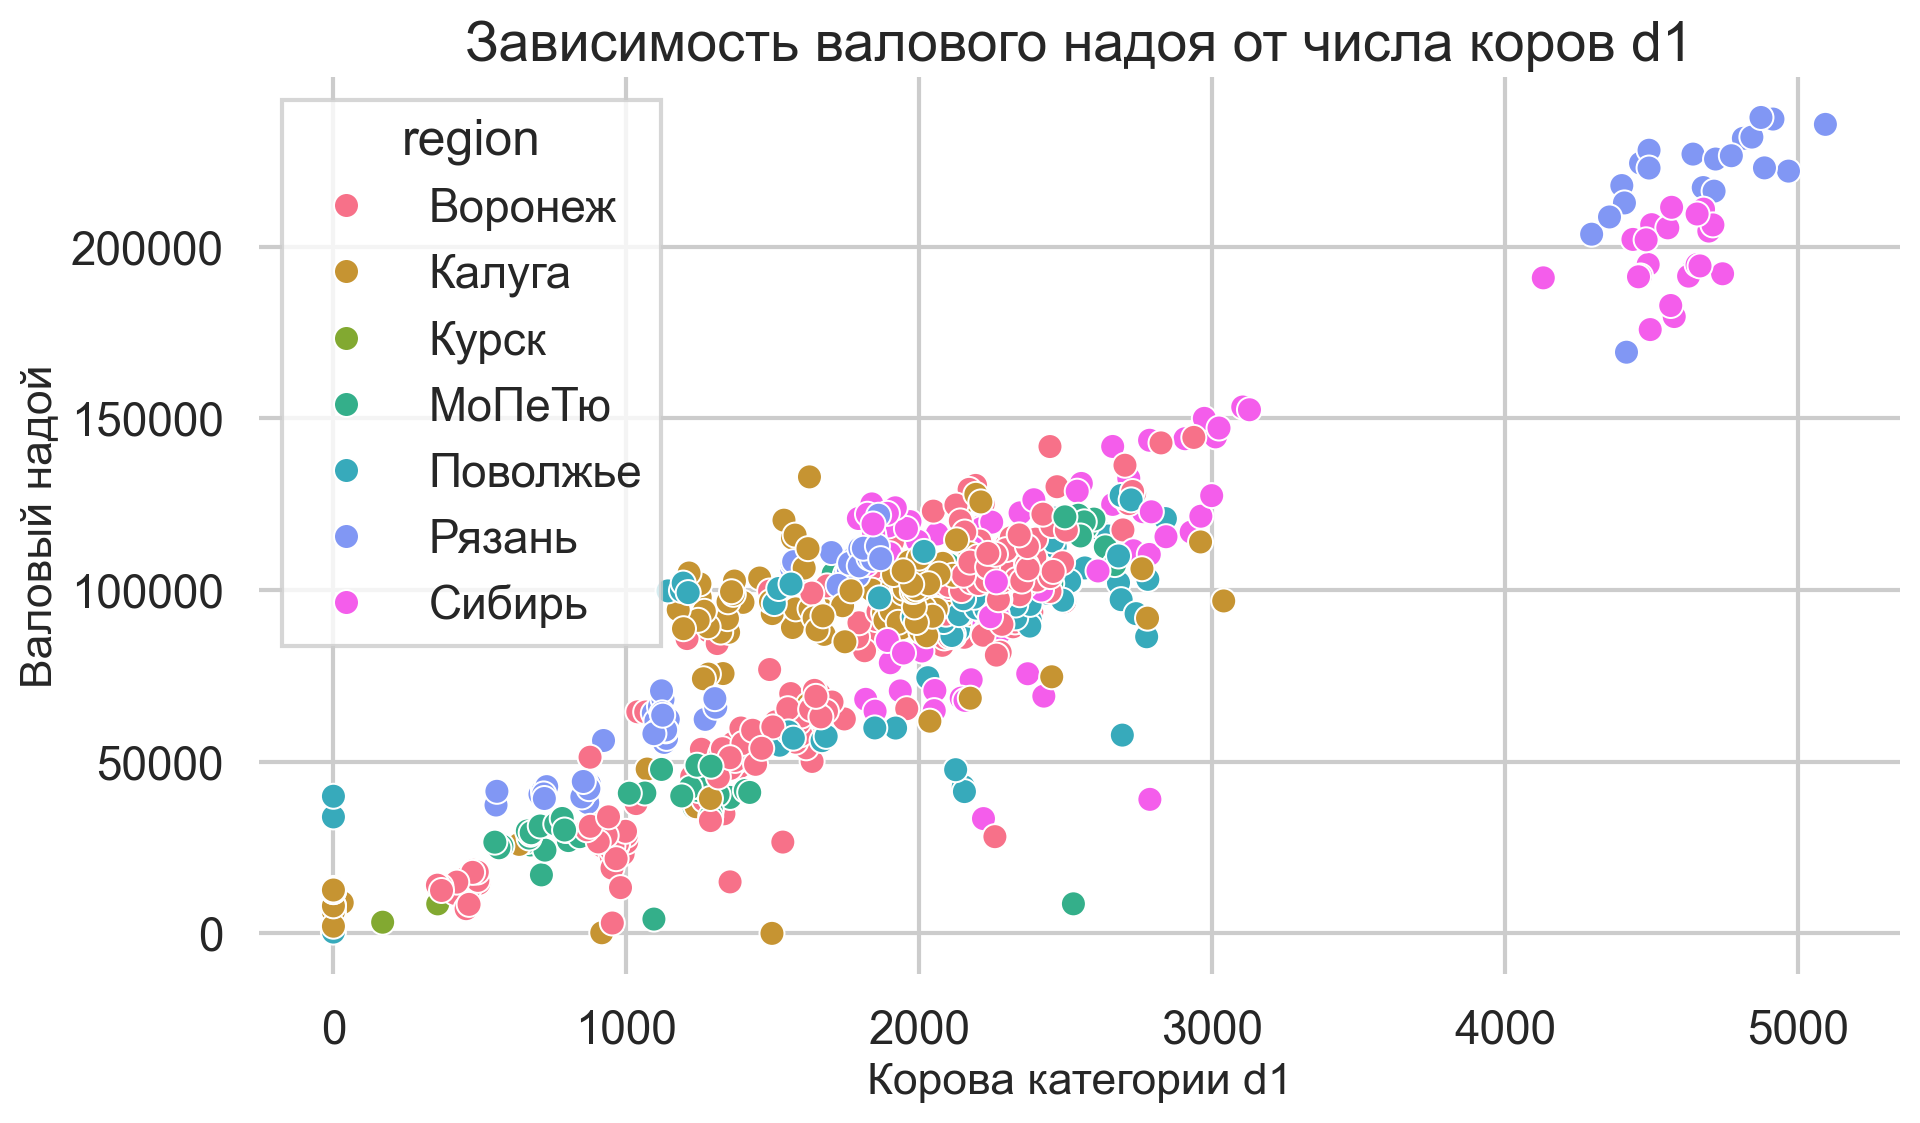

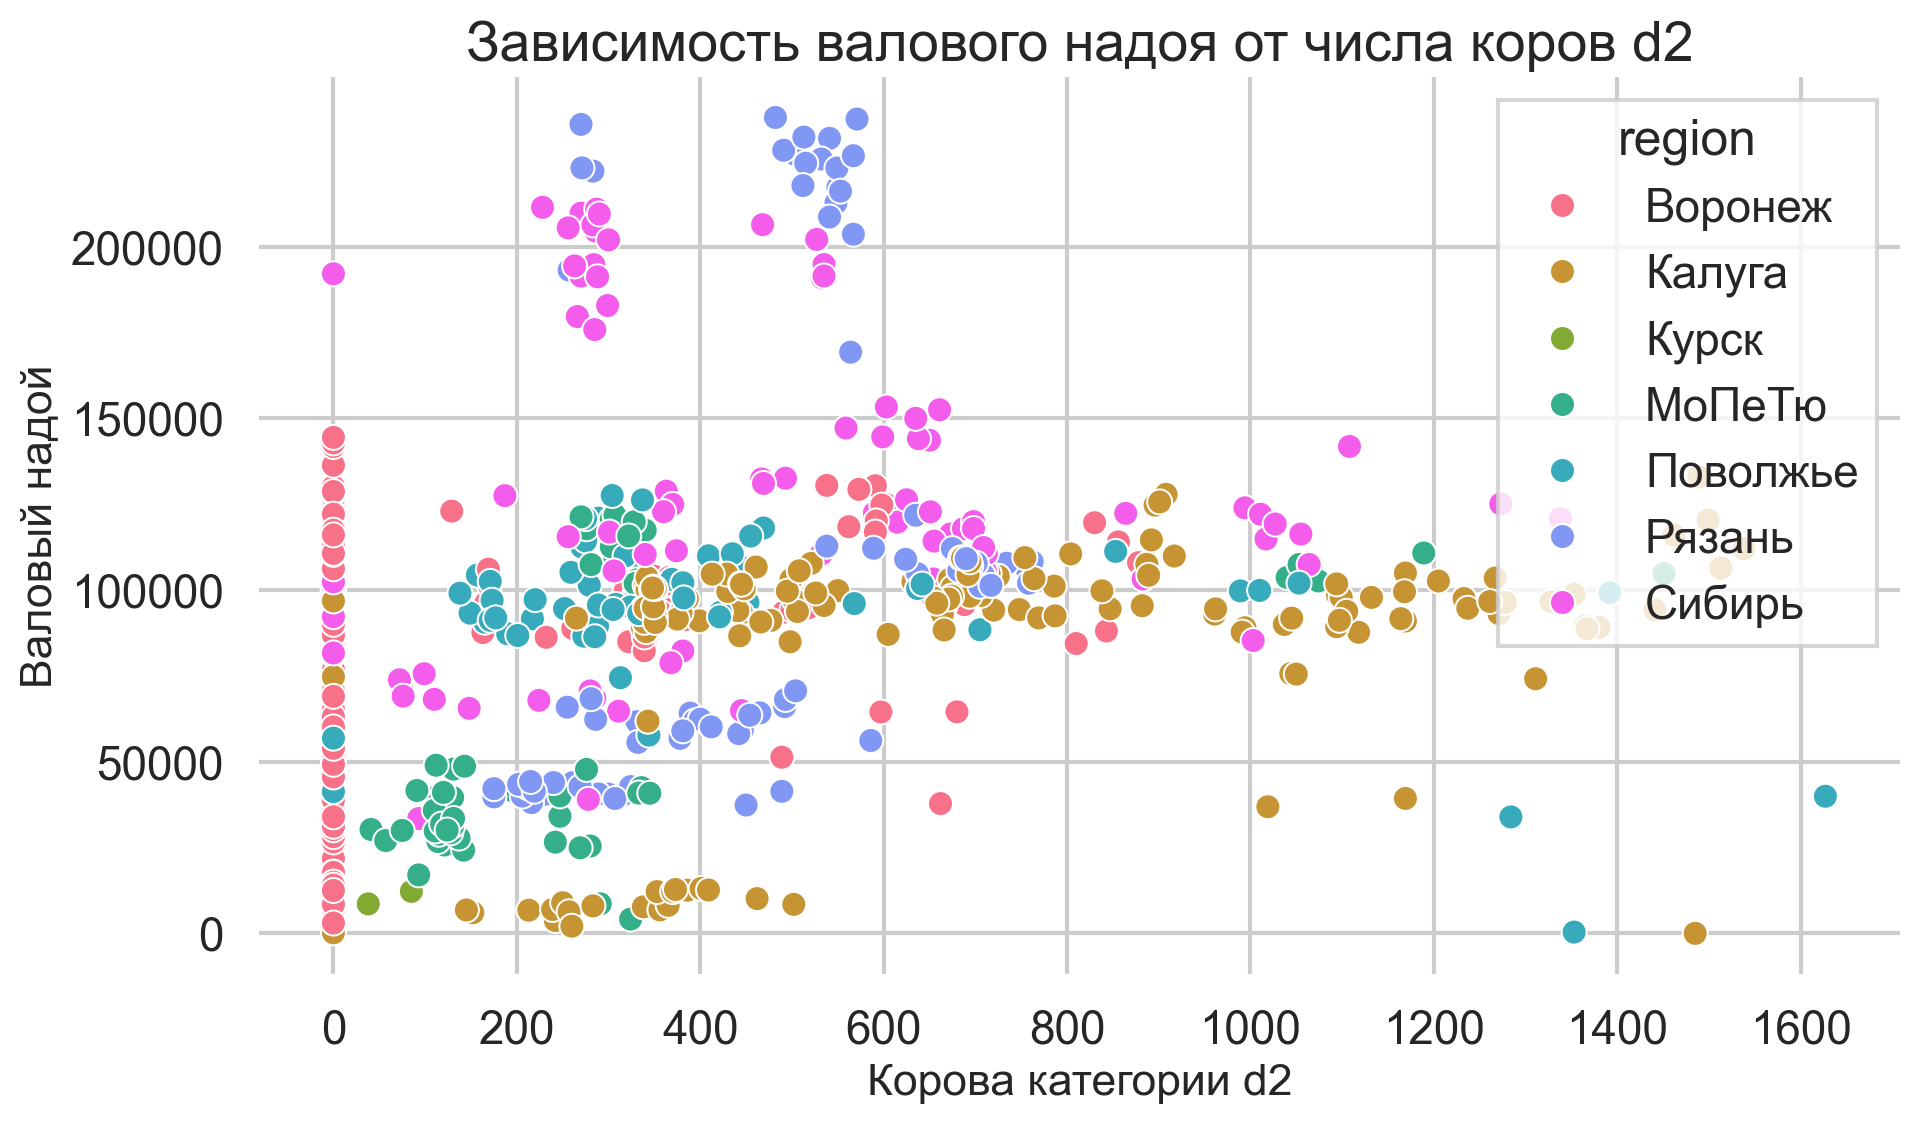

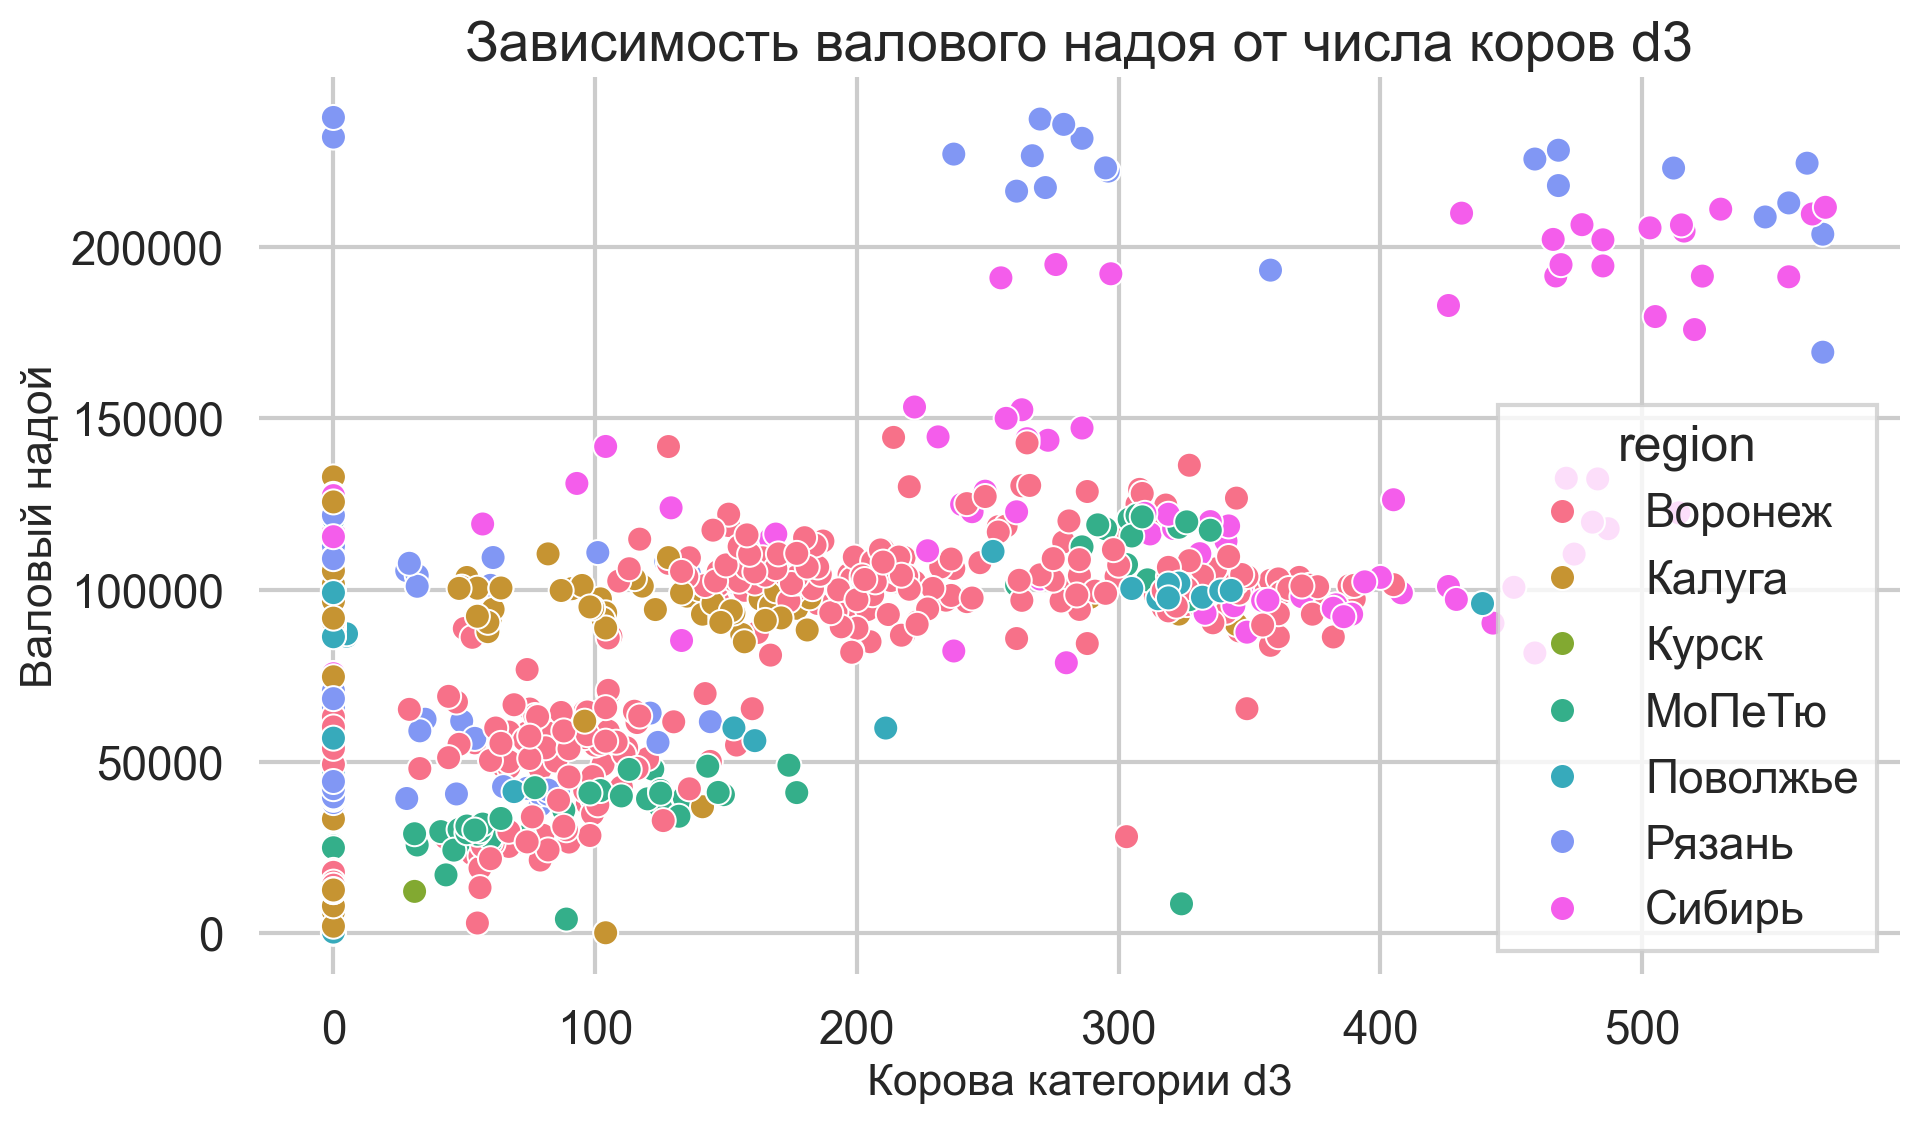

In [27]:
for i in ['d0', 'd1', 'd2', 'd3']:
    fig = plt.figure(figsize=(10,6))
    col_name = f'milk_cows_{i}'
    sns.scatterplot(data=production_indicators, x=col_name, y='gross_milk_yield', hue='region')
    plt.ylabel('Валовый надой', fontsize=16)
    plt.xlabel(f'Корова категории {i}', fontsize=16)
    plt.title(f'Зависимость валового надоя от числа коров {i}', fontsize=20)
    if (i == 'd1'):
        plt.savefig('val_d1.png')
    plt.tight_layout()
    plt.show()

In [28]:
farm_region = round(production_indicators.groupby('region')['farm_name'].count() / production_indicators['farm_name'].nunique(), 3)
farm_region

region
Воронеж     12.271
Калуга       6.153
Курск        0.254
МоПеТю       2.169
Поволжье     2.254
Рязань       3.254
Сибирь       3.254
Name: farm_name, dtype: float64

In [29]:
farm_region = round(herd_metrics.groupby('region')['farm_name'].count() / herd_metrics['farm_name'].nunique(), 3)
farm_region

region
Воронеж     23.362
Калуга      12.750
Курск        1.062
МоПеТю       3.350
Поволжье     2.912
Рязань       5.850
Сибирь       4.475
Name: farm_name, dtype: float64

In [30]:
herd_metrics.bac_contam.mean()

np.float64(41.121657822036674)

<Axes: xlabel='bac_contam', ylabel='Count'>

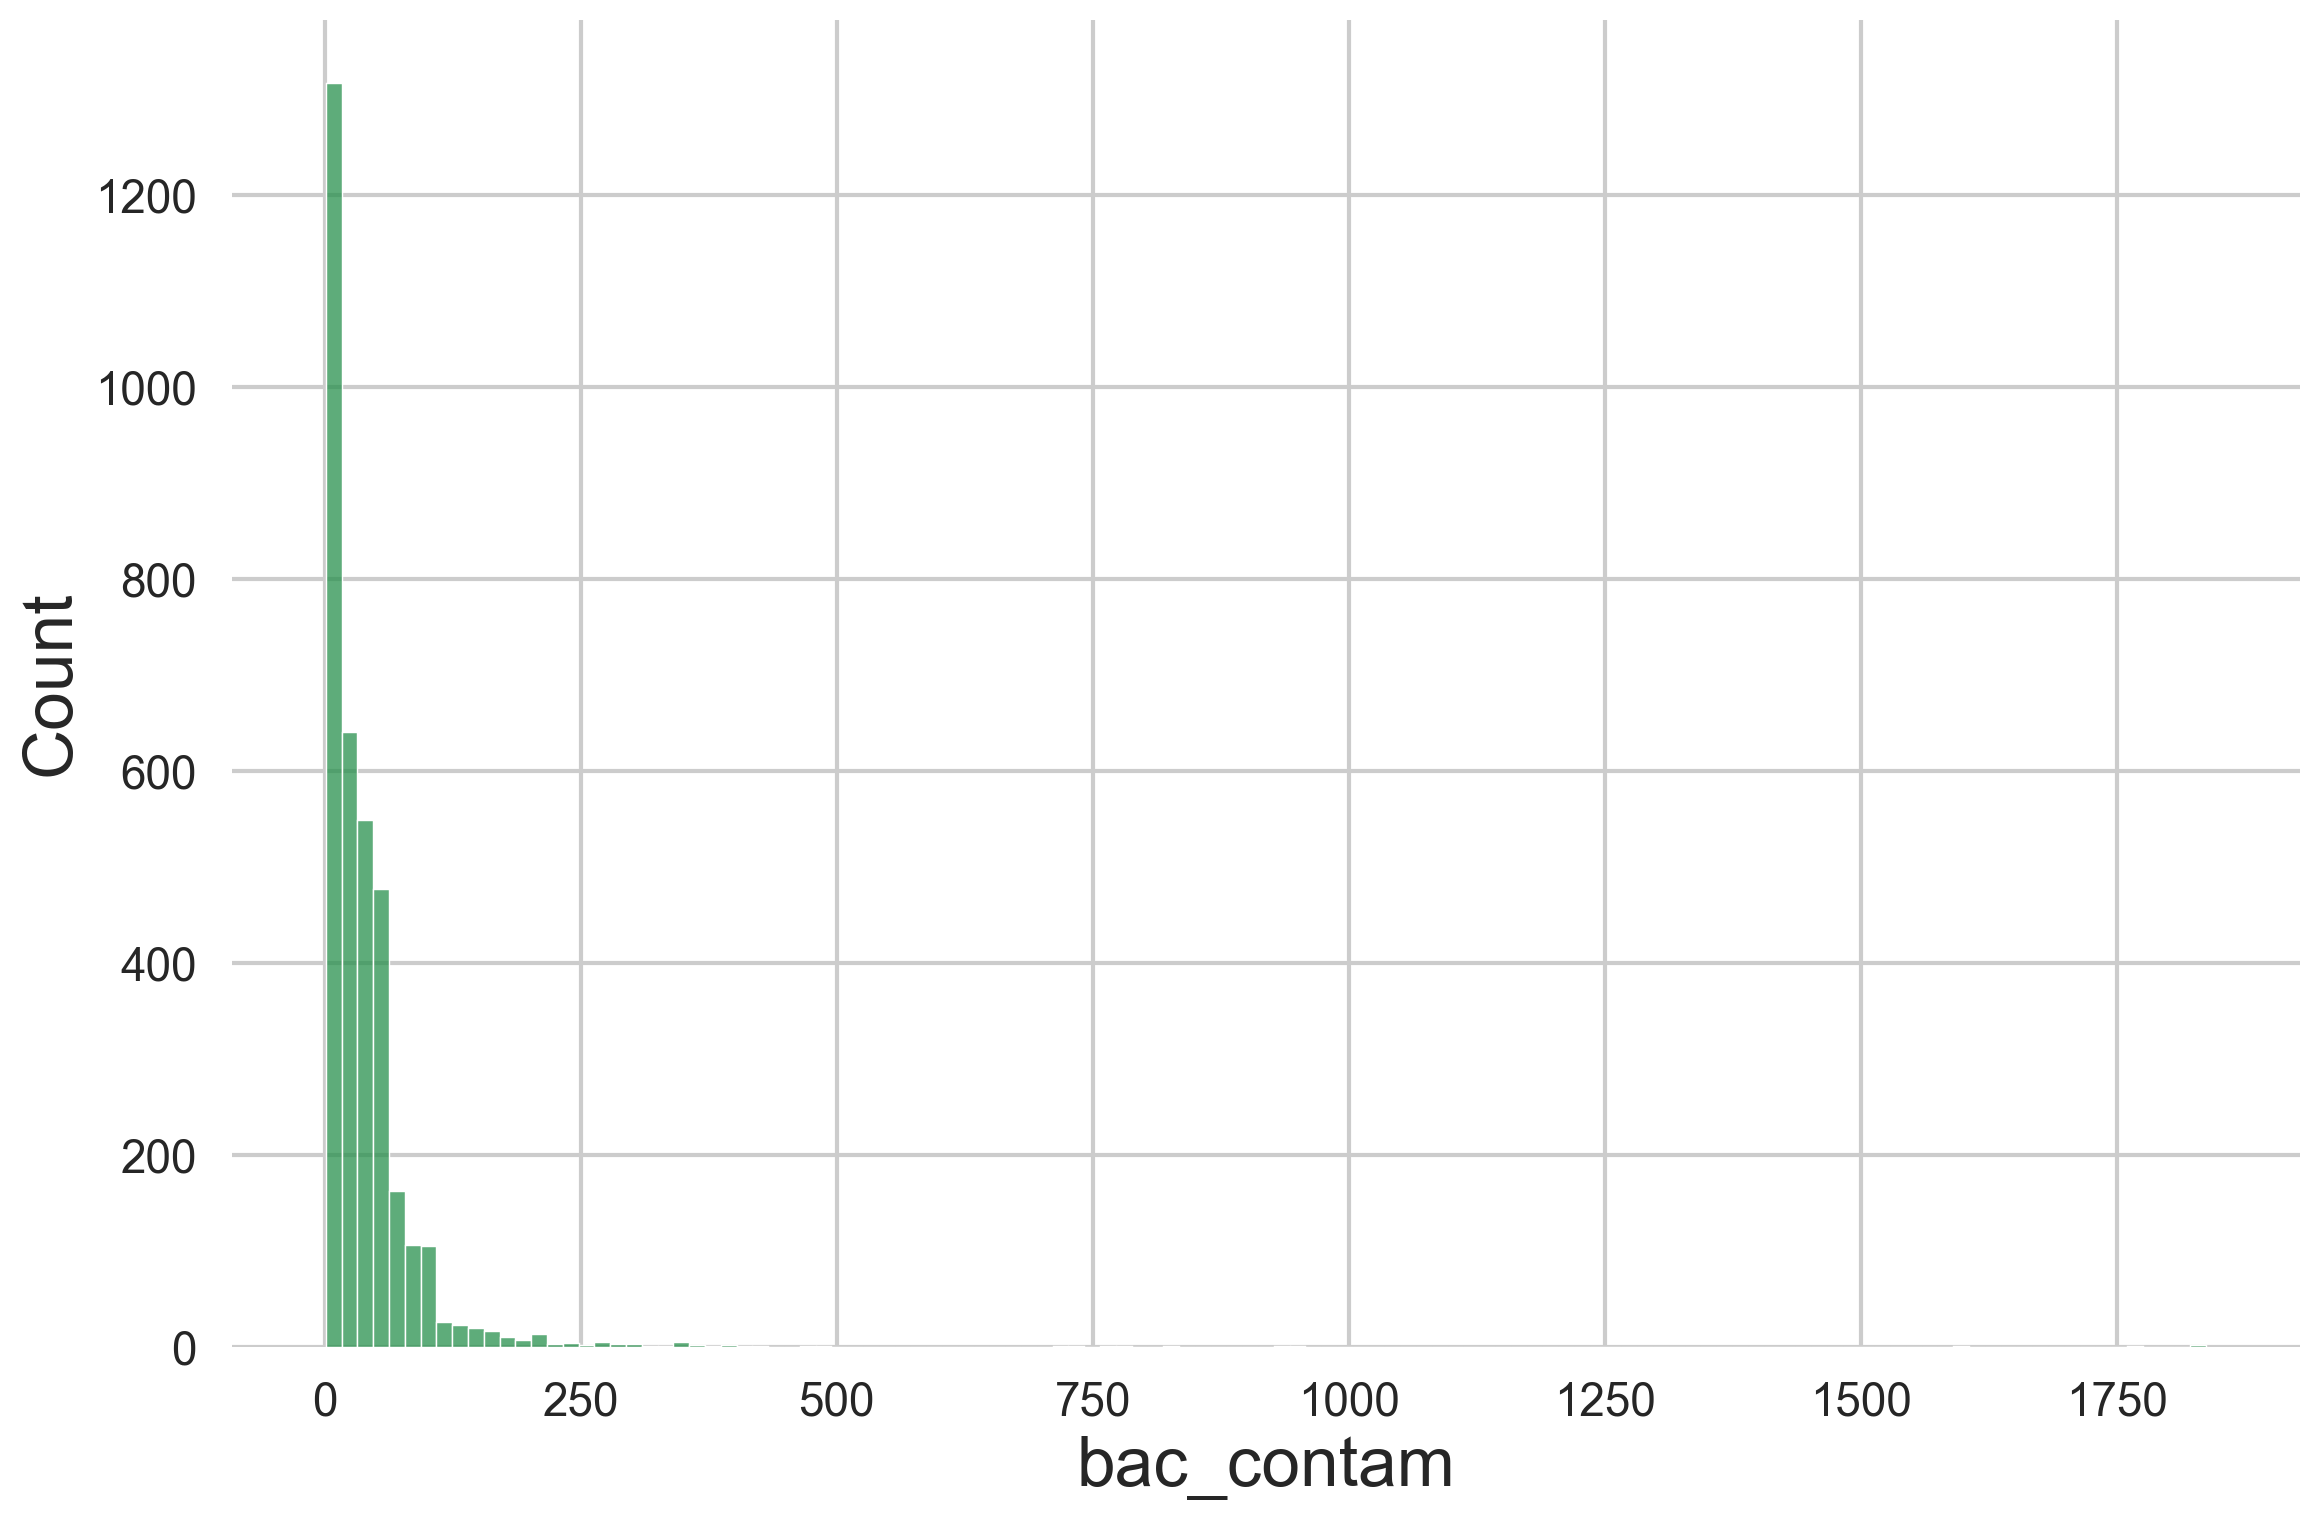

In [31]:
sns.histplot(data=herd_metrics, x='bac_contam')

In [32]:
asd = round(herd_metrics.groupby('region')[['milk_fat', 'milk_protein']].mean().reset_index(), 4)
asd

region  milk_fat  milk_protein
0   Воронеж    4.0943        3.5222
1    Калуга    3.9785        3.5540
2     Курск    3.8846        3.5231
3    МоПеТю    4.0218        3.3782
4  Поволжье    3.8983        3.4025
5    Рязань    3.8097        3.4328
6    Сибирь    3.7673        3.3388

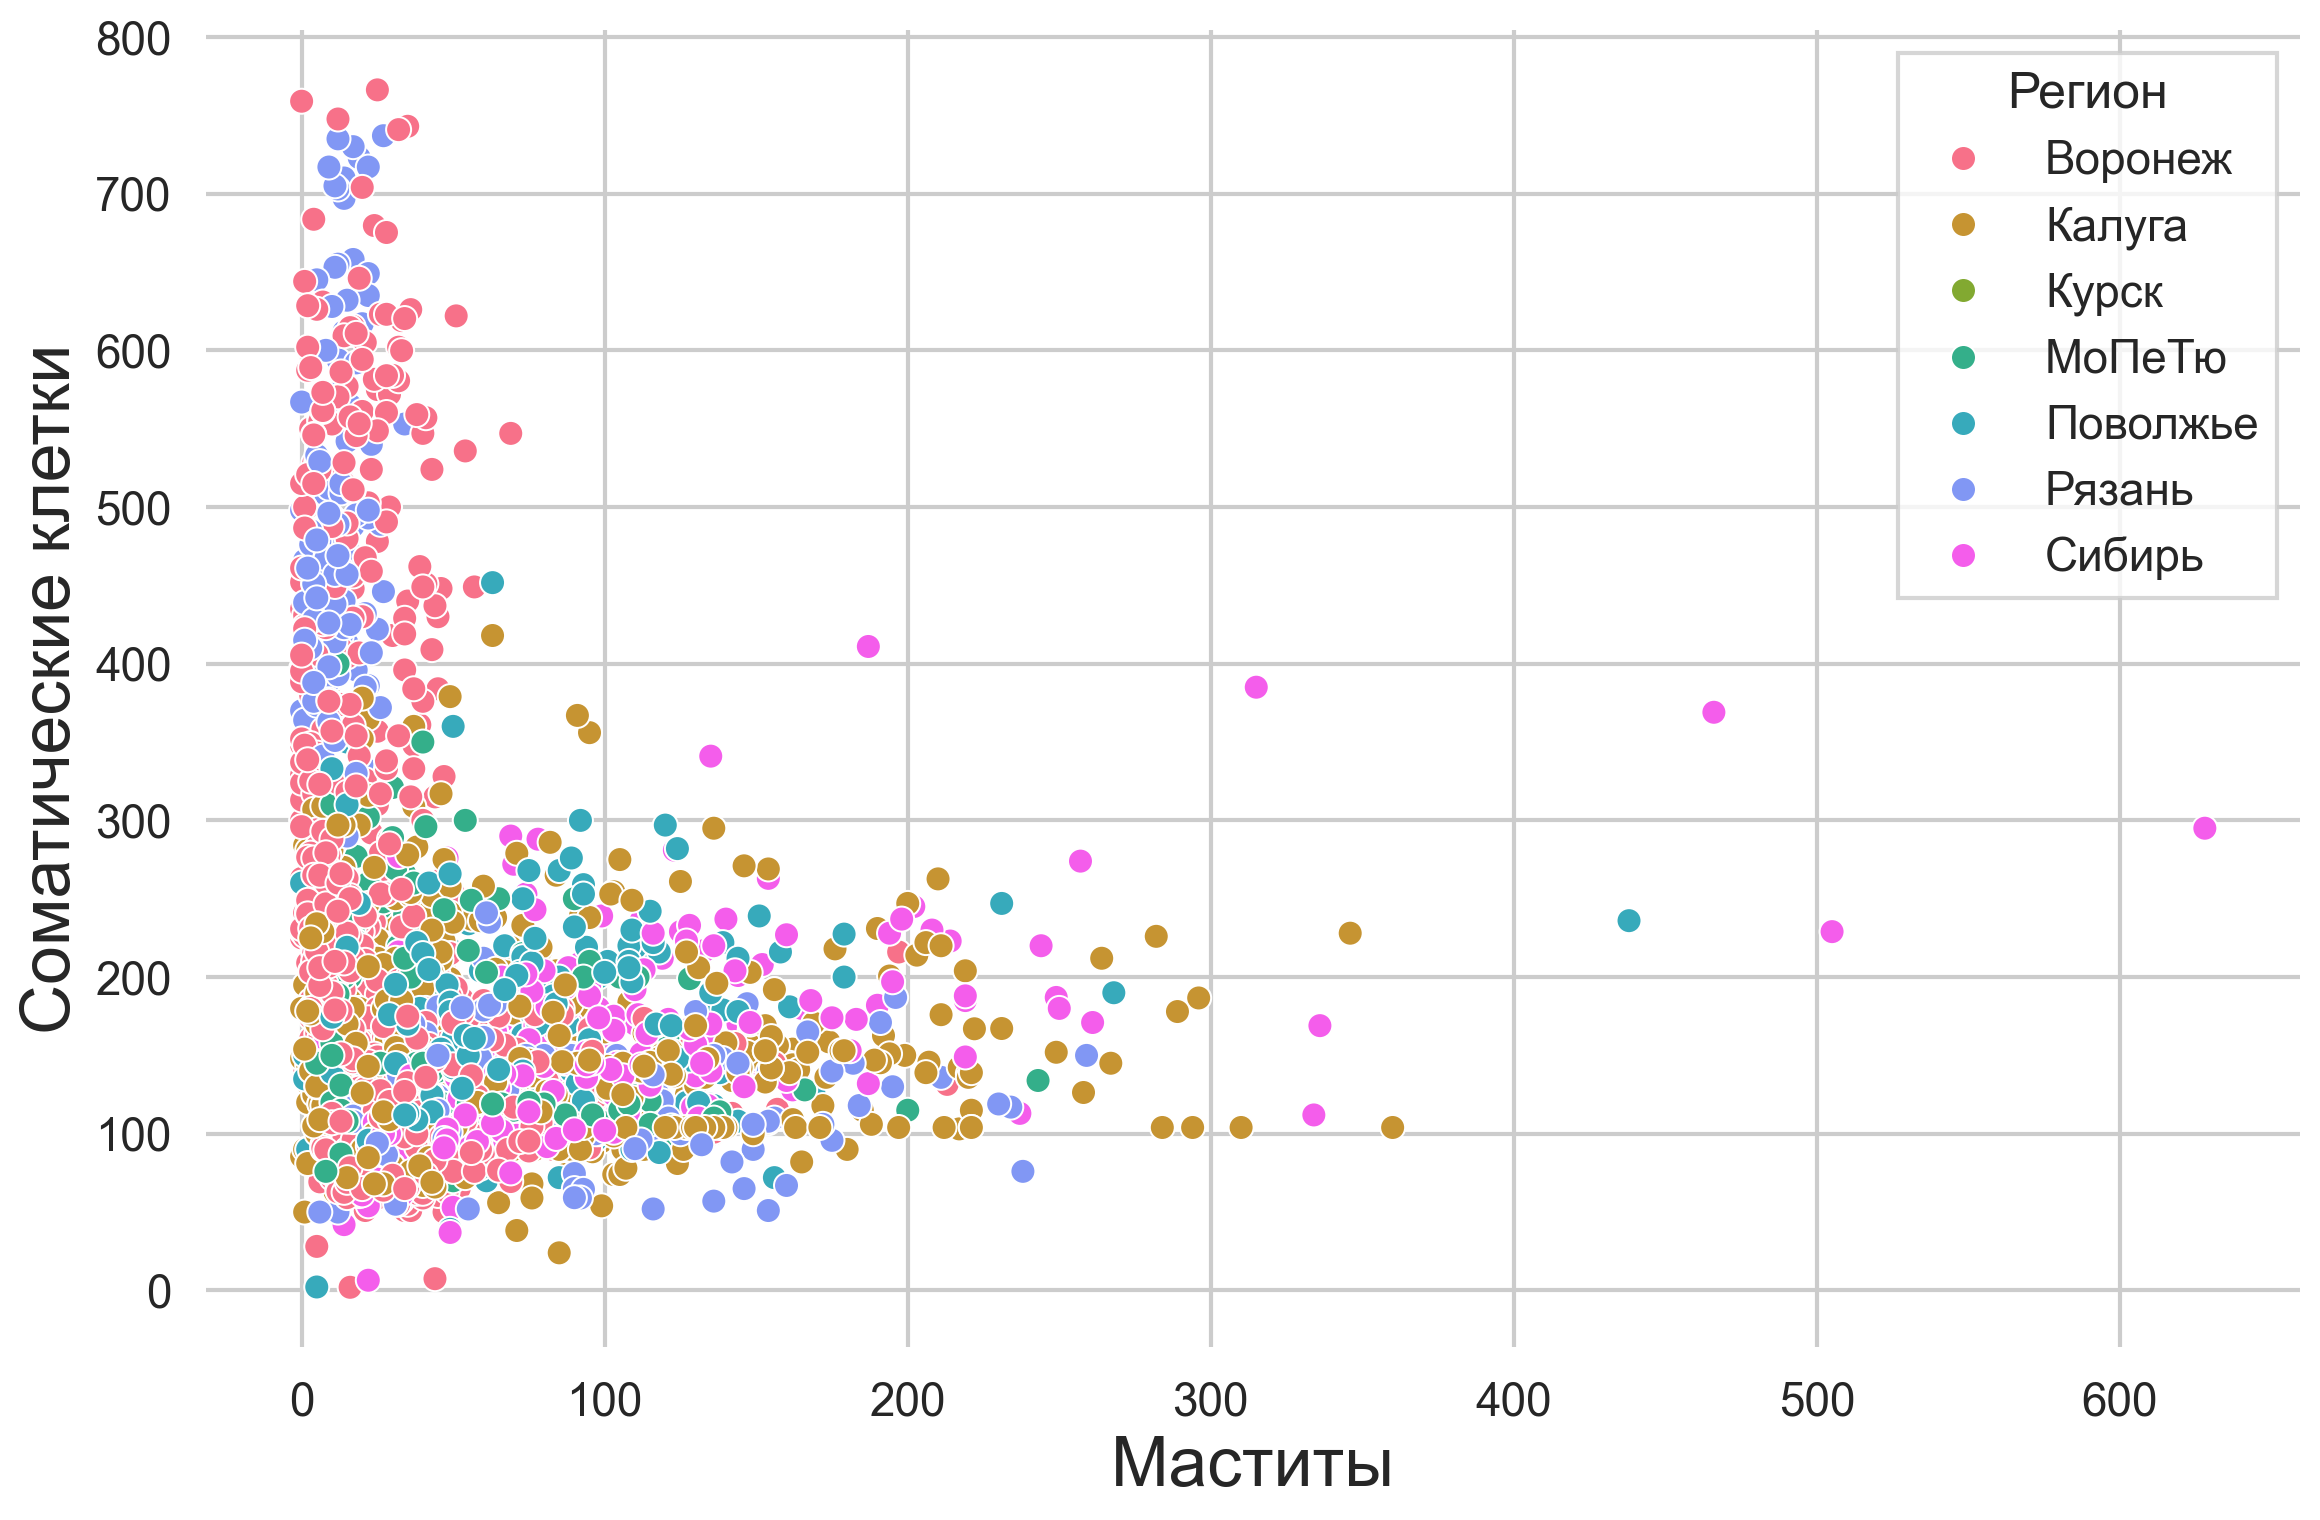

In [33]:
herd_metrics['cow_mastits'] = pd.to_numeric(herd_metrics['cow_mastits'], errors='coerce')
herd_metrics['somatic_cells'] = pd.to_numeric(herd_metrics['somatic_cells'], errors='coerce')
sns.scatterplot(data=herd_metrics, x='cow_mastits', y='somatic_cells', hue='region')
plt.xlabel('Маститы')
plt.ylabel('Соматические клетки')
plt.legend(title='Регион')
plt.savefig('val_d1.png')

<Axes: xlabel='cow_mastits', ylabel='somatic_cells'>

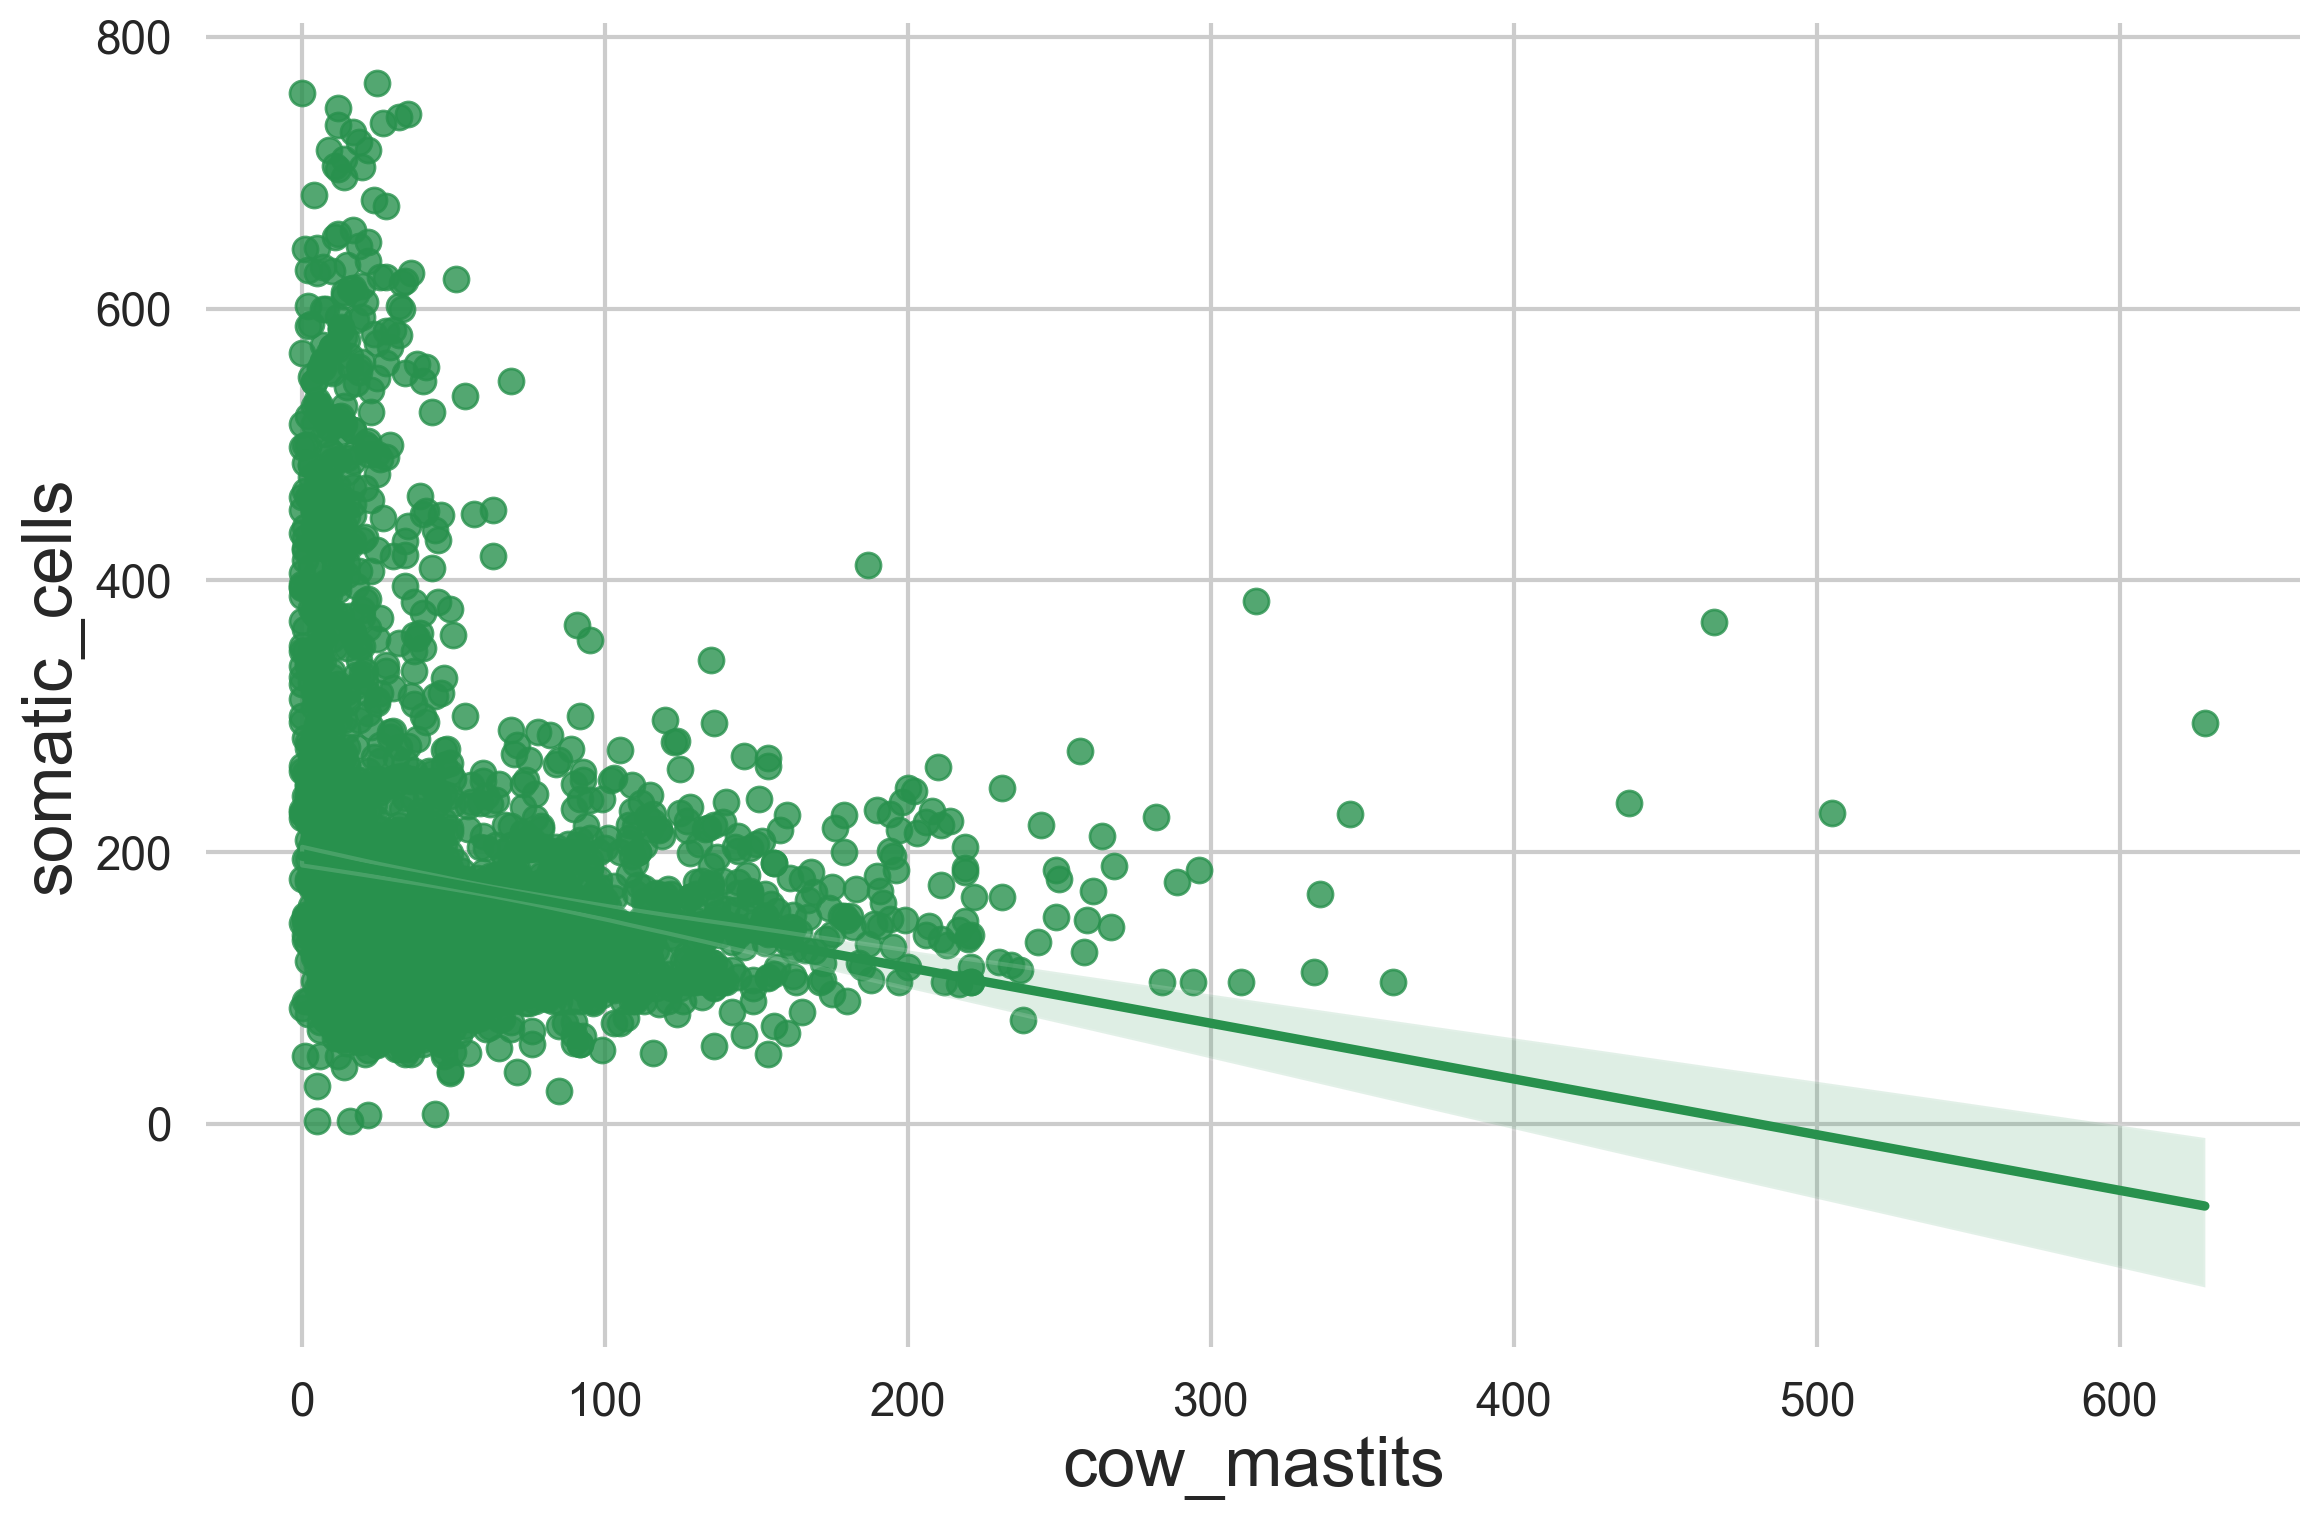

In [34]:
df_clean = herd_metrics.dropna(subset=['cow_mastits', 'somatic_cells'])
sns.regplot(data=df_clean, x='cow_mastits', y='somatic_cells')

In [35]:
herd_metrics = herd_metrics.sort_values('date')
herd_metrics['som_cells_next_month'] = herd_metrics['somatic_cells'].shift(-1)

<Axes: xlabel='som_cells_next_month', ylabel='cow_mastits'>

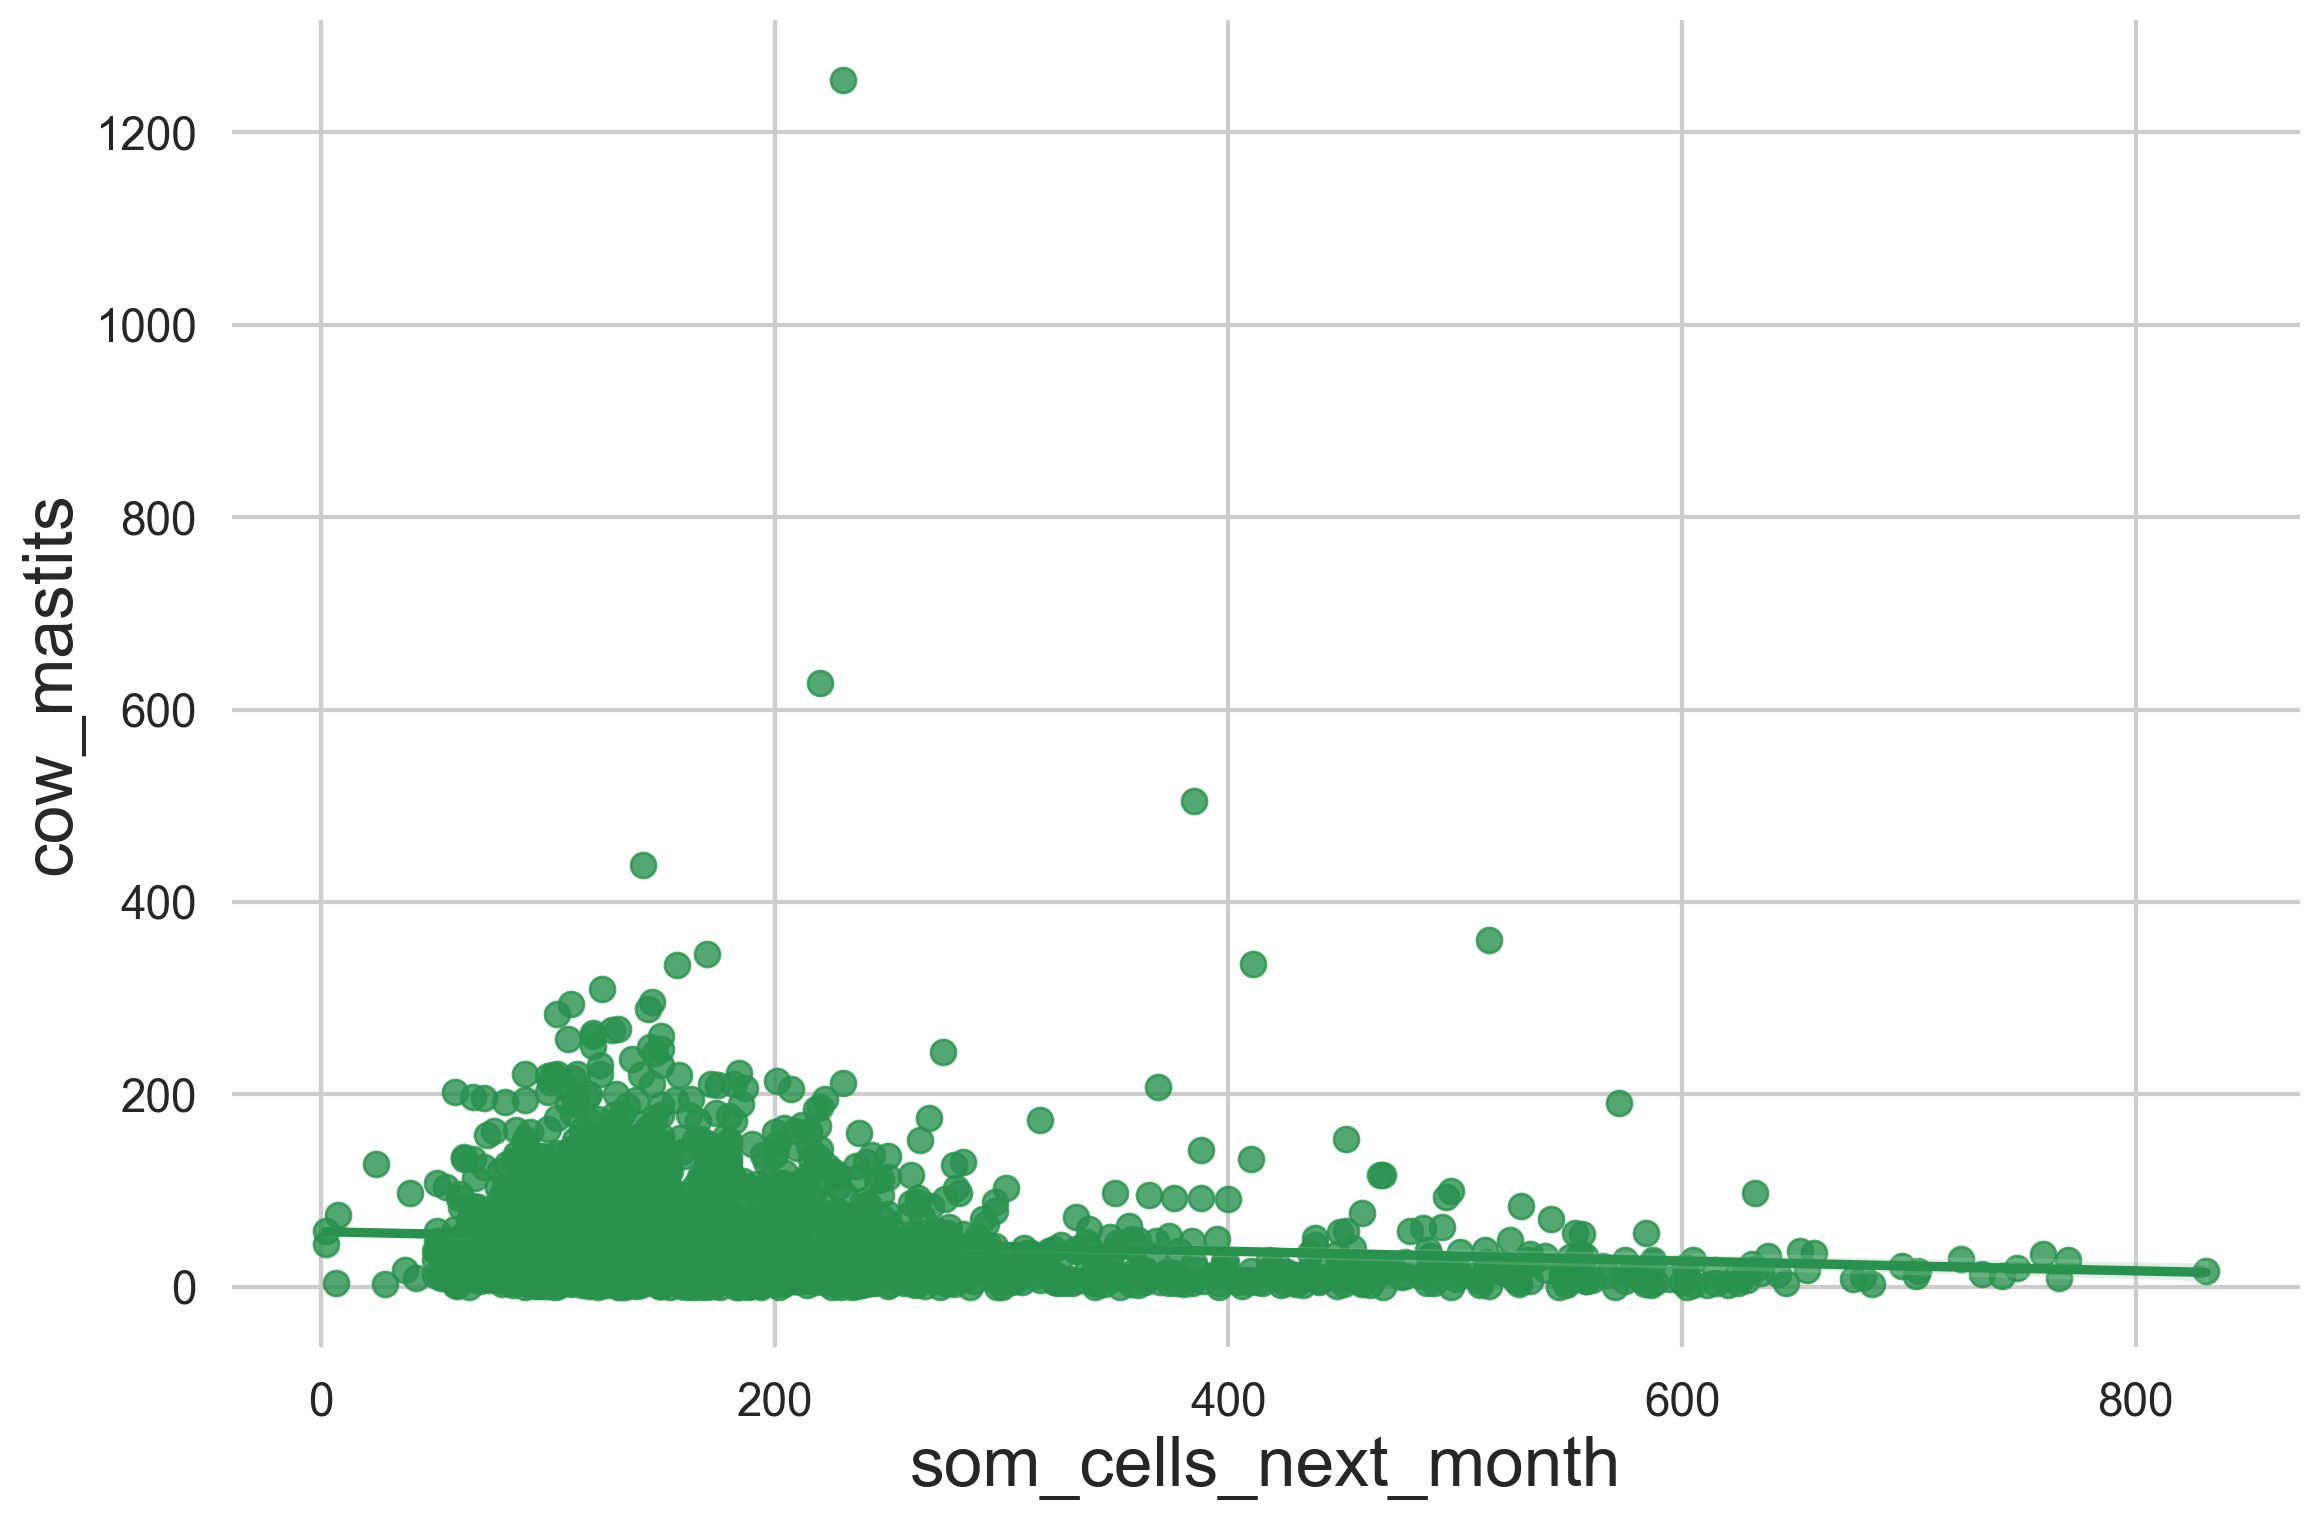

In [36]:
df_clean = herd_metrics.dropna(subset=['cow_mastits', 'som_cells_next_month'])
sns.regplot(data=df_clean, x='som_cells_next_month', y='cow_mastits')

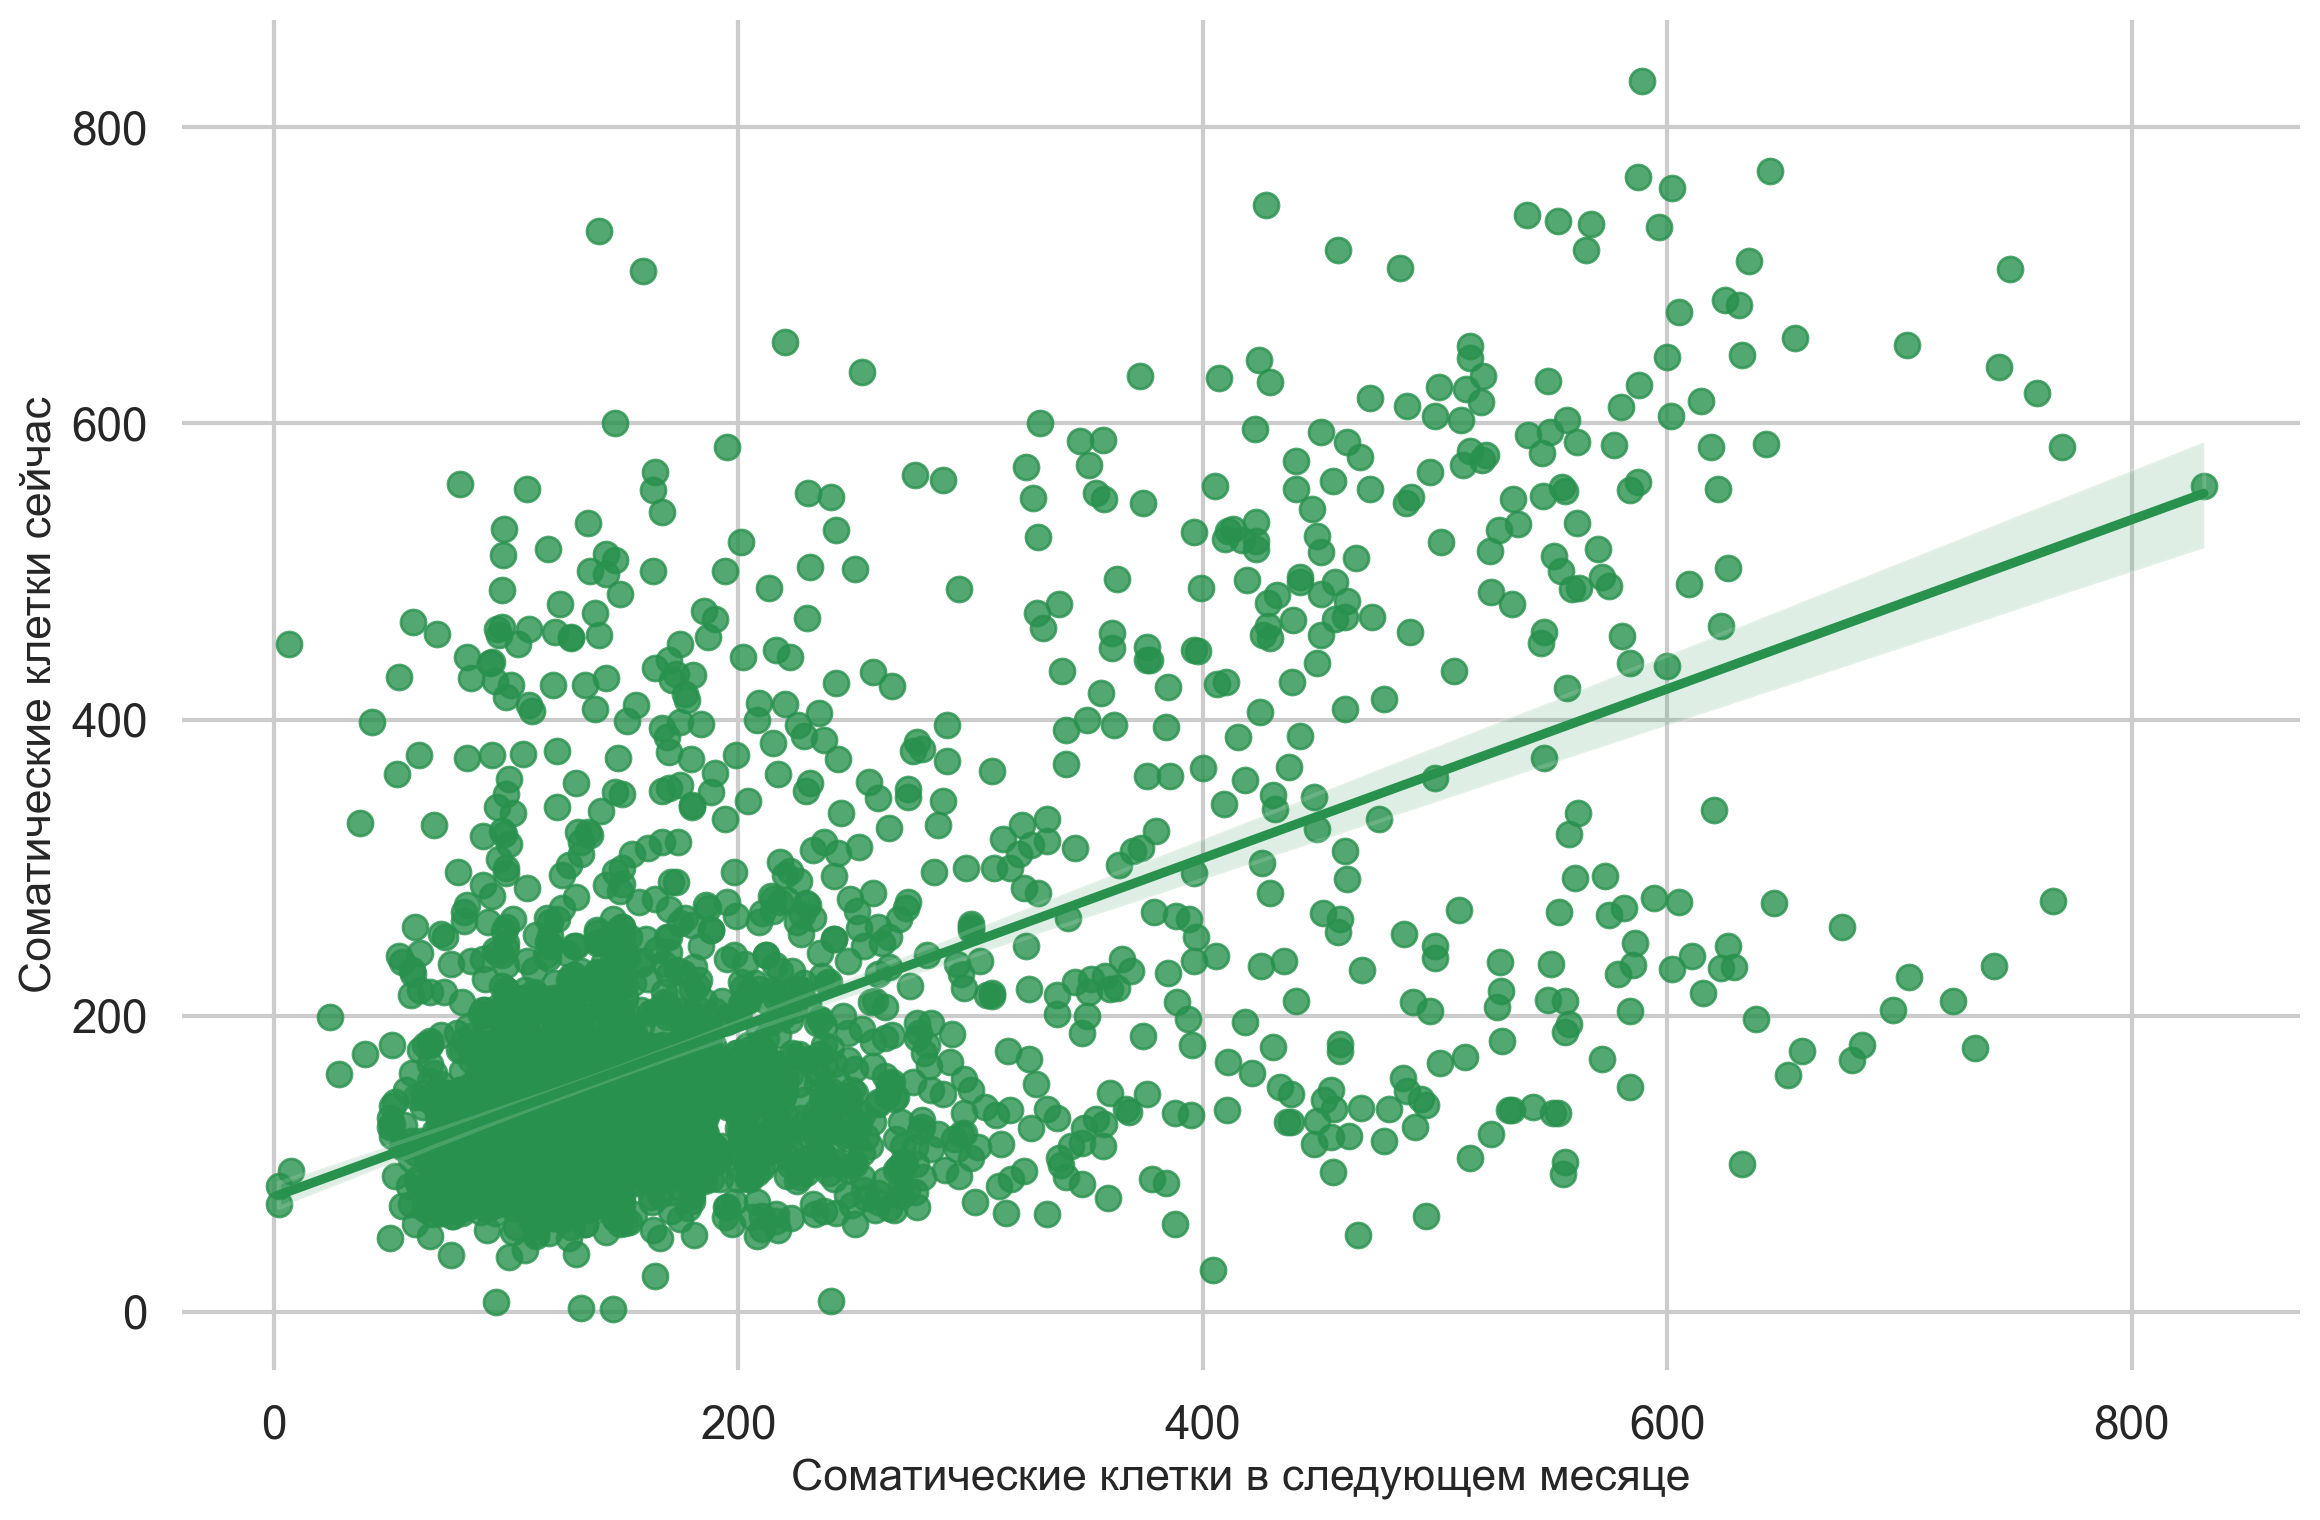

In [37]:
df_clean = herd_metrics.dropna(subset=['somatic_cells', 'som_cells_next_month'])
sns.regplot(data=df_clean, x='som_cells_next_month', y='somatic_cells')
plt.xlabel('Соматические клетки в следующем месяце', fontsize=16)
plt.ylabel('Соматические клетки сейчас', fontsize=16)
plt.savefig('val_d1.png')

In [38]:
mast_type = round(herd_metrics.groupby(['farm_type','region'])['cow_mastits'].mean() / herd_metrics['milk_cow'].mean(), 3)
mast_type

farm_type  region  
ЖК         Воронеж     0.020
           Калуга      0.036
           МоПеТю      0.025
           Поволжье    0.040
           Рязань      0.035
           Сибирь      0.050
МТФ        Воронеж     0.007
           Калуга      0.013
           Курск       0.000
           МоПеТю      0.005
           Поволжье    0.021
           Рязань      0.006
РЖК        Воронеж     0.005
           Курск       0.011
РМ         Воронеж       NaN
           Калуга      0.000
           Курск         NaN
           Рязань        NaN
           Сибирь        NaN
Name: cow_mastits, dtype: float64

In [39]:
herd_metrics[(herd_metrics['farm_type'] == 'РМ') & (herd_metrics['region'] == 'Калуга') & (herd_metrics['milk_cow'] > 0)]

Empty DataFrame
Columns: [date, region, prod_farm_name, farm_type, farm_name, ls_capacity, ls_occupancy, forage_cow, milk_cow, dry_cow, milk_marketab_prc, forcow_milk_yeild, forcow_milk_yeild_stand, milk_fat, milk_protein, somatic_cells, bac_contam, cow_retired, cow_lame, cow_mastits, calves, cow_metrit, ph_urine_avr, som_cells_next_month]
Index: []

In [40]:
type_region = herd_metrics.groupby(['farm_type', 'region']).count()
type_region

date  prod_farm_name  farm_name  ls_capacity  \
farm_type region                                                   
ЖК        Воронеж   1061            1061       1061         1061   
          Калуга     687             687        687          687   
          МоПеТю     201             201        201          201   
          Поволжье   219             219        219          219   
          Рязань     268             268        268          268   
          Сибирь     291             291        291          291   
МТФ       Воронеж    533             533        533          484   
          Калуга      68              68         68           68   
          Курск        5               5          5            5   
          МоПеТю      67              67         67           67   
          Поволжье    14              14         14           14   
          Рязань     134             134        134          110   
РЖК       Воронеж     67              67         67           67   
          Курск       50              50         50           50   
РМ        Воронеж    208             208        208            0   
          Калуга     265             265        265            1   
          Курск       30              30         30           11   
          Рязань      66              66         66            0   
          Сибирь      67              67         67           11   

                    ls_occupancy  forage_cow  milk_cow  dry_cow  \
farm_type region                                                  
ЖК        Воронеж           1061        1061      1061     1061   
          Калуга             687         687       687      687   
          МоПеТю             196         196       196      196   
          Поволжье           218         218       218      218   
          Рязань             268         268       268      268   
          Сибирь             290         291       291      291   
МТФ       Воронеж            480         480       480      480   
          Калуга              68          68        68       68   
          Курск                2           2         2        2   
          МоПеТю              67          67        67       67   
          Поволжье            14          14        14       14   
          Рязань             110         134       134      134   
РЖК       Воронеж             67          67        67       67   
          Курск               50          49        49       49   
РМ        Воронеж              0           0         0        0   
          Калуга               1           1         1        1   
          Курск                0           0         0        0   
          Рязань               0           0         0        0   
          Сибирь               0           0         0        0   

                    milk_marketab_prc  forcow_milk_yeild  \
farm_type region                                           
ЖК        Воронеж                1061                496   
          Калуга                  645                284   
          МоПеТю                  195                 93   
          Поволжье                214                111   
          Рязань                  268                124   
          Сибирь                  291                147   
МТФ       Воронеж                 475                214   
          Калуга                   68                 31   
          Курск                     2                  0   
          МоПеТю                   67                 31   
          Поволжье                 10                 10   
          Рязань                  134                 62   
РЖК       Воронеж                  67                 31   
          Курск                    49                 13   
РМ        Воронеж                   0                  0   
          Калуга                    0                  1   
          Курск                     0                  0   
          Рязань                    0      

In [41]:
farm_mast = herd_metrics.groupby('farm_type')[['cow_mastits', 'milk_cow']].sum()
otn = farm_mast['cow_mastits'] / farm_mast['milk_cow']
# farm_mast
otn

farm_type
ЖК     0.024278
МТФ    0.036249
РЖК    0.029923
РМ          NaN
dtype: float64

In [42]:
herd_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 0 to 4300
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     4301 non-null   datetime64[ns]
 1   region                   4301 non-null   object        
 2   prod_farm_name           4301 non-null   object        
 3   farm_type                4301 non-null   object        
 4   farm_name                4301 non-null   object        
 5   ls_capacity              3615 non-null   float64       
 6   ls_occupancy             3579 non-null   float64       
 7   forage_cow               3603 non-null   float64       
 8   milk_cow                 3603 non-null   float64       
 9   dry_cow                  3603 non-null   float64       
 10  milk_marketab_prc        3546 non-null   float64       
 11  forcow_milk_yeild        1648 non-null   float64       
 12  forcow_milk_yeild_stand  1648 non-null 

In [43]:
def dates(dff, name):
    dff = dff.copy()
    dff[name] = pd.to_datetime(dff[name], errors='coerce')
    dff['year'] = dff[name].dt.year
    dff['month'] = dff[name].dt.month
    dff['date_month'] = dff[name].dt.to_period('M').dt.to_timestamp()
    return dff
herd_metrics = dates(herd_metrics, 'date')

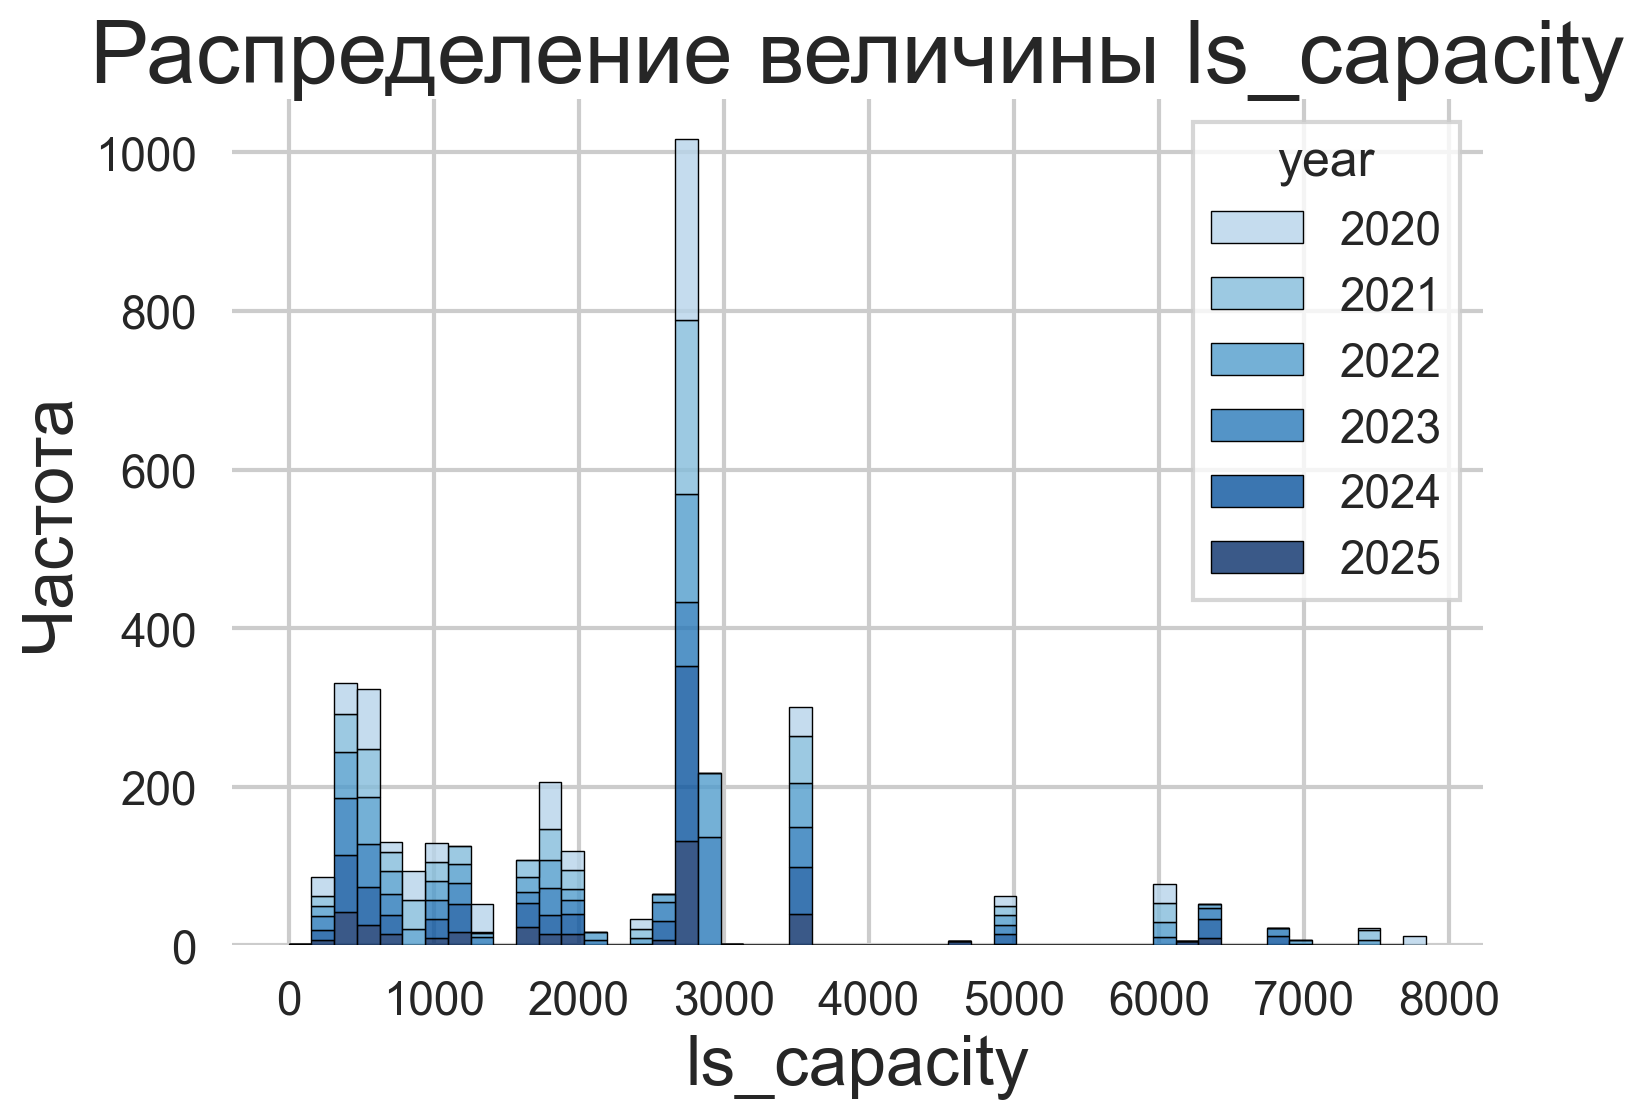

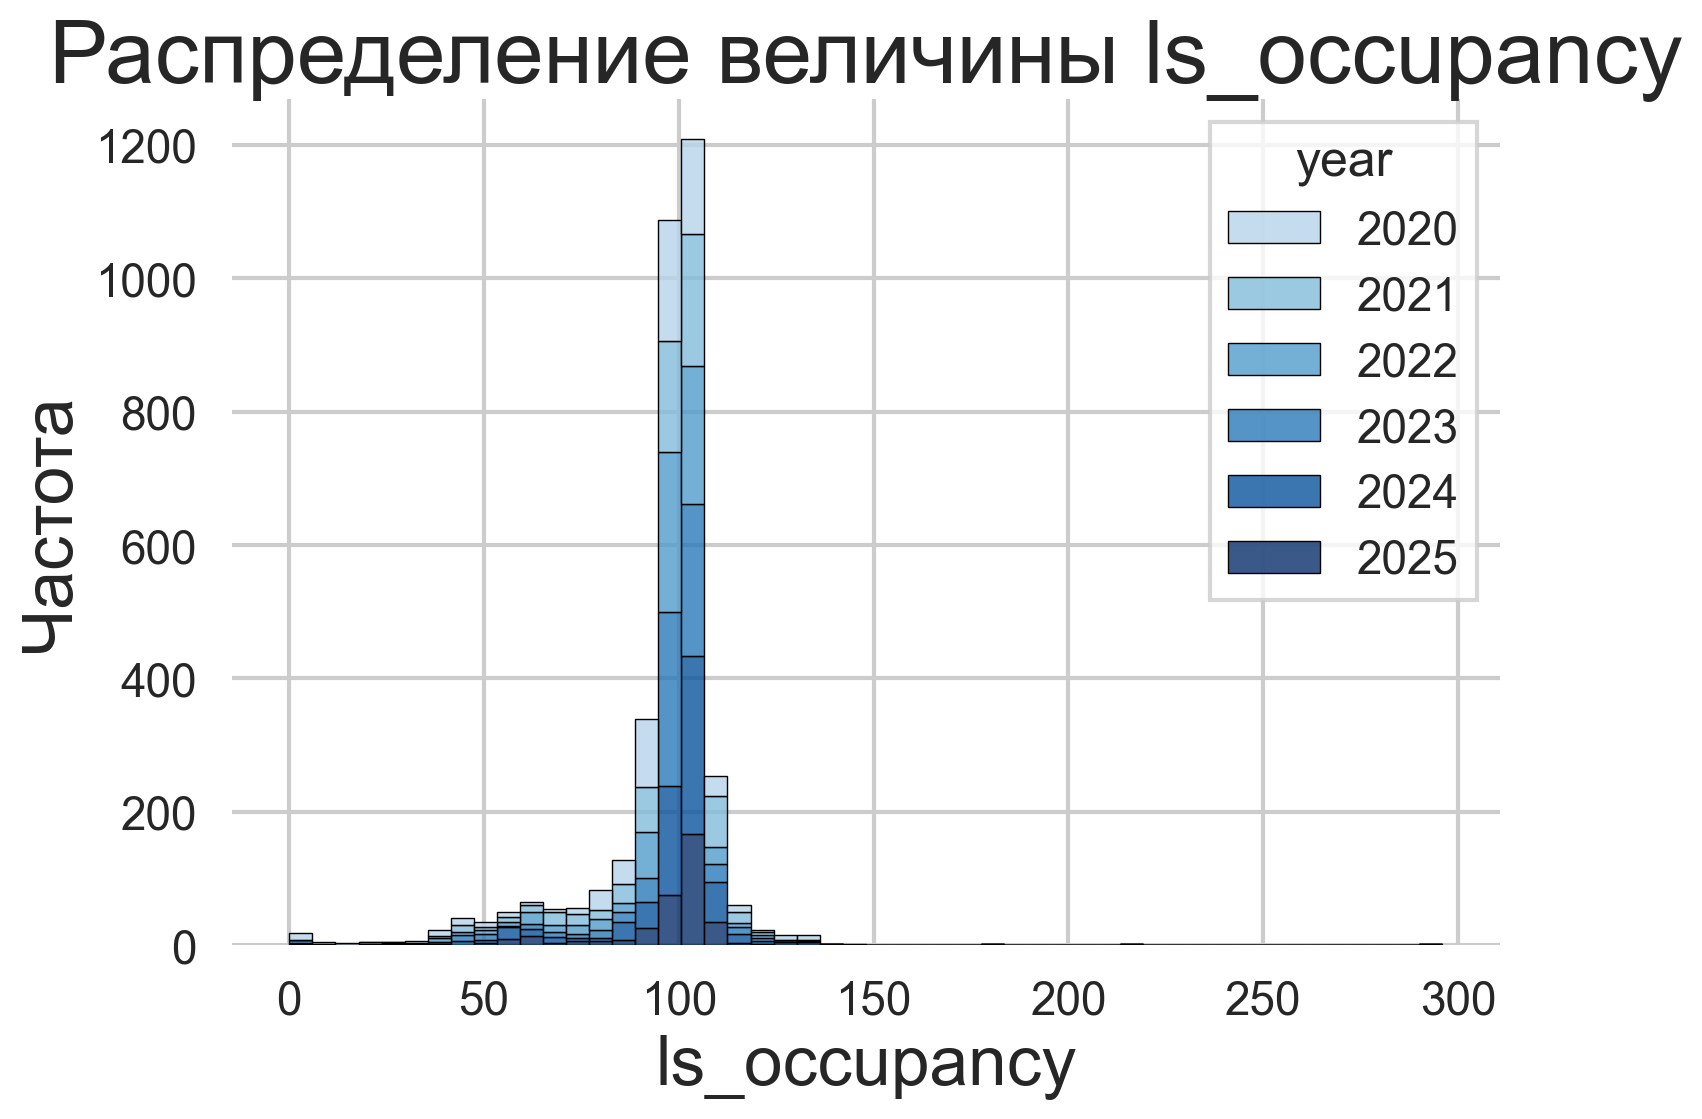

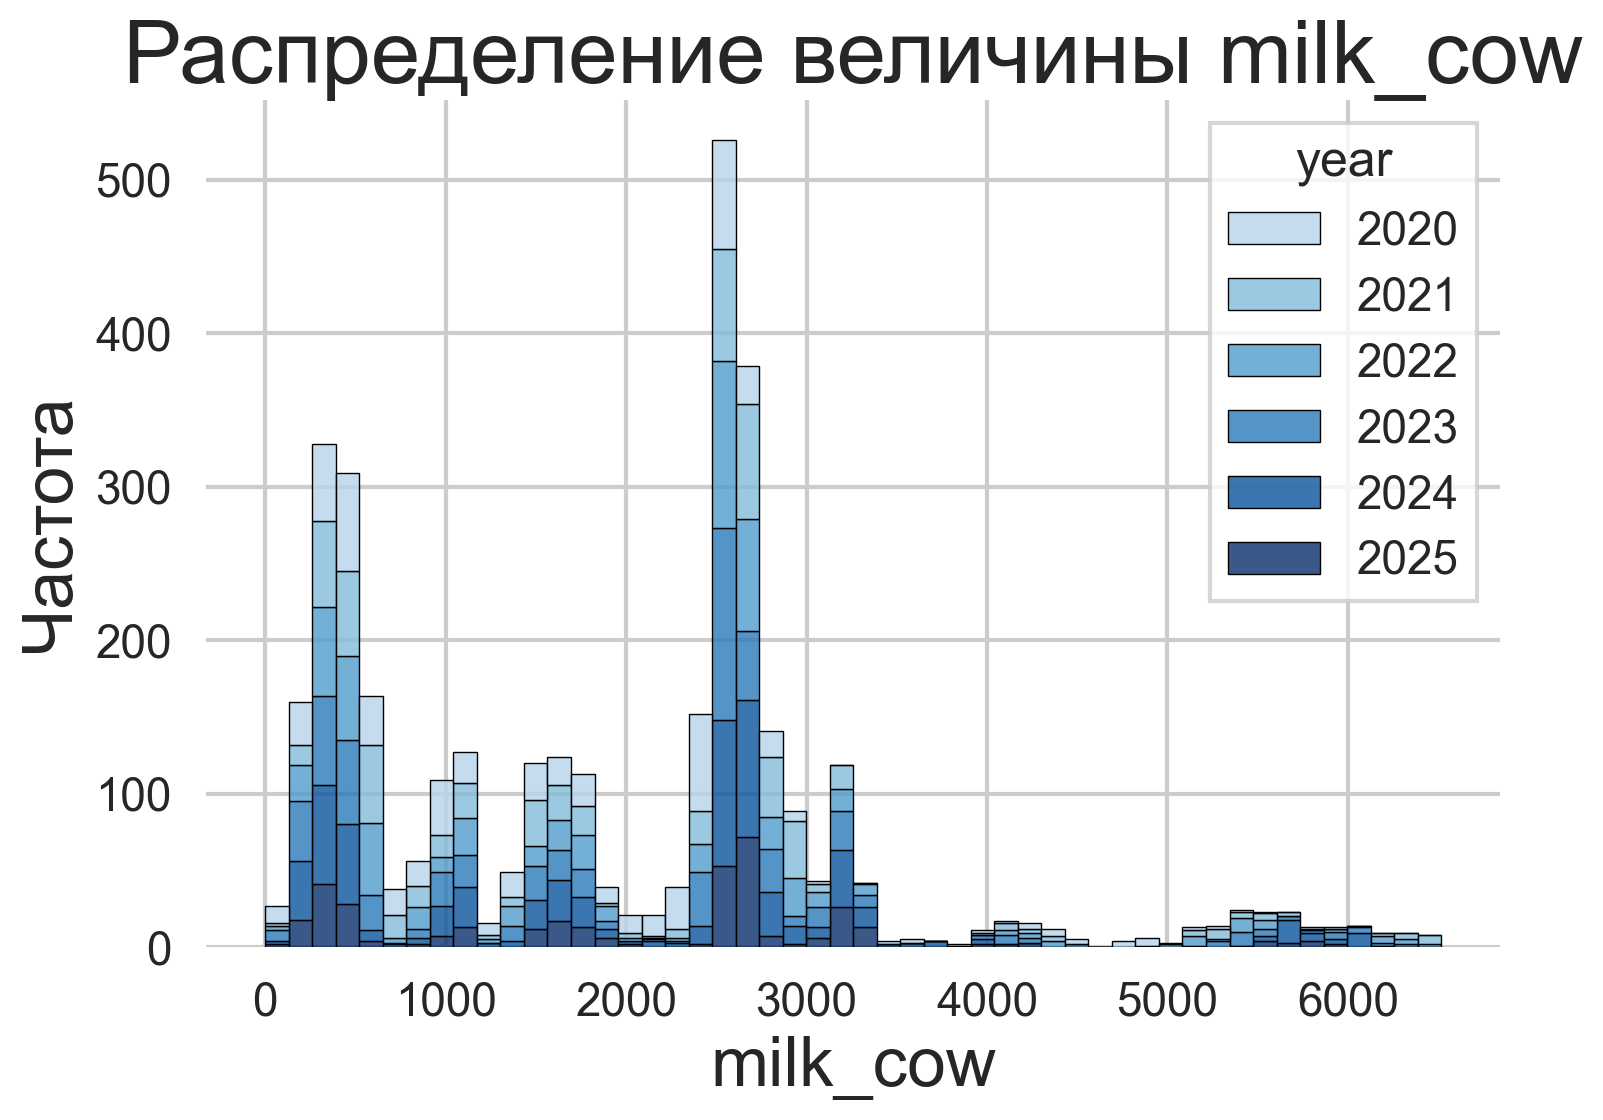

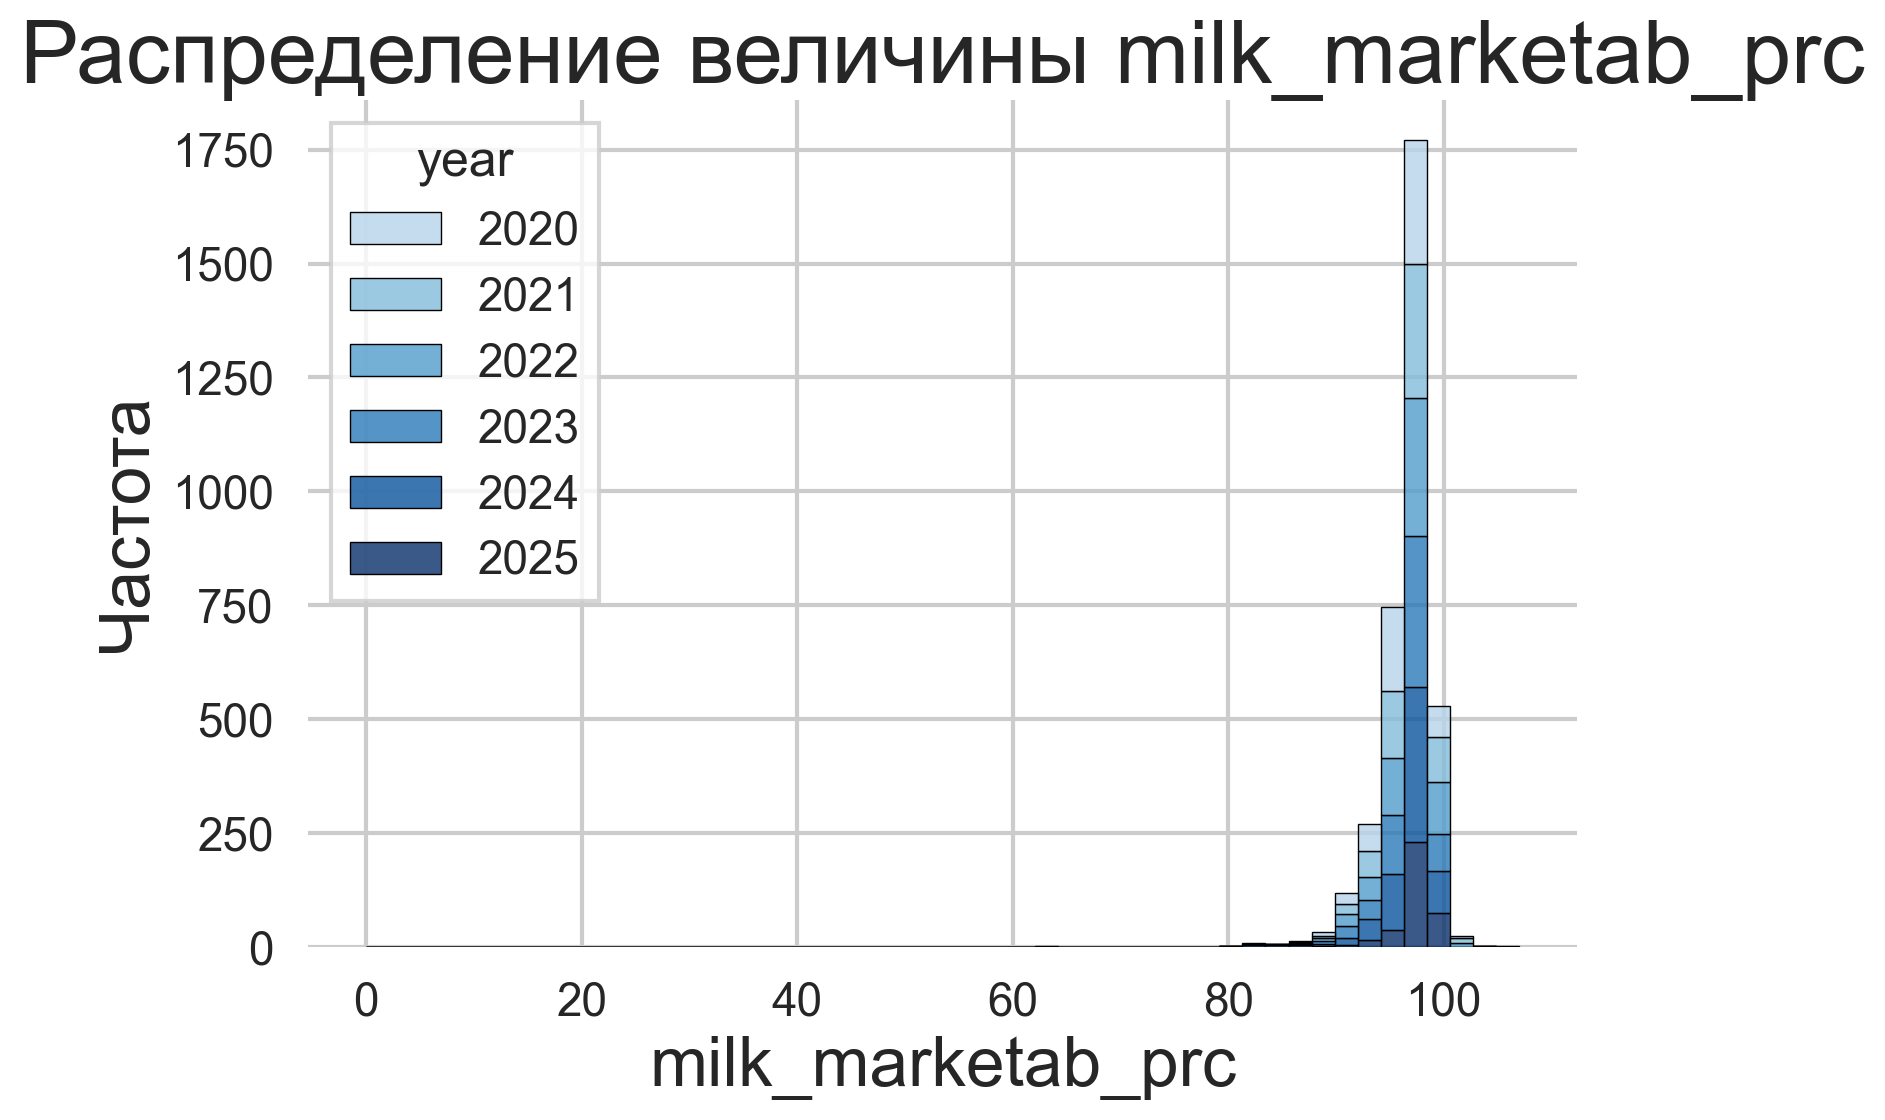

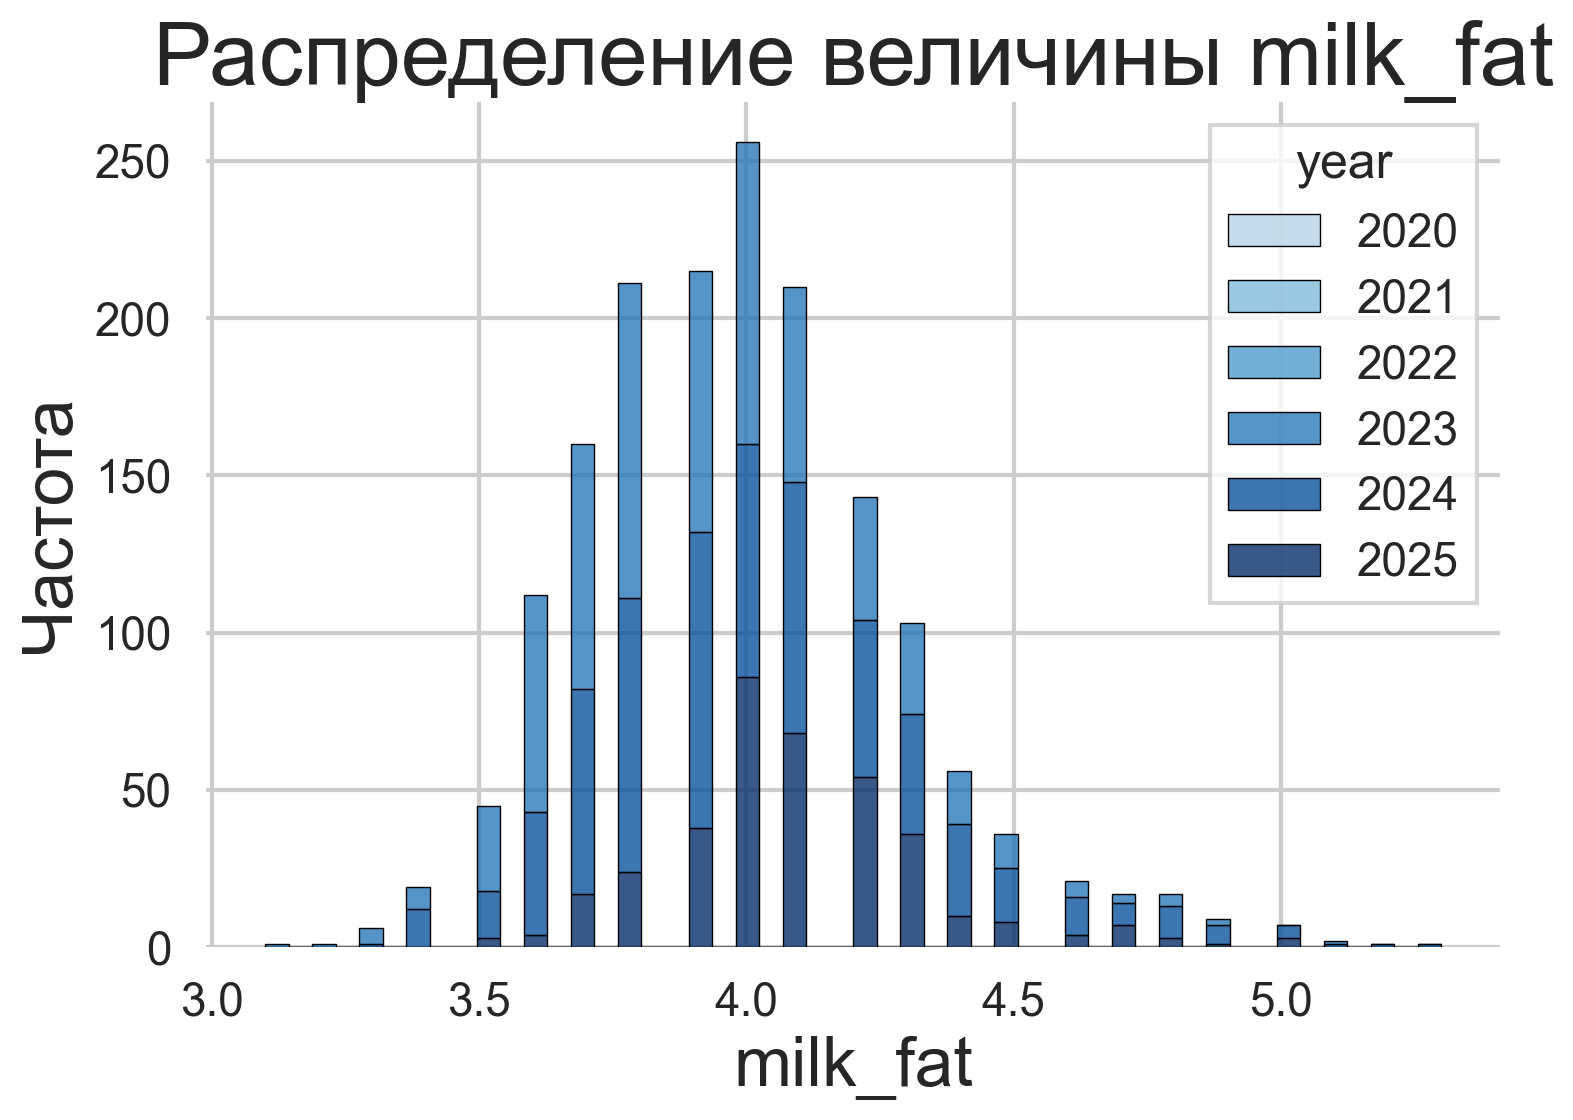

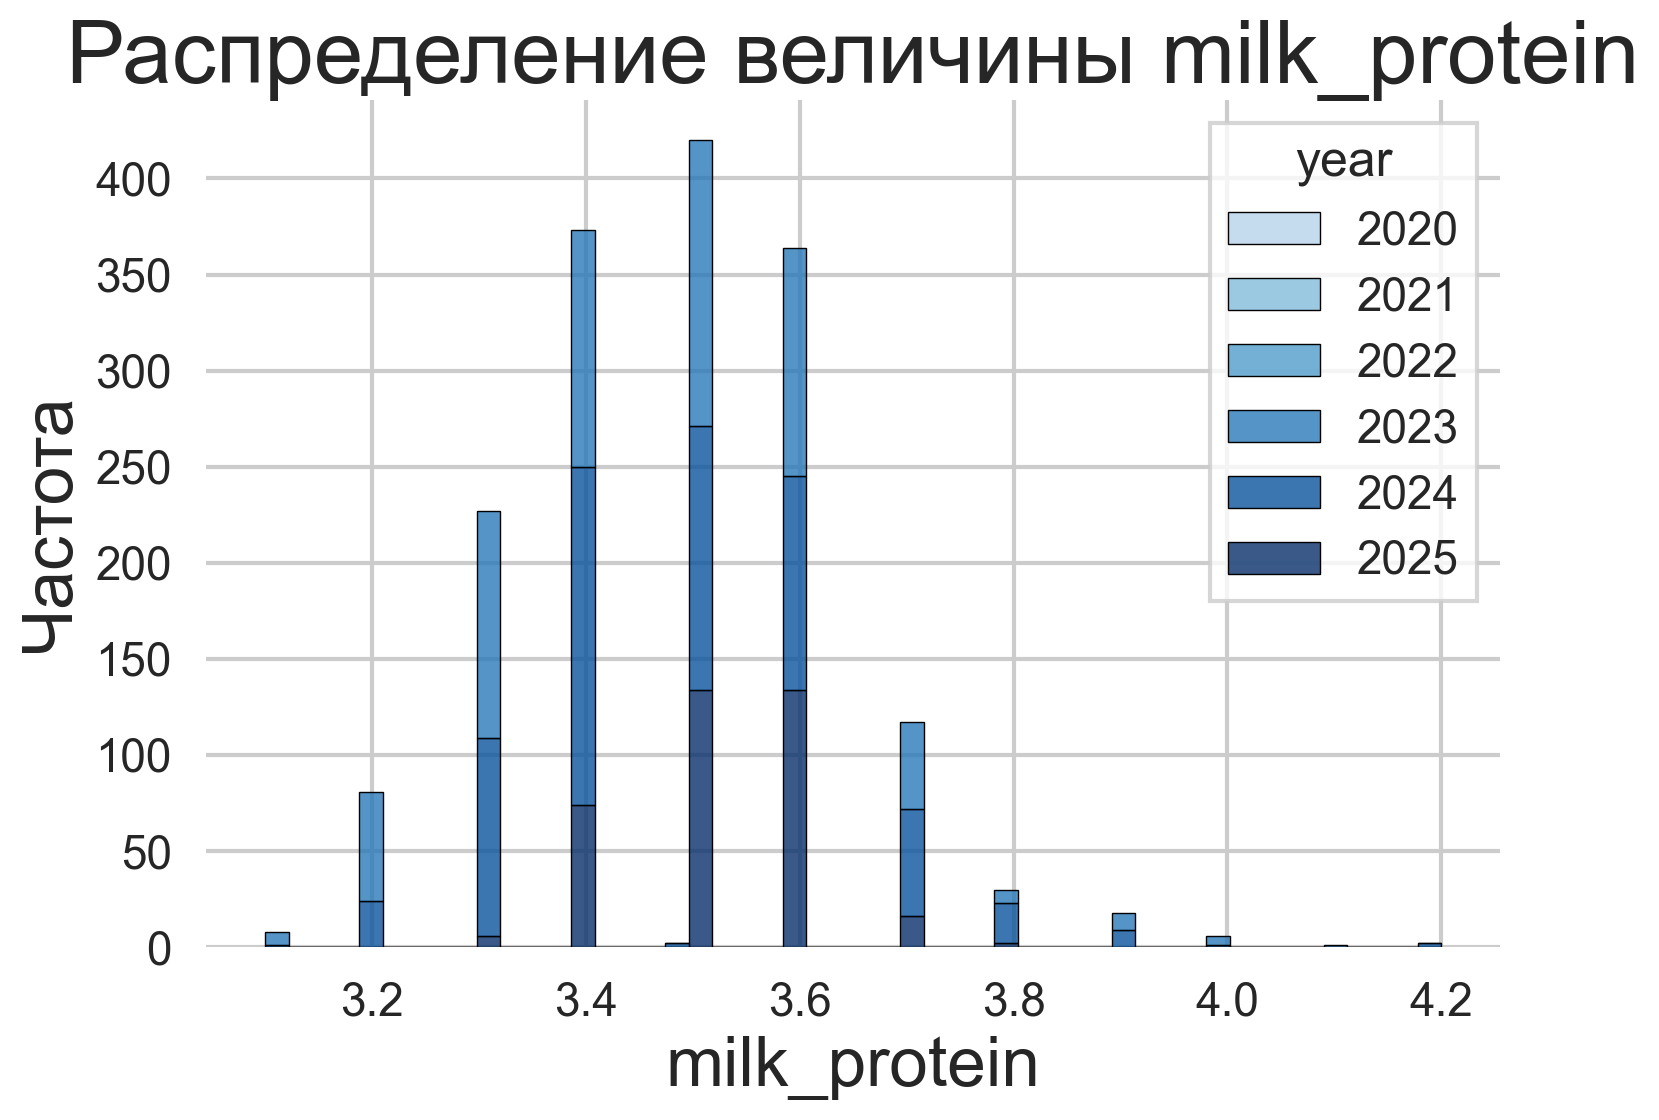

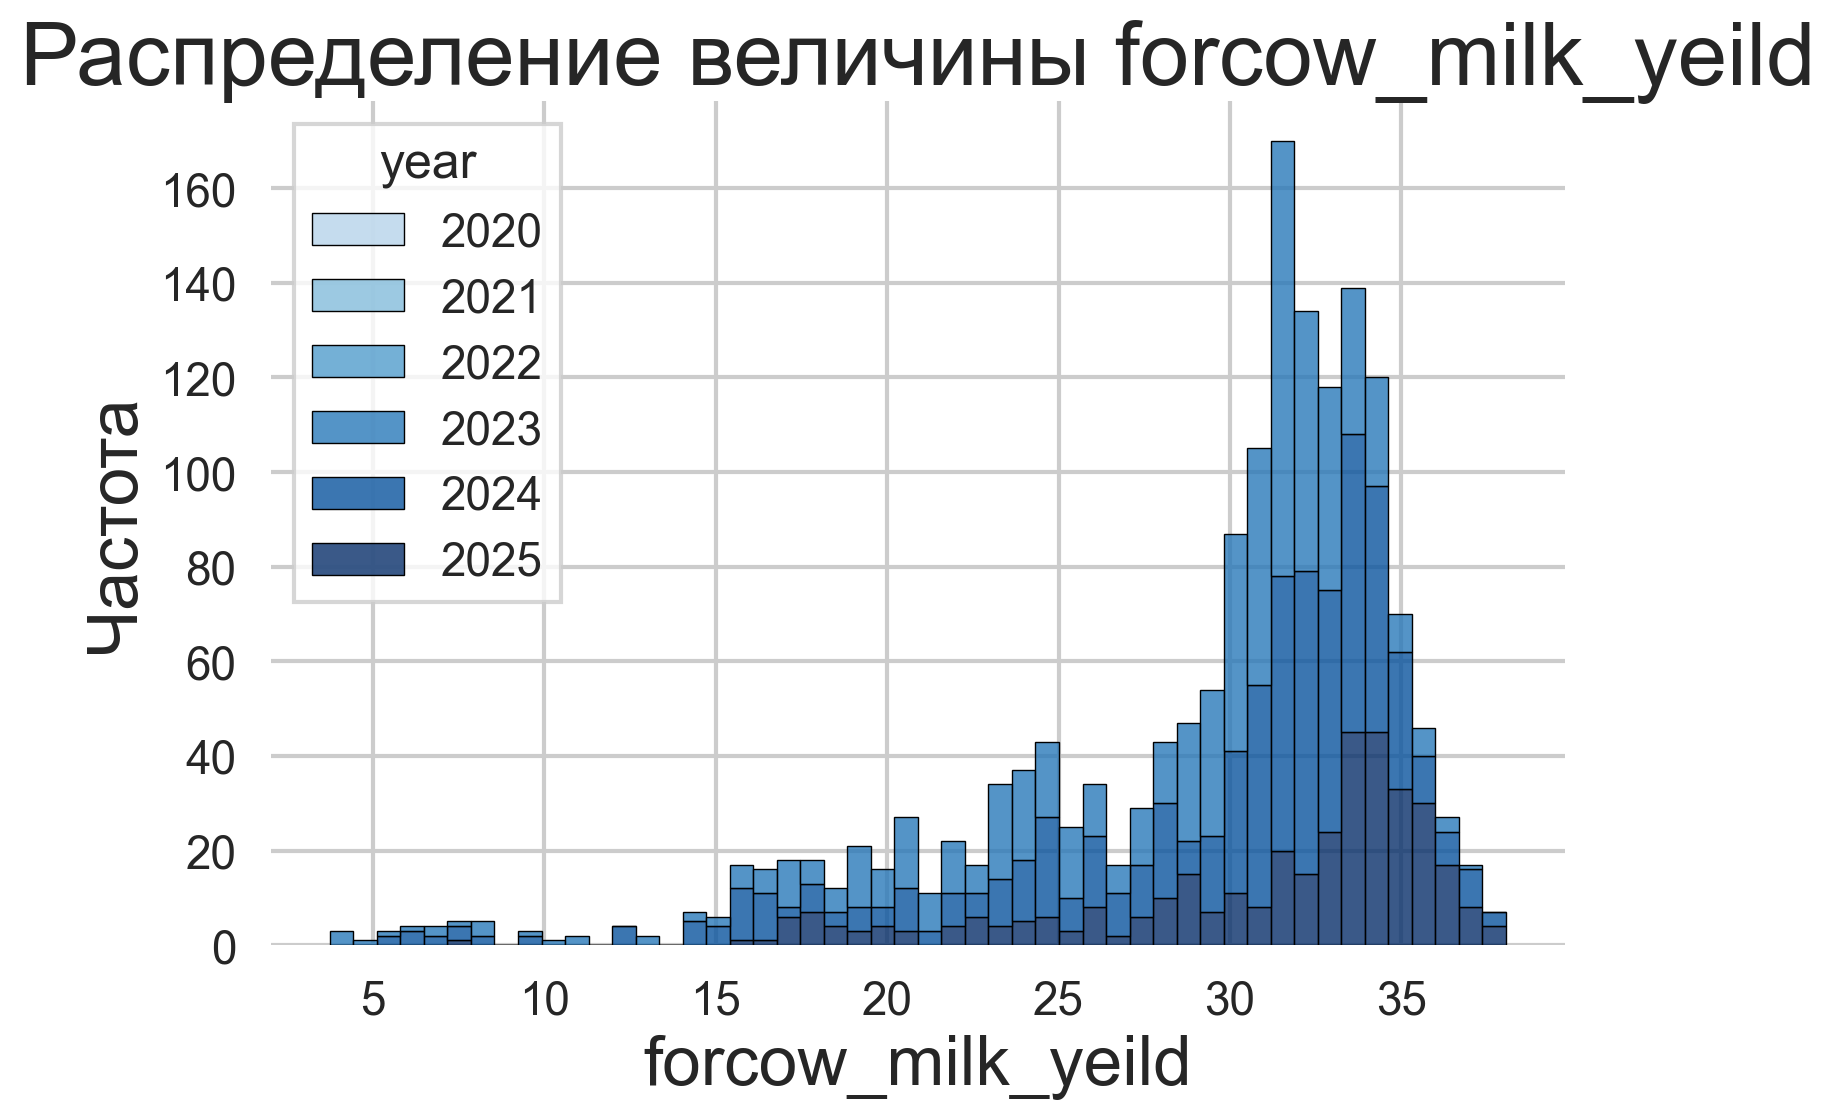

In [44]:
plt.rcParams['figure.figsize'] = (8, 6)
years = sorted(herd_metrics['year'].unique())
cmap = sns.color_palette("Blues", as_cmap=True)
colors = [cmap(0.3 + 0.7 * i / (len(years)-1)) for i in range(len(years))]
for k in ['ls_capacity', 'ls_occupancy', 'milk_cow', 'milk_marketab_prc','milk_fat', 'milk_protein', 'forcow_milk_yeild']:
    sns.histplot(data=herd_metrics,x=k,hue='year',multiple='stack',alpha=0.8, bins=50,palette=colors,edgecolor='black', linewidth=0.5)
    plt.title(f'Распределение величины {k}')
    plt.ylabel('Частота')
    plt.savefig(f"images/{k}.png", dpi=300, bbox_inches='tight')
    plt.show()


In [45]:
herd_metrics.isna().sum()

date                          0
region                        0
prod_farm_name                0
farm_type                     0
farm_name                     0
ls_capacity                 686
ls_occupancy                722
forage_cow                  698
milk_cow                    698
dry_cow                     698
milk_marketab_prc           755
forcow_milk_yeild          2653
forcow_milk_yeild_stand    2653
milk_fat                   2652
milk_protein               2652
somatic_cells               770
bac_contam                  778
cow_retired                 696
cow_lame                    775
cow_mastits                 772
calves                     2823
cow_metrit                 2794
ph_urine_avr               3196
som_cells_next_month        771
year                          0
month                         0
date_month                    0
dtype: int64

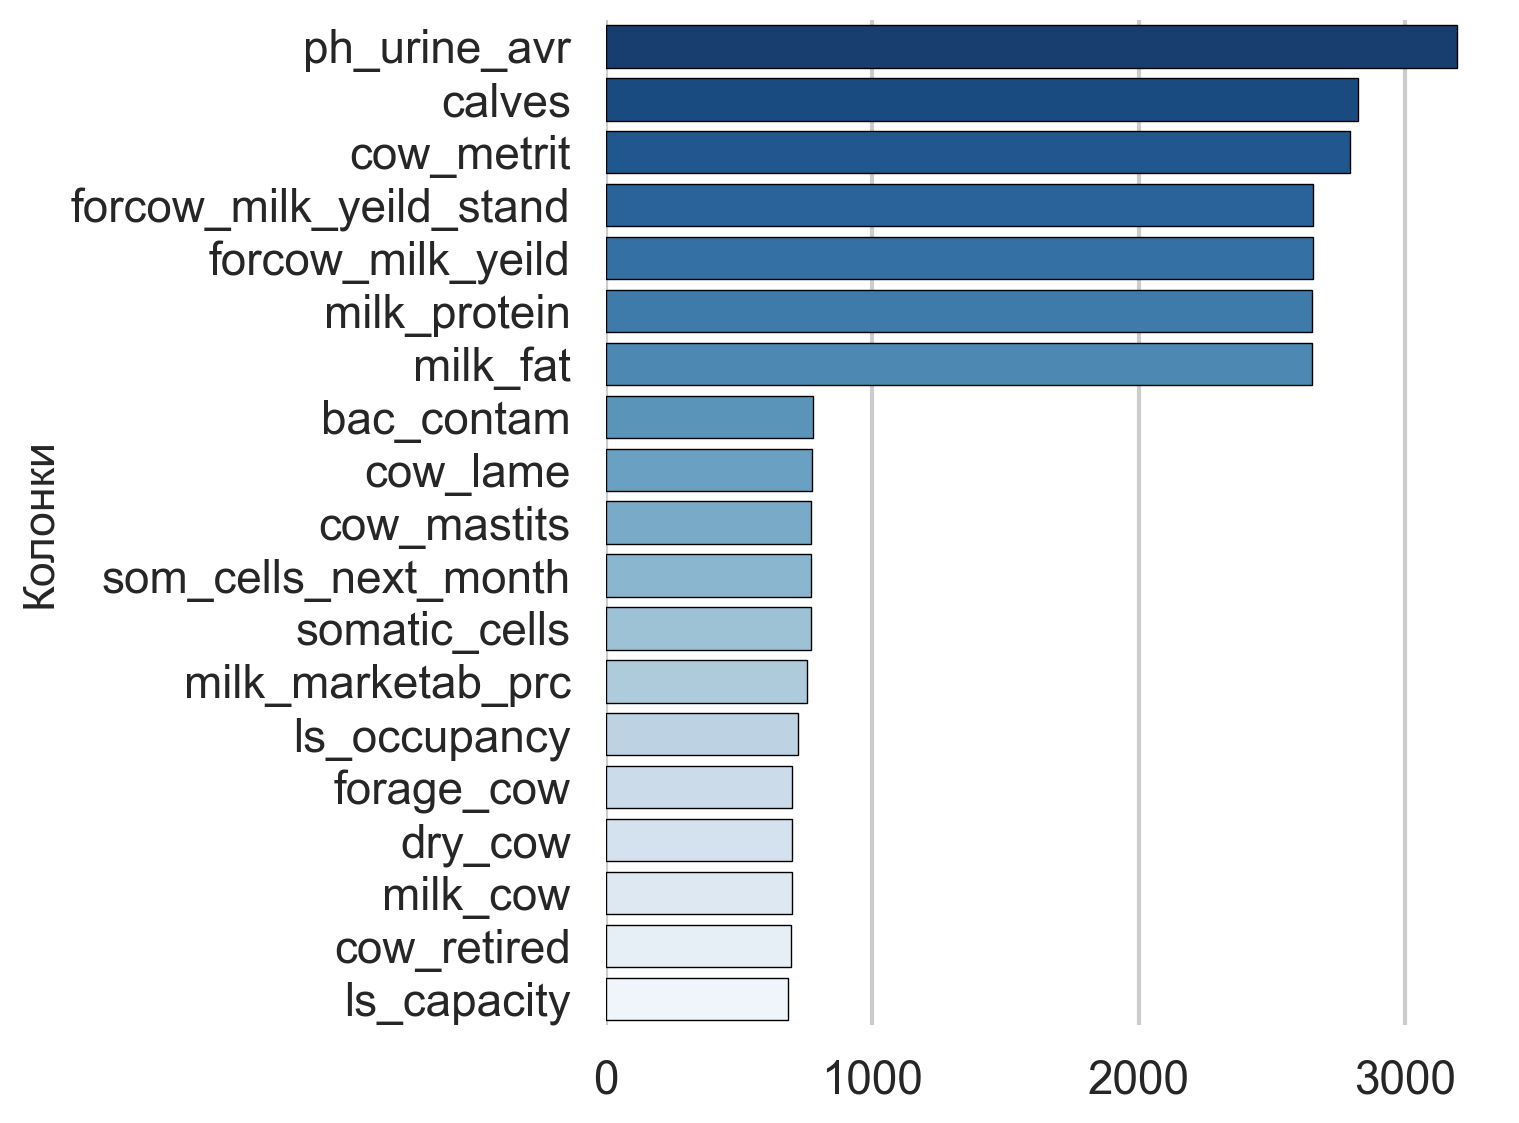

In [46]:
nans = herd_metrics.isna().sum()
nans = nans[nans > 0].sort_values(ascending=False)
sns.barplot(x=nans.values, y=nans.index, palette="Blues_r", edgecolor="black", linewidth=0.5)
plt.ylabel("Колонки", fontsize=16)
plt.savefig("images/nans_herd_metrics.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


In [47]:
production_indicators = dates(production_indicators, 'date')

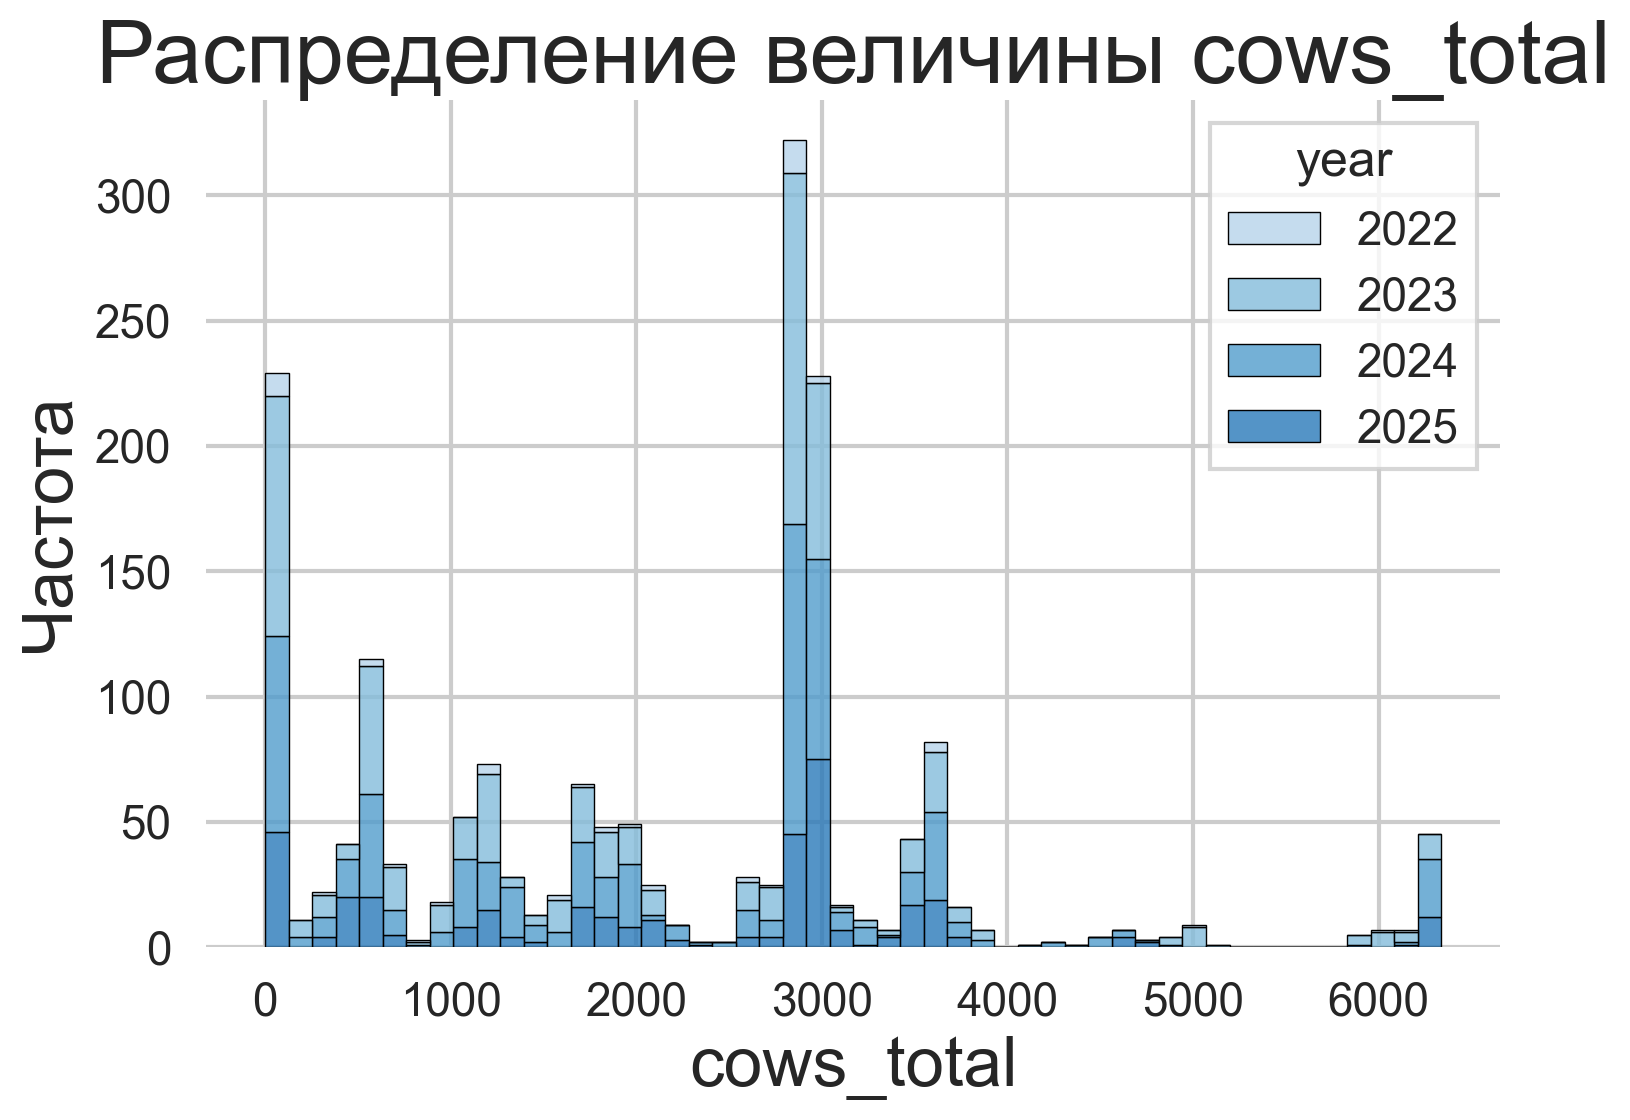

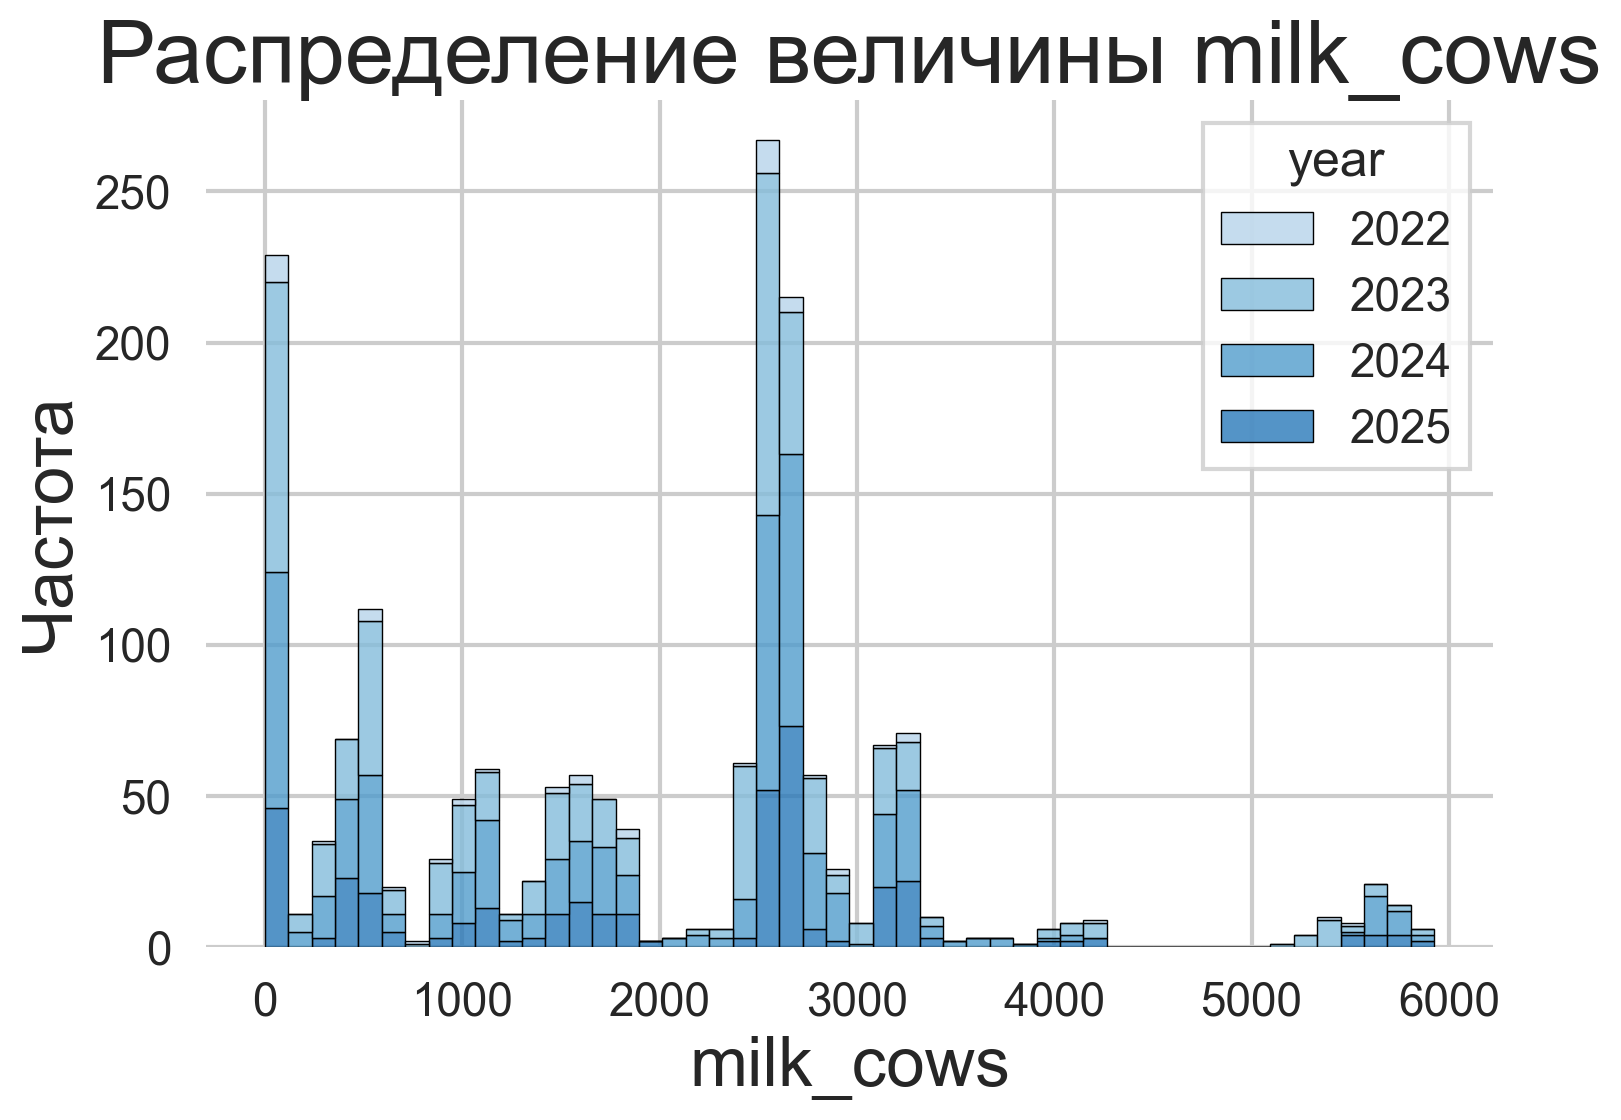

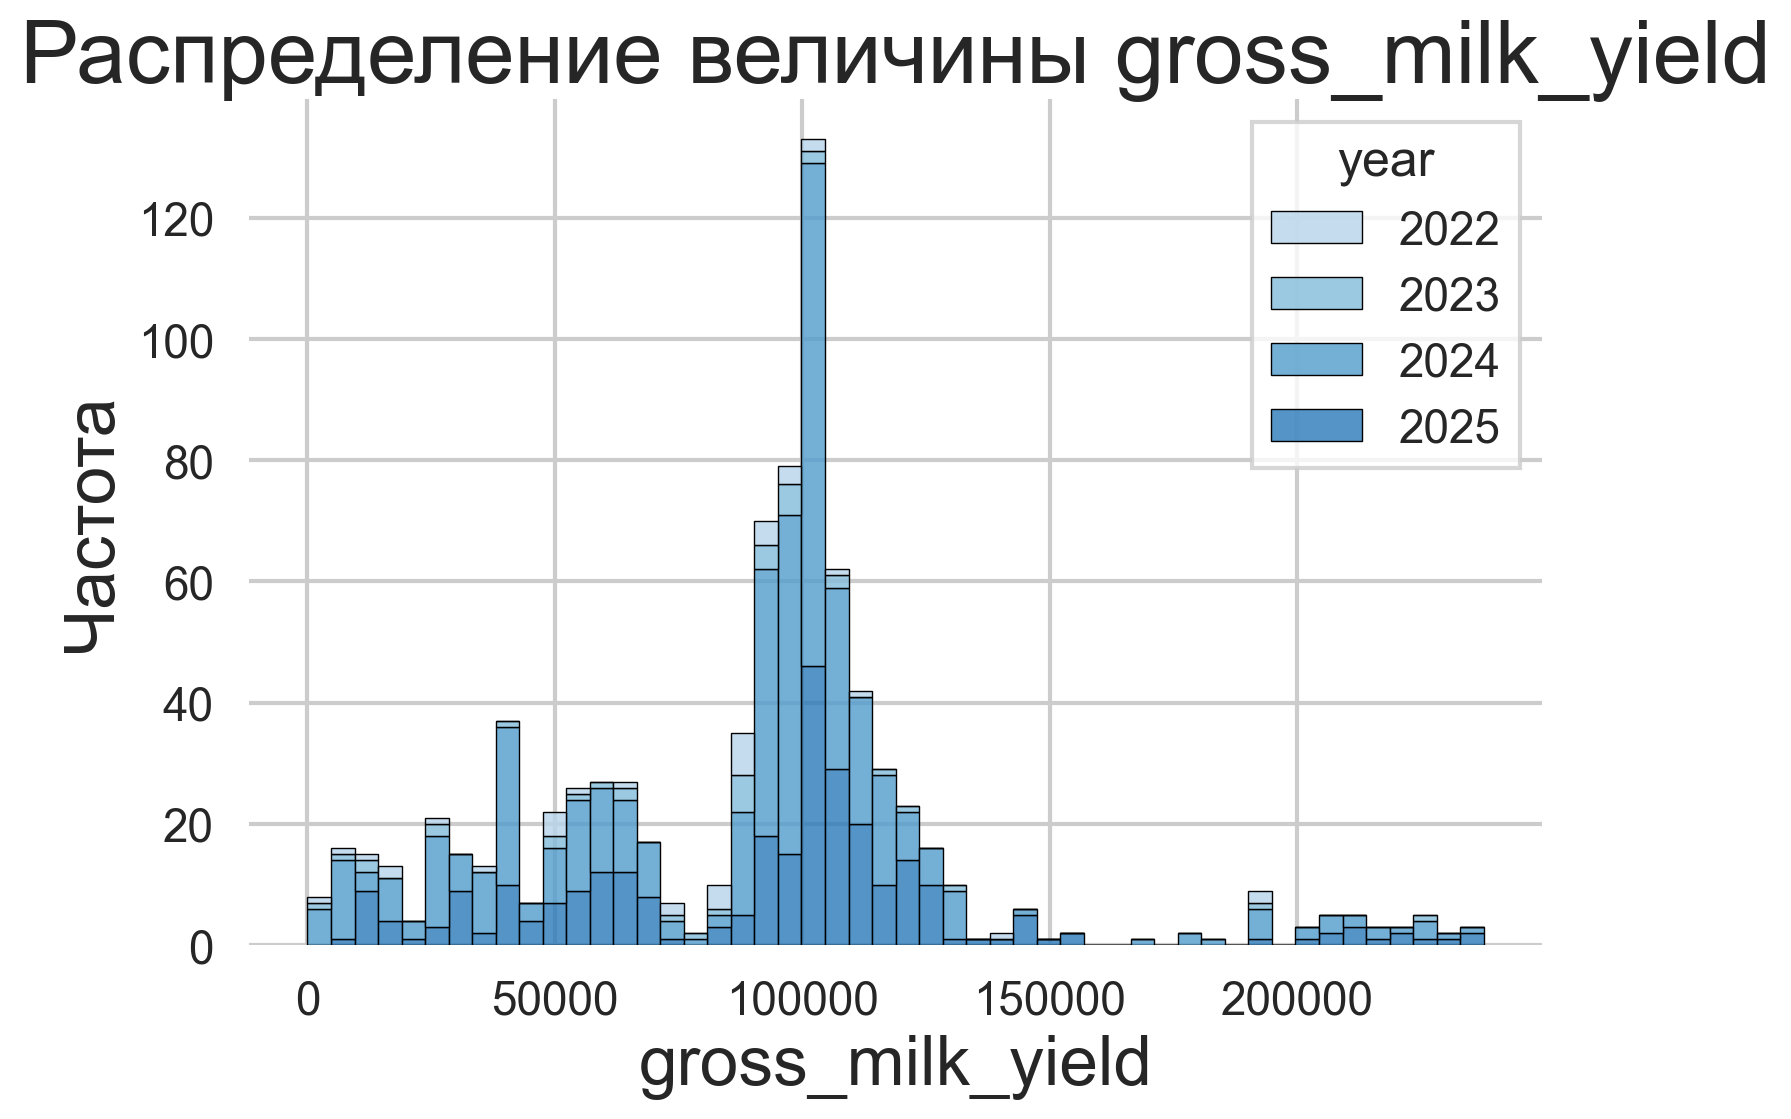

In [48]:
for k in ['cows_total', 'milk_cows', 'gross_milk_yield']:
    sns.histplot(data=production_indicators,x=k,hue='year',multiple='stack',alpha=0.8, bins=50,palette=colors,edgecolor='black', linewidth=0.5)
    plt.title(f'Распределение величины {k}')
    plt.ylabel('Частота')
    plt.savefig(f"images/{k}.png", dpi=300, bbox_inches='tight')
    plt.show()


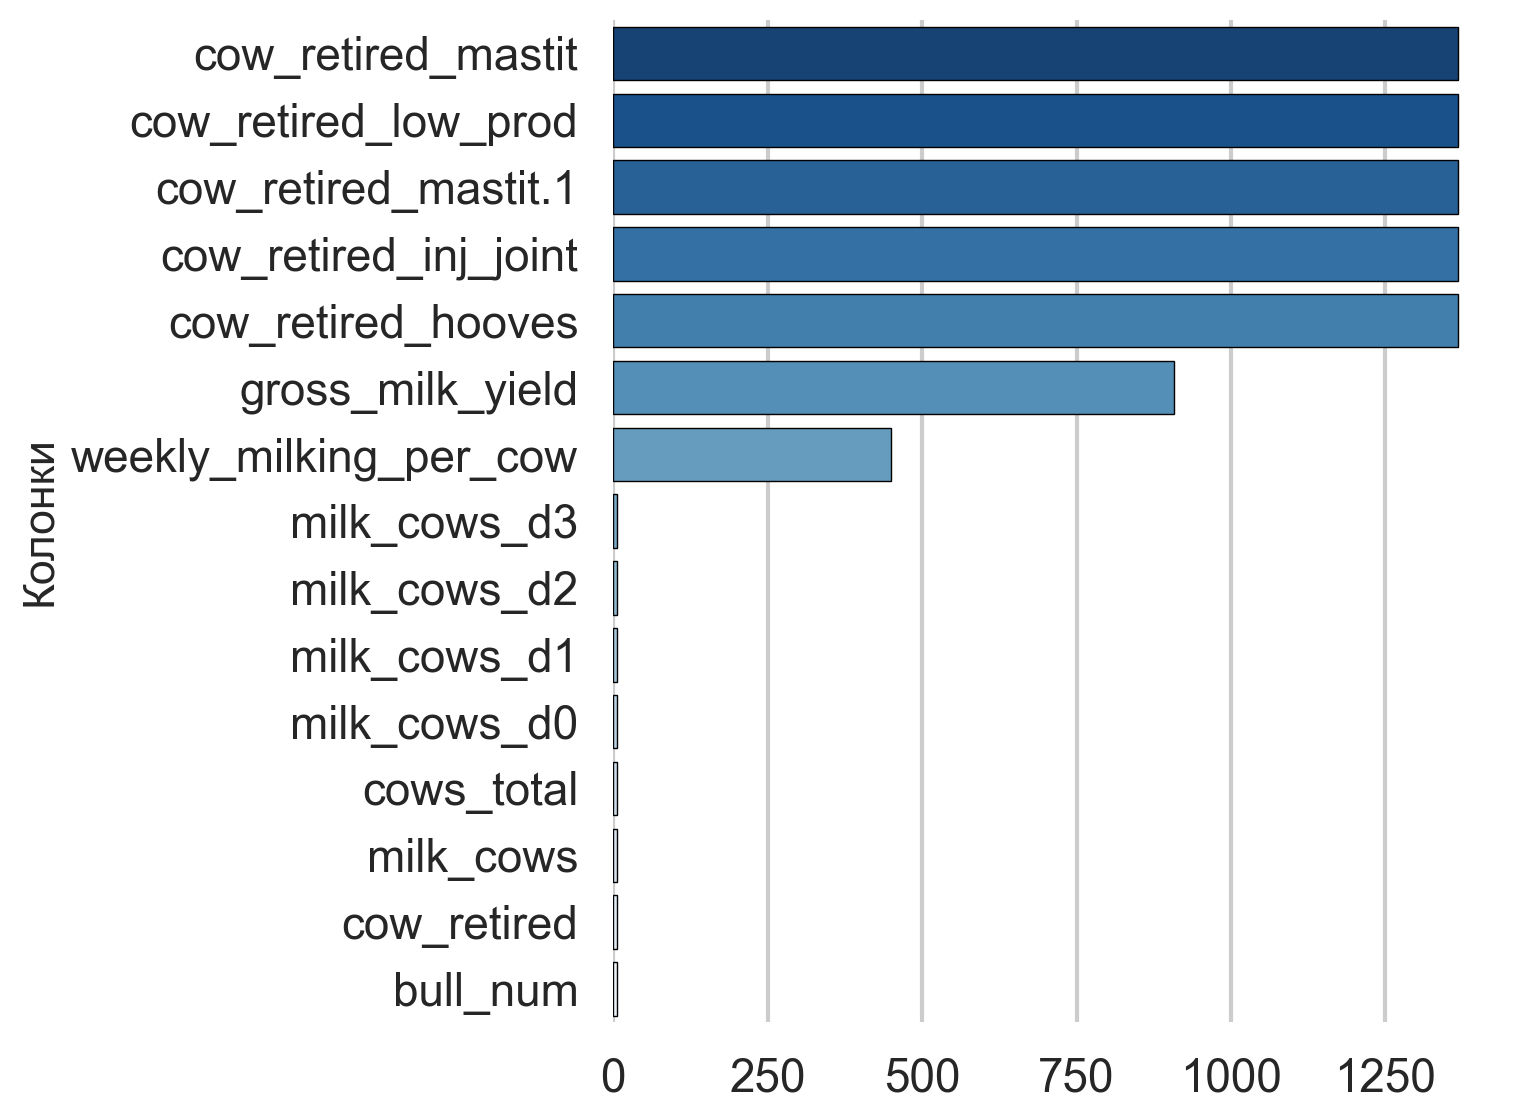

In [49]:
nans = production_indicators.isna().sum()
nans = nans[nans > 0].sort_values(ascending=False)
sns.barplot(x=nans.values, y=nans.index, palette="Blues_r", linewidth=0.5, edgecolor="black")
plt.ylabel('Колонки', fontsize=16)
plt.savefig('images/nans_production_indicators.png', dpi=300, bbox_inches='tight')
plt.show()

In [50]:
nans = production_indicators.isna().sum()
nans

date                         0
region                       0
prod_farm_name               0
farm_type                    0
farm_name                    0
cows_total                   6
milk_cows                    6
milk_cows_d0                 6
milk_cows_d1                 6
milk_cows_d2                 6
milk_cows_d3                 6
weekly_milking_per_cow     449
gross_milk_yield           907
cow_retired                  6
cow_retired_low_prod      1367
cow_retired_hooves        1367
cow_retired_inj_joint     1367
cow_retired_mastit        1367
cow_retired_mastit.1      1367
bull_num                     6
year                         0
month                        0
date_month                   0
dtype: int64

In [51]:
production_indicators[production_indicators['milk_cows'].isna()]

date    region        prod_farm_name farm_type  \
756  2024-01-01  Поволжье  Северная Нива Самара        ЖК   
786  2024-02-01   Воронеж      ЭНА Правый берег       МТФ   
804  2024-02-01     Курск              Защитное       РЖК   
811  2024-02-01  Поволжье  Северная Нива Самара        ЖК   
1656 2025-06-01   Воронеж      ЭНА Правый берег       МТФ   
1710 2025-07-01   Воронеж      ЭНА Правый берег       МТФ   

                farm_name  cows_total  milk_cows  milk_cows_d0  milk_cows_d1  \
756   ЖК Старое Резяпкино         NaN        NaN           NaN           NaN   
786         МТФ Колыбелка         NaN        NaN           NaN           NaN   
804          РЖК Мелехино         NaN        NaN           NaN           NaN   
811   ЖК Старое Резяпкино         NaN        NaN           NaN           NaN   
1656         РМ Колыбелка         NaN        NaN           NaN           NaN   
1710         РМ Колыбелка         NaN        NaN           NaN           NaN   

      milk_cows_d2  milk_cows_d3  weekly_milking_per_cow  gross_milk_yield  \
756            NaN           NaN                     NaN               NaN   
786            NaN           NaN                     NaN               NaN   
804            NaN           NaN                     NaN               NaN   
811            NaN           NaN                     NaN               NaN   
1656           NaN           NaN                     NaN               NaN   
1710           NaN           NaN                     NaN               NaN   

      cow_retired  cow_retired_low_prod  cow_retired_hooves  \
756           NaN                   NaN                 NaN   
786           NaN                   NaN                 NaN   
804           NaN                   NaN                 NaN   
811           NaN                   NaN                 NaN   
1656          NaN                   NaN                 NaN   
1710          NaN                   NaN                 NaN   

      cow_retired_inj_joint  cow_retired_mastit  cow_retired_mastit.1  \
756                     NaN                 NaN                   NaN   
786                     NaN                 NaN                   NaN   
804                     NaN                 NaN                   NaN   
811                     NaN                 NaN                   NaN   
1656                    NaN                 NaN                   NaN   
1710                    NaN                 NaN                   NaN   

      bull_num  year  month date_month  
756        NaN  2024      1 2024-01-01  
786        NaN  2024      2 2024-02-01  
804        NaN  2024      2 2024-02-01  
811        NaN  2024      2 2024-02-01  
1656       NaN  2025      6 2025-06-01  
1710       NaN  2025      7 2025-07-01

In [52]:
herd_metrics[herd_metrics['milk_marketab_prc'] < 40]

date  region            prod_farm_name farm_type      farm_name  \
510 2020-08-01  Сибирь  Сибирская Нива Маслянино        ЖК     ЖК Борково   
544 2020-09-01  Калуга     Калужская Нива Восток        ЖК  ЖК Болдасовка   

     ls_capacity  ls_occupancy  forage_cow  milk_cow  dry_cow  \
510       2500.0     55.400000      1385.0     894.0    491.0   
544       1800.0     57.333333      1032.0     281.0    751.0   

     milk_marketab_prc  forcow_milk_yeild  forcow_milk_yeild_stand  milk_fat  \
510                0.0                NaN                      NaN       NaN   
544               30.0                NaN                      NaN       NaN   

     milk_protein  somatic_cells  bac_contam  cow_retired  cow_lame  \
510           NaN            NaN         NaN        788.0     127.0   
544           NaN          217.0        70.0         39.0     100.0   

     cow_mastits  calves  cow_metrit  ph_urine_avr  som_cells_next_month  \
510       1254.0     NaN         NaN           NaN                 230.0   
544         13.0     NaN         NaN           NaN                 227.0   

     year  month date_month  
510  2020      8 2020-08-01  
544  2020      9 2020-09-01

<Axes: xlabel='milk_marketab_prc'>

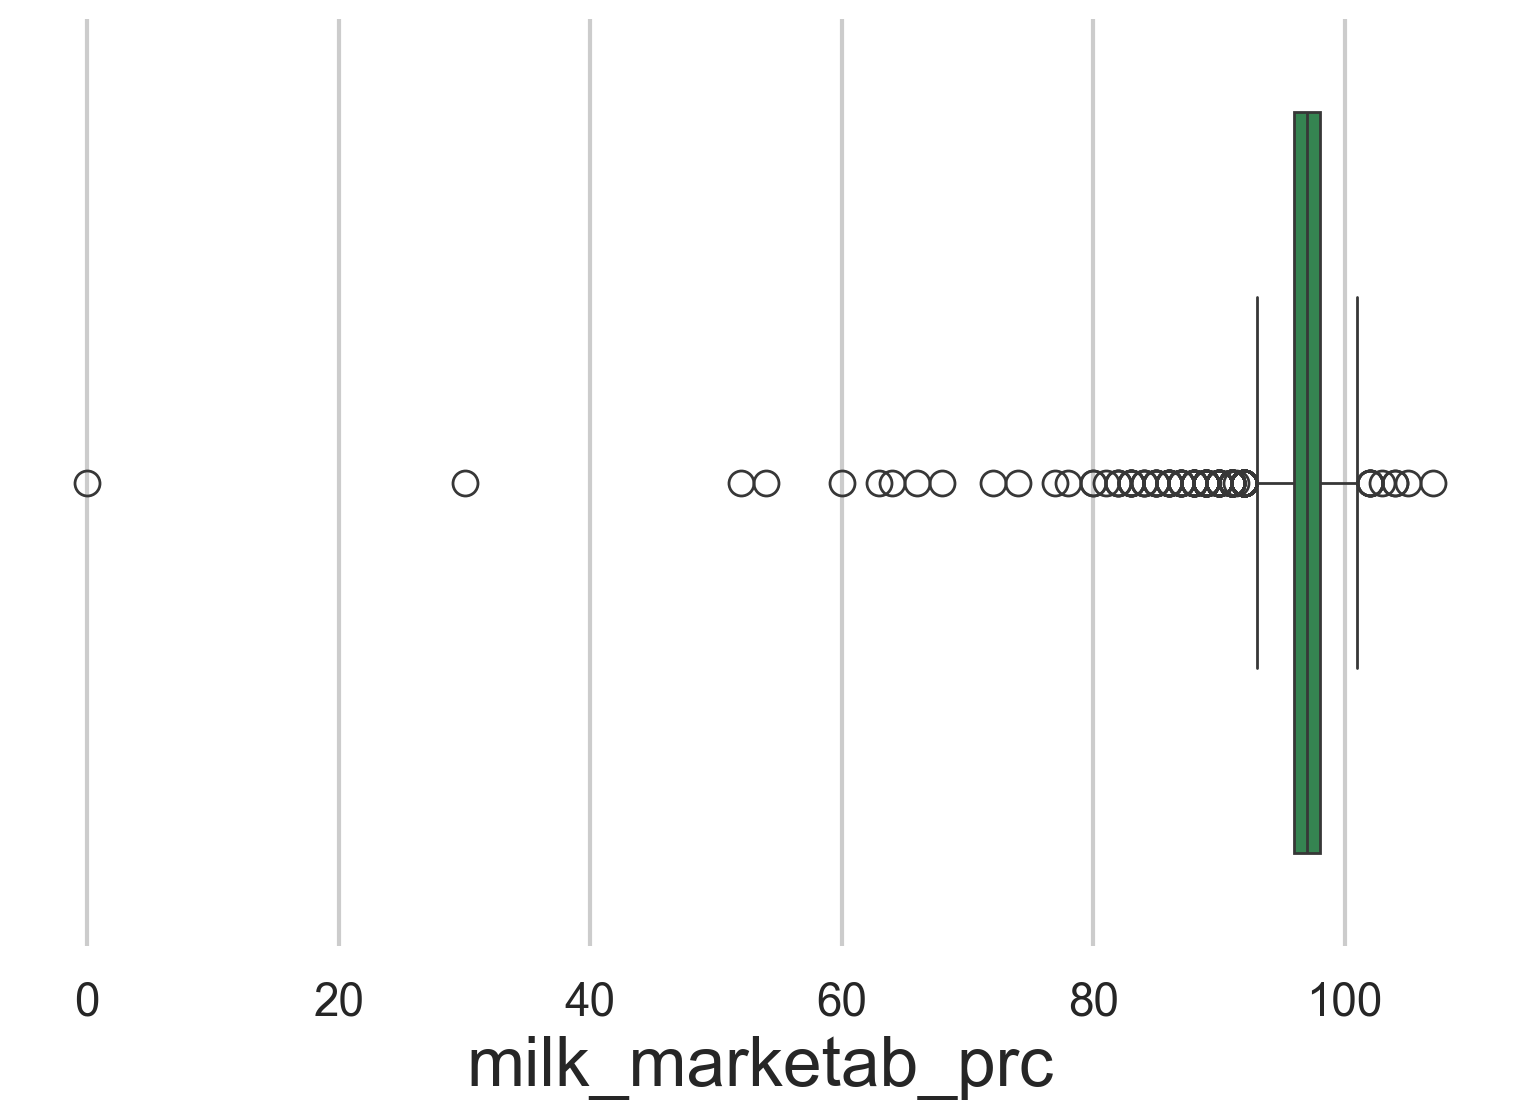

In [53]:
sns.boxplot(data=herd_metrics, x='milk_marketab_prc')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411365 entries, 0 to 16411364
Data columns (total 22 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   FeedingTaskID                object 
 1   Date                         object 
 2   FarmName                     object 
 3   FeedNumber                   int64  
 4   SectionID                    int64  
 5   PhysiologicalGroupID         int64  
 6   PhysiologicalGroupName       object 
 7   PhysiologicalGroupHeadCount  int64  
 8   Appetite                     float64
 9   RationName                   object 
 10  RationPart                   float64
 11  TotalWeight_kg               float64
 12  CompletedAt                  object 
 13  year                         object 
 14  IngredientID                 float64
 15  IngredientName               object 
 16  IngredientType               object 
 17  PhysicalWeight_kg            float64
 18  norm_ingr_name               object 
 19

In [55]:
production_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1747 non-null   datetime64[ns]
 1   region                  1747 non-null   object        
 2   prod_farm_name          1747 non-null   object        
 3   farm_type               1747 non-null   object        
 4   farm_name               1747 non-null   object        
 5   cows_total              1741 non-null   float64       
 6   milk_cows               1741 non-null   float64       
 7   milk_cows_d0            1741 non-null   float64       
 8   milk_cows_d1            1741 non-null   float64       
 9   milk_cows_d2            1741 non-null   float64       
 10  milk_cows_d3            1741 non-null   float64       
 11  weekly_milking_per_cow  1298 non-null   float64       
 12  gross_milk_yield        840 non-null    float64 

In [56]:
df = pd.read_pickle("feeding_and_details.pkl")

In [57]:
df.rename(columns={"Date": "date", "FarmName": "farm_name"}, inplace=True)

In [58]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [59]:
merged = df.merge(production_indicators, on=['date', 'farm_name'], how='right')

<Axes: xlabel='weekly_milking_per_cow', ylabel='PhysicalWeight_kg'>

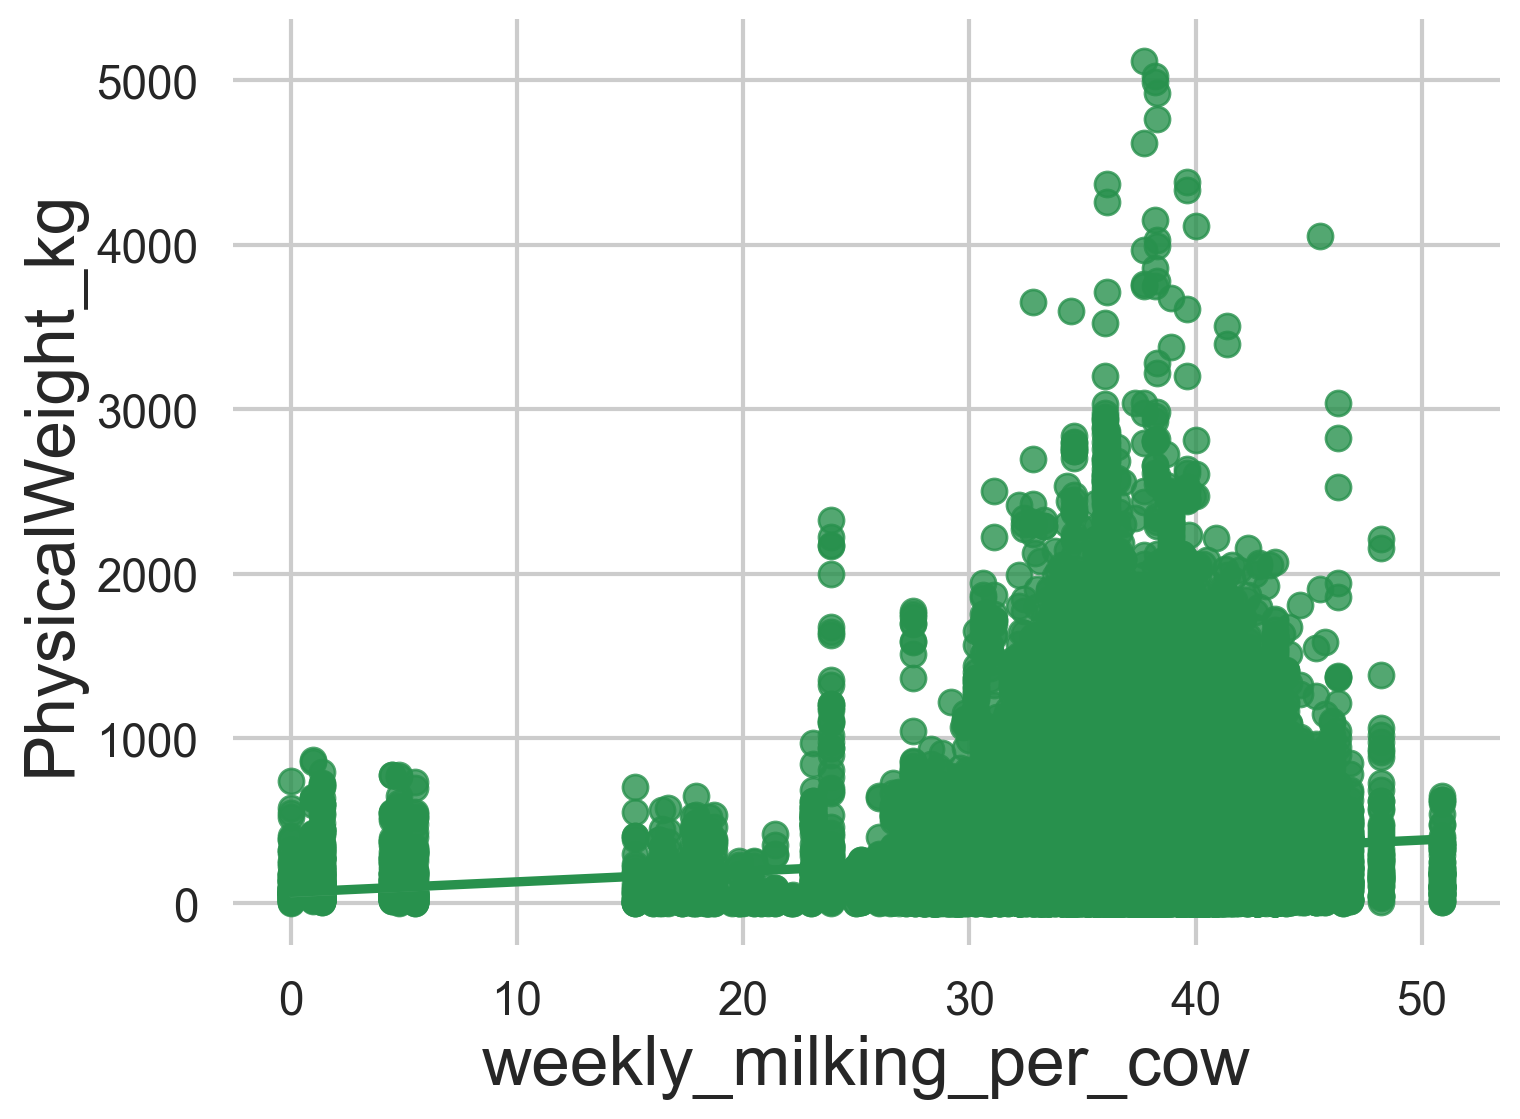

In [60]:
energys = merged[merged['ingredient_group'] == 'energy']
sns.regplot(data=energys, y='PhysicalWeight_kg', x='weekly_milking_per_cow')

In [61]:
gb = df.groupby('ingredient_group')['PhysicalWeight_kg'].mean().reset_index()
gb

ingredient_group  PhysicalWeight_kg
0          additive          20.435693
1         byproduct         314.968190
2            energy         296.410840
3               fat          26.437185
4            forage         981.669632
5       mineral_vit          11.283893
6             other         627.732083
7            premix          25.558651
8      premix_blend         391.172681
9           protein         210.749103
10            water         644.067346

<Axes: xlabel='PhysicalWeight_kg', ylabel='weekly_milking_per_cow'>

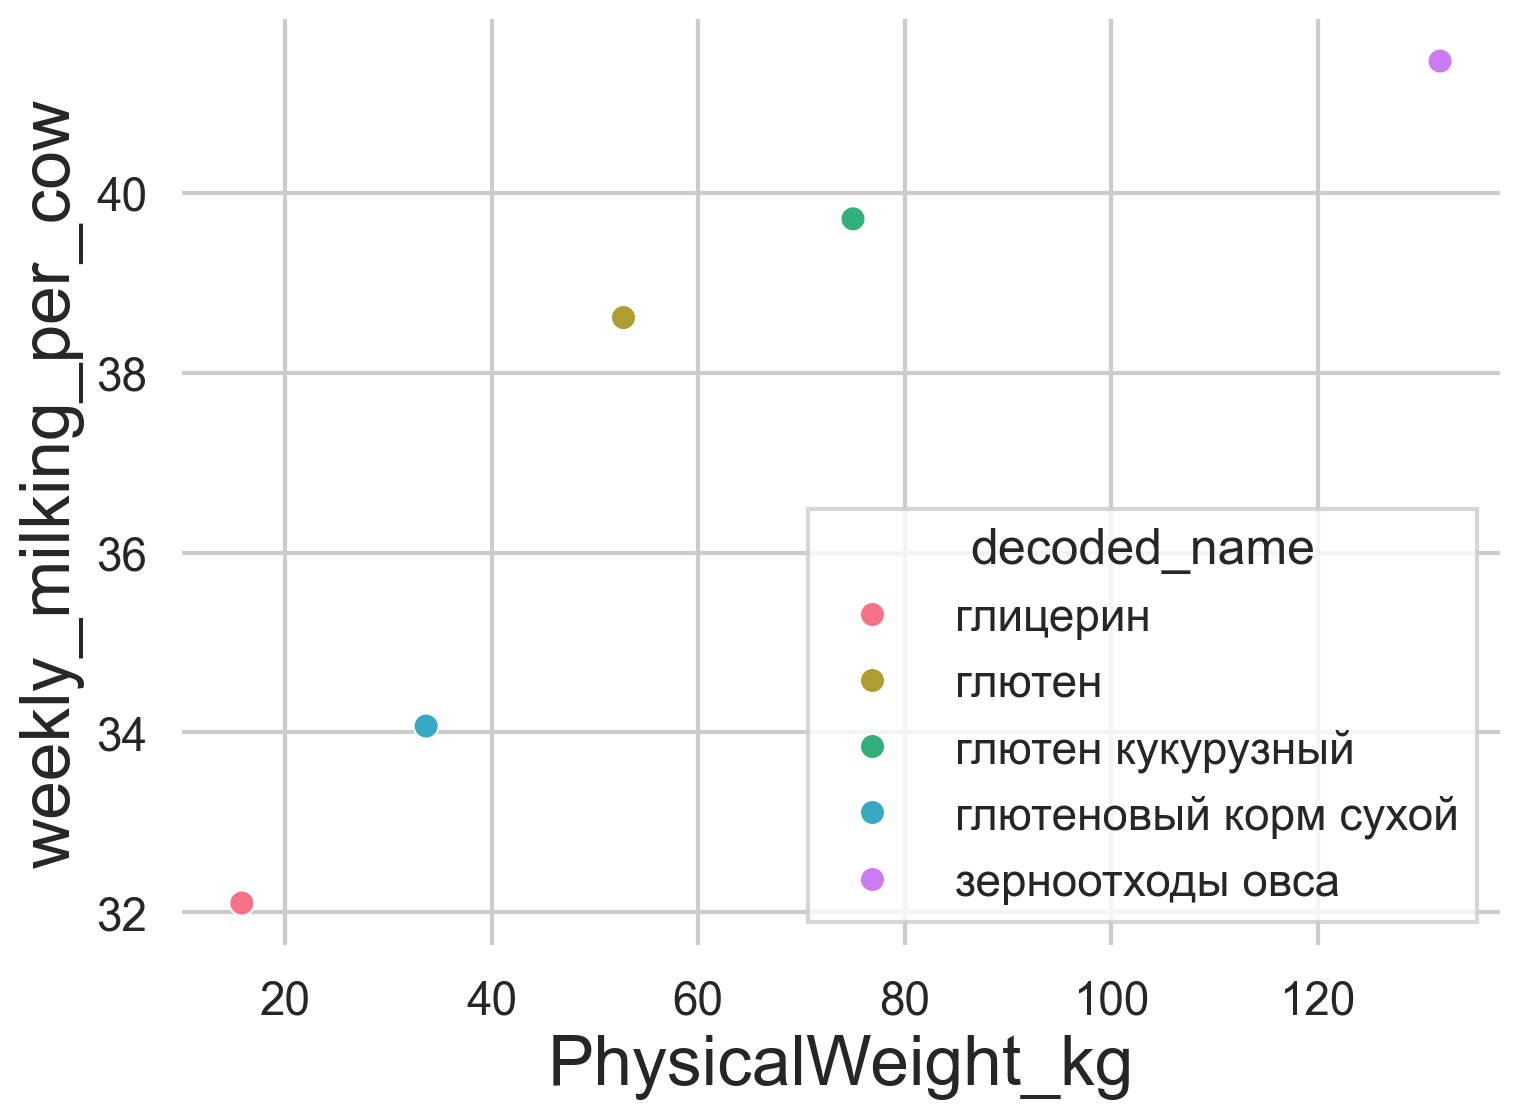

In [62]:
gb = energys.groupby('decoded_name')[['PhysicalWeight_kg', 'weekly_milking_per_cow']].mean()
sns.scatterplot(gb.head(5), x='PhysicalWeight_kg', y='weekly_milking_per_cow', hue='decoded_name')

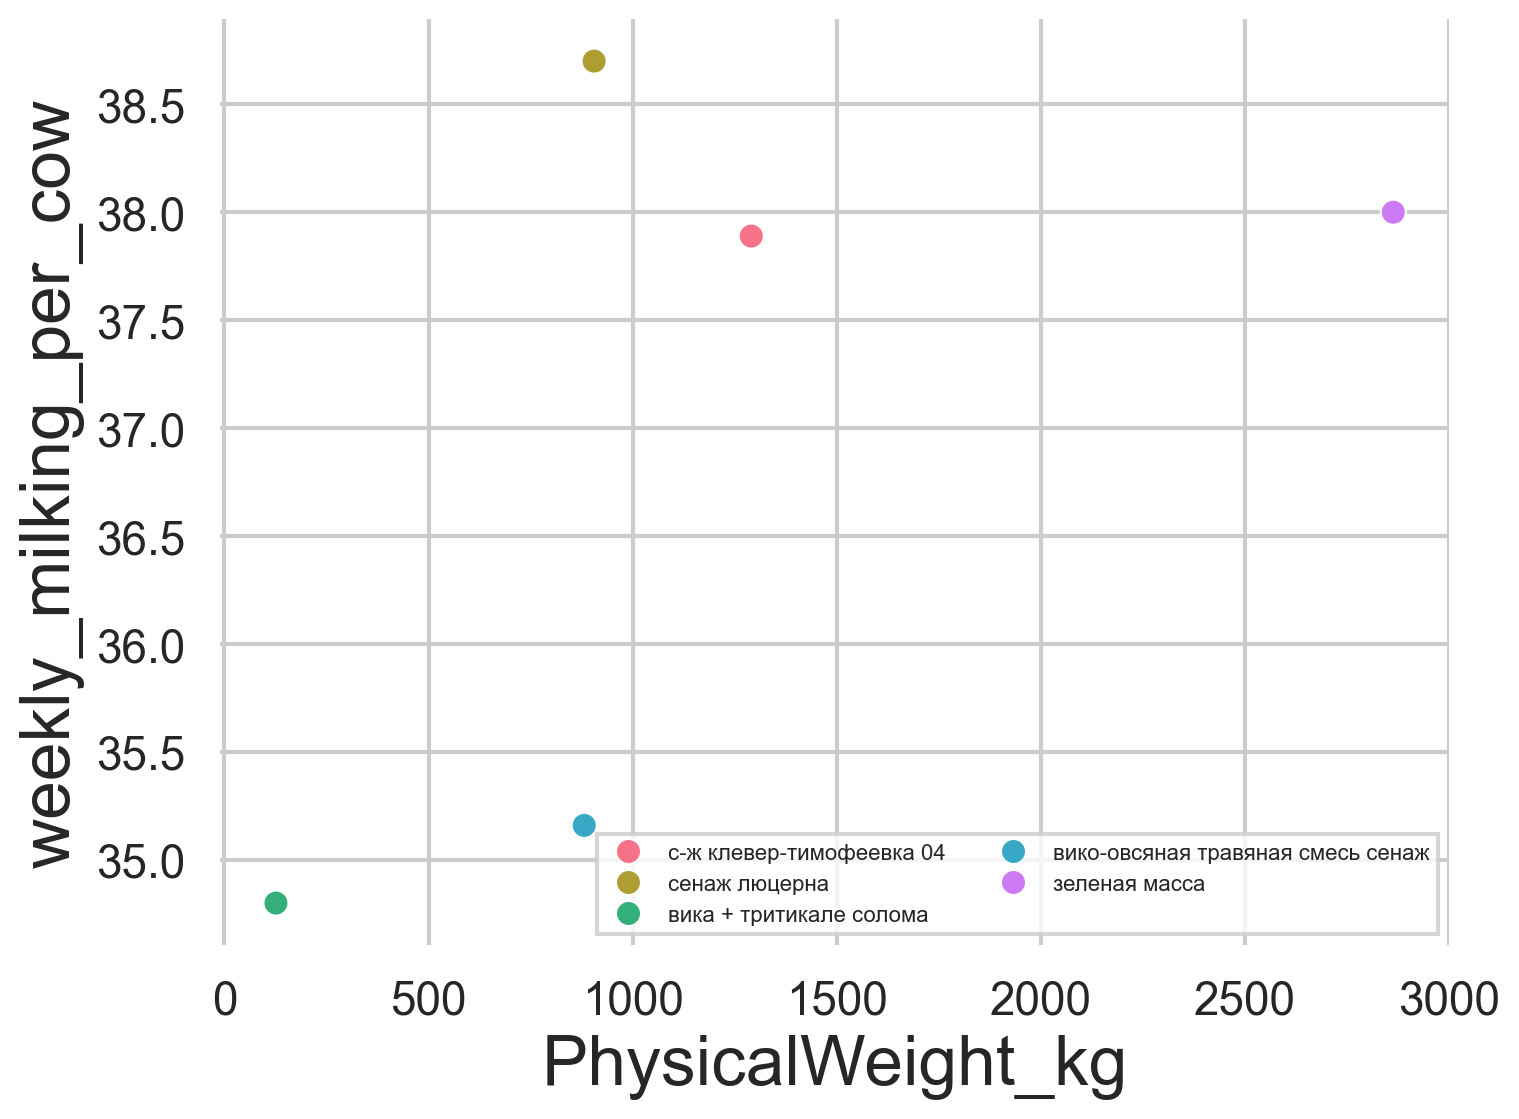

In [63]:
gb = merged[merged['ingredient_group'] == 'forage'].groupby('decoded_name')[['PhysicalWeight_kg', 'weekly_milking_per_cow']].mean()
sns.scatterplot(gb.head(5), x='PhysicalWeight_kg', y='weekly_milking_per_cow', hue='decoded_name')
plt.legend(fontsize=8, ncol=2, loc='lower right')

In [64]:
merged.ingredient_group.unique()

array(['forage', 'protein', 'energy', 'premix_blend', 'byproduct',
       'water', 'mineral_vit', 'premix', 'additive', nan, 'fat', 'other'],
      dtype=object)

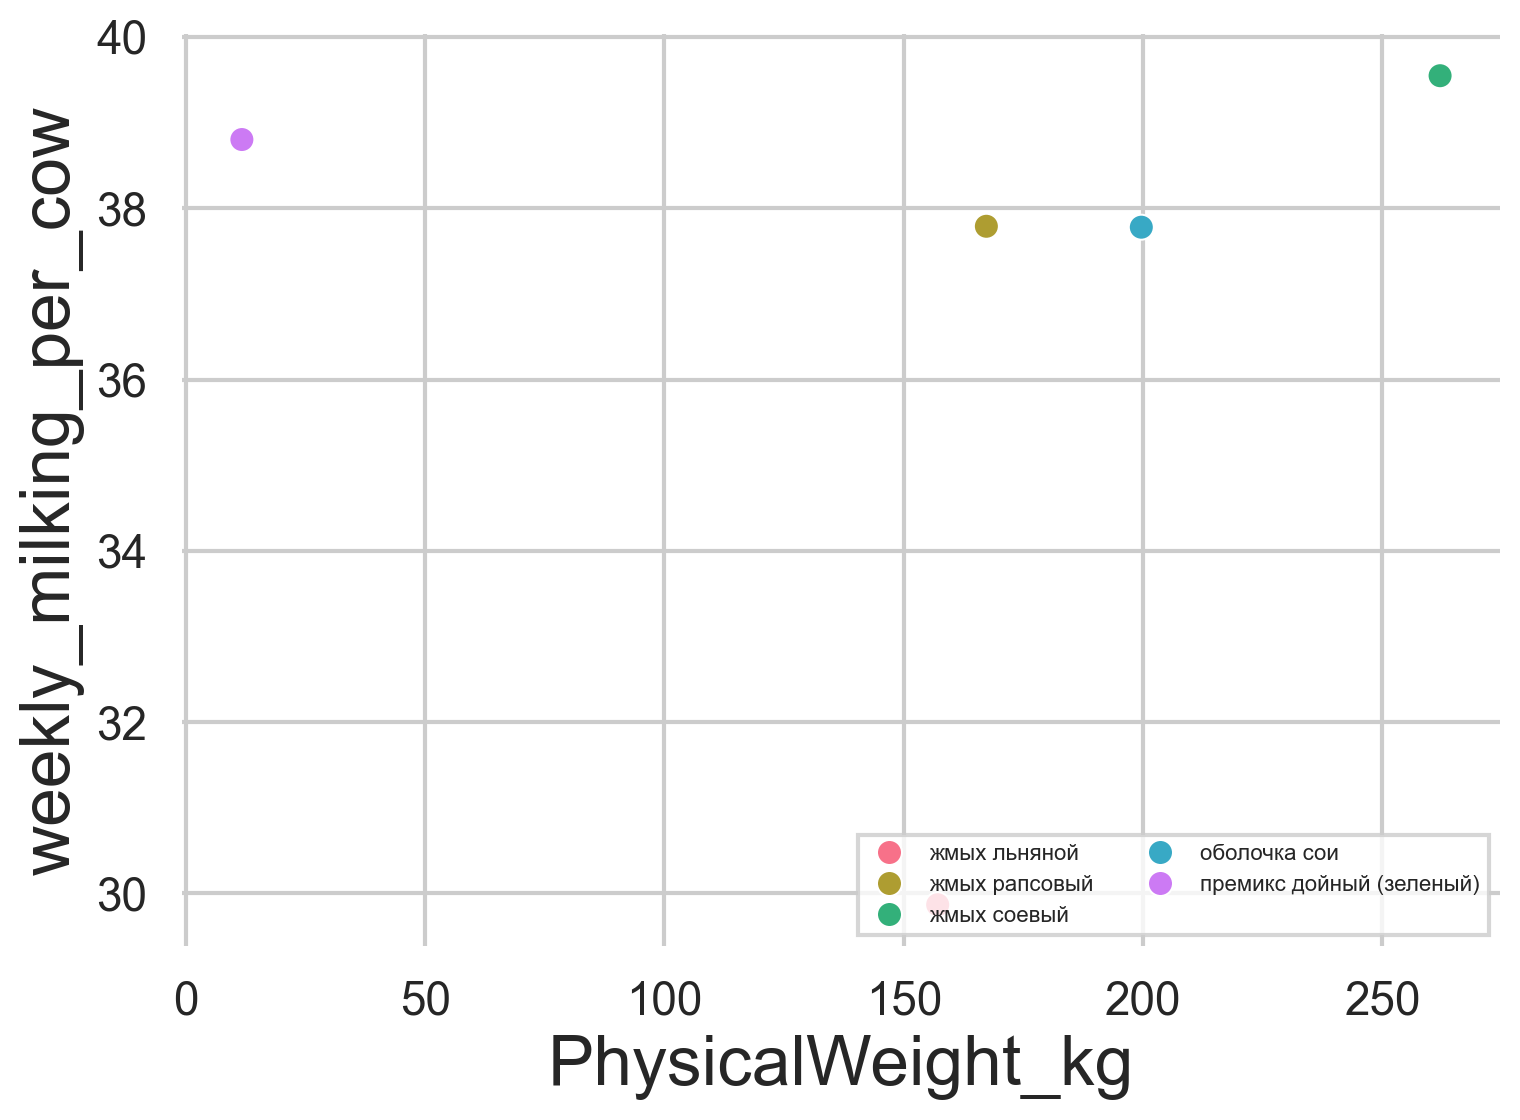

In [65]:
gb = merged[merged['ingredient_group'] == 'protein'].groupby('decoded_name')[['PhysicalWeight_kg', 'weekly_milking_per_cow']].mean()
sns.scatterplot(gb.head(5), x='PhysicalWeight_kg', y='weekly_milking_per_cow', hue='decoded_name')
plt.legend(fontsize=8, ncol=2, loc='lower right')

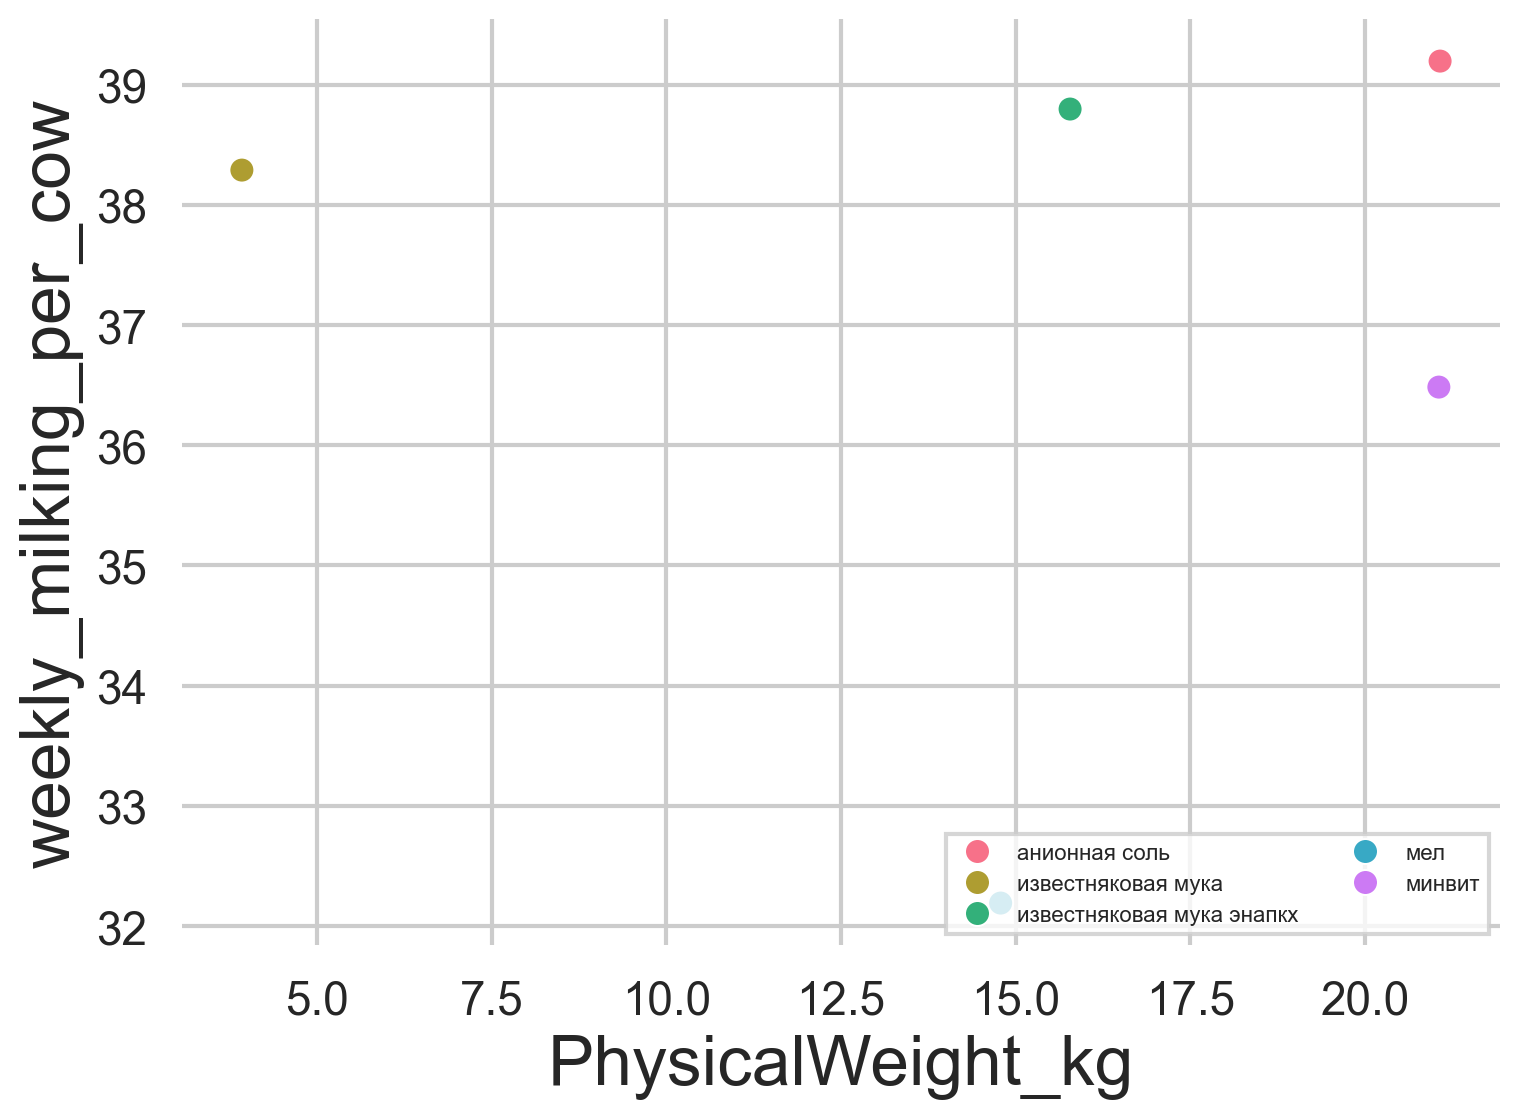

In [66]:
gb = merged[merged['ingredient_group'] == 'mineral_vit'].groupby('decoded_name')[['PhysicalWeight_kg', 'weekly_milking_per_cow']].mean()
sns.scatterplot(gb.head(5), x='PhysicalWeight_kg', y='weekly_milking_per_cow', hue='decoded_name')
plt.legend(fontsize=8, ncol=2, loc='lower right')

In [67]:
feeding_and_details = pd.read_pickle('feeding_and_details.pkl')

In [68]:
feeding_and_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411365 entries, 0 to 16411364
Data columns (total 22 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   FeedingTaskID                object 
 1   Date                         object 
 2   FarmName                     object 
 3   FeedNumber                   int64  
 4   SectionID                    int64  
 5   PhysiologicalGroupID         int64  
 6   PhysiologicalGroupName       object 
 7   PhysiologicalGroupHeadCount  int64  
 8   Appetite                     float64
 9   RationName                   object 
 10  RationPart                   float64
 11  TotalWeight_kg               float64
 12  CompletedAt                  object 
 13  year                         object 
 14  IngredientID                 float64
 15  IngredientName               object 
 16  IngredientType               object 
 17  PhysicalWeight_kg            float64
 18  norm_ingr_name               object 
 19

In [69]:
gb = feeding_and_details[feeding_and_details['IngredientType'] == 'Medication'].groupby('Appetite')['PhysicalWeight_kg'].mean().reset_index()
gb

Appetite  PhysicalWeight_kg
0        0.5           3.413092
1        0.6           1.973684
2        0.7           3.449065
3        0.8           1.287824
4        0.9           4.338469
5        1.0           6.386823
6        1.1           6.276743
7        1.2           8.916874
8        1.3          14.296955
9        1.4          17.733282
10       1.5           3.984152

<Axes: xlabel='Appetite', ylabel='PhysicalWeight_kg'>

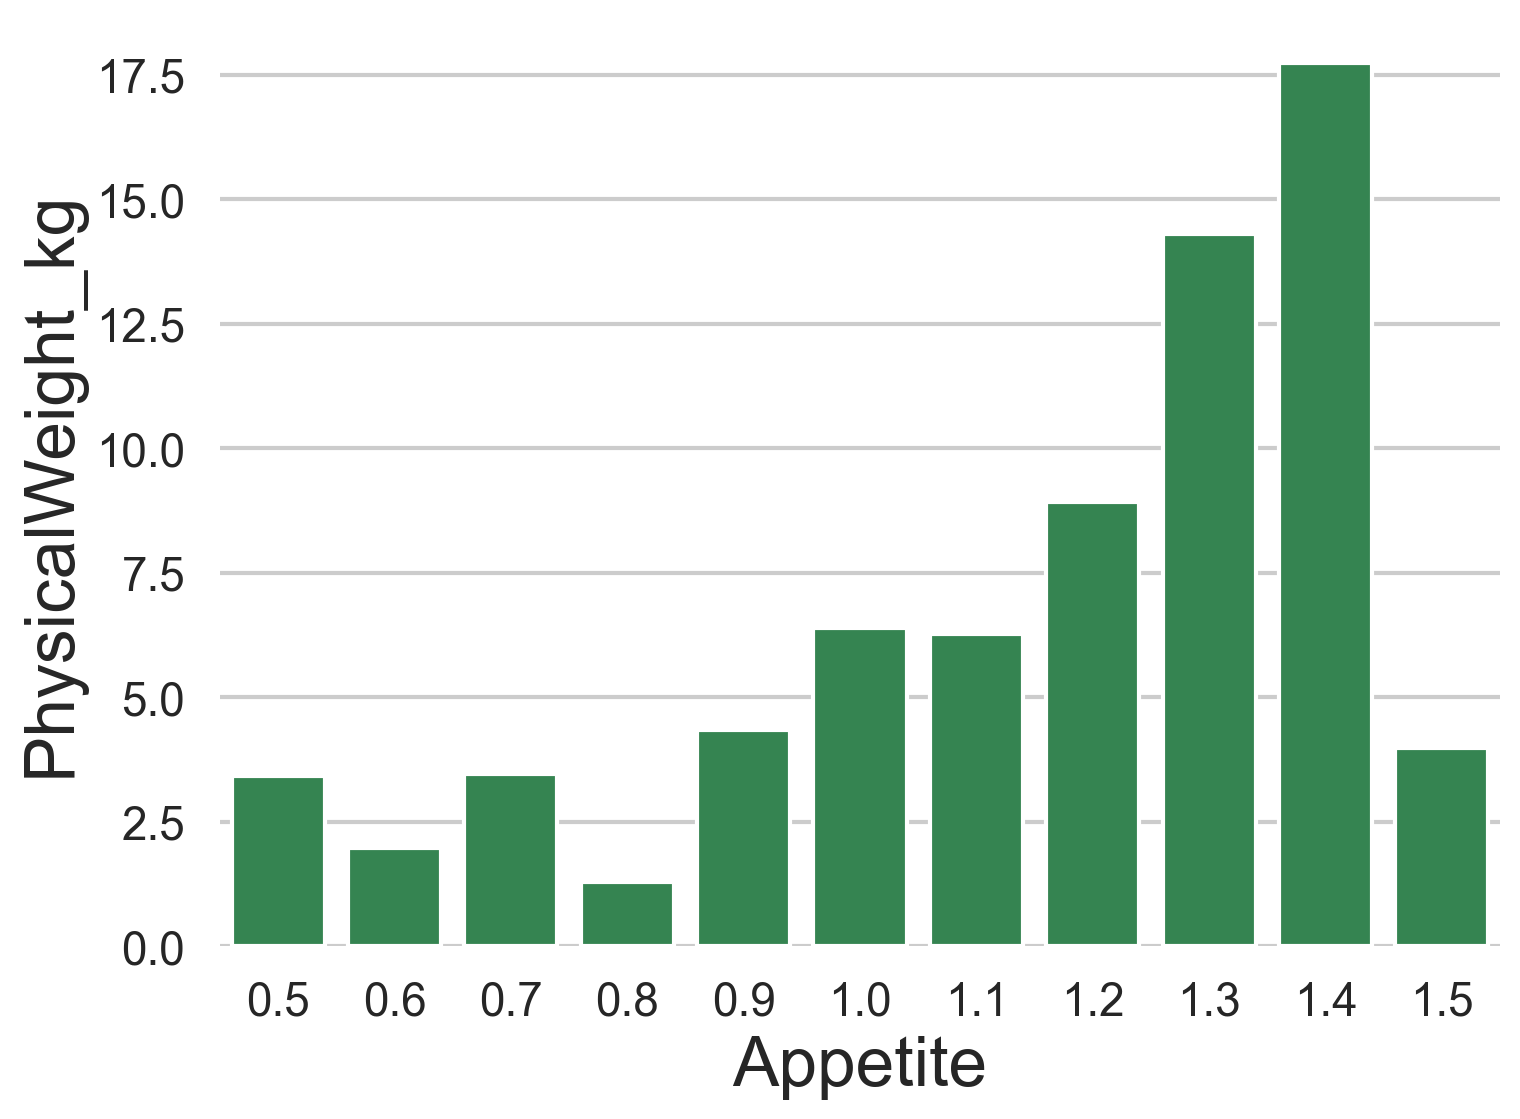

In [70]:
sns.barplot(data=gb, x='Appetite', y='PhysicalWeight_kg')

<Axes: xlabel='Appetite', ylabel='PhysicalWeight_kg'>

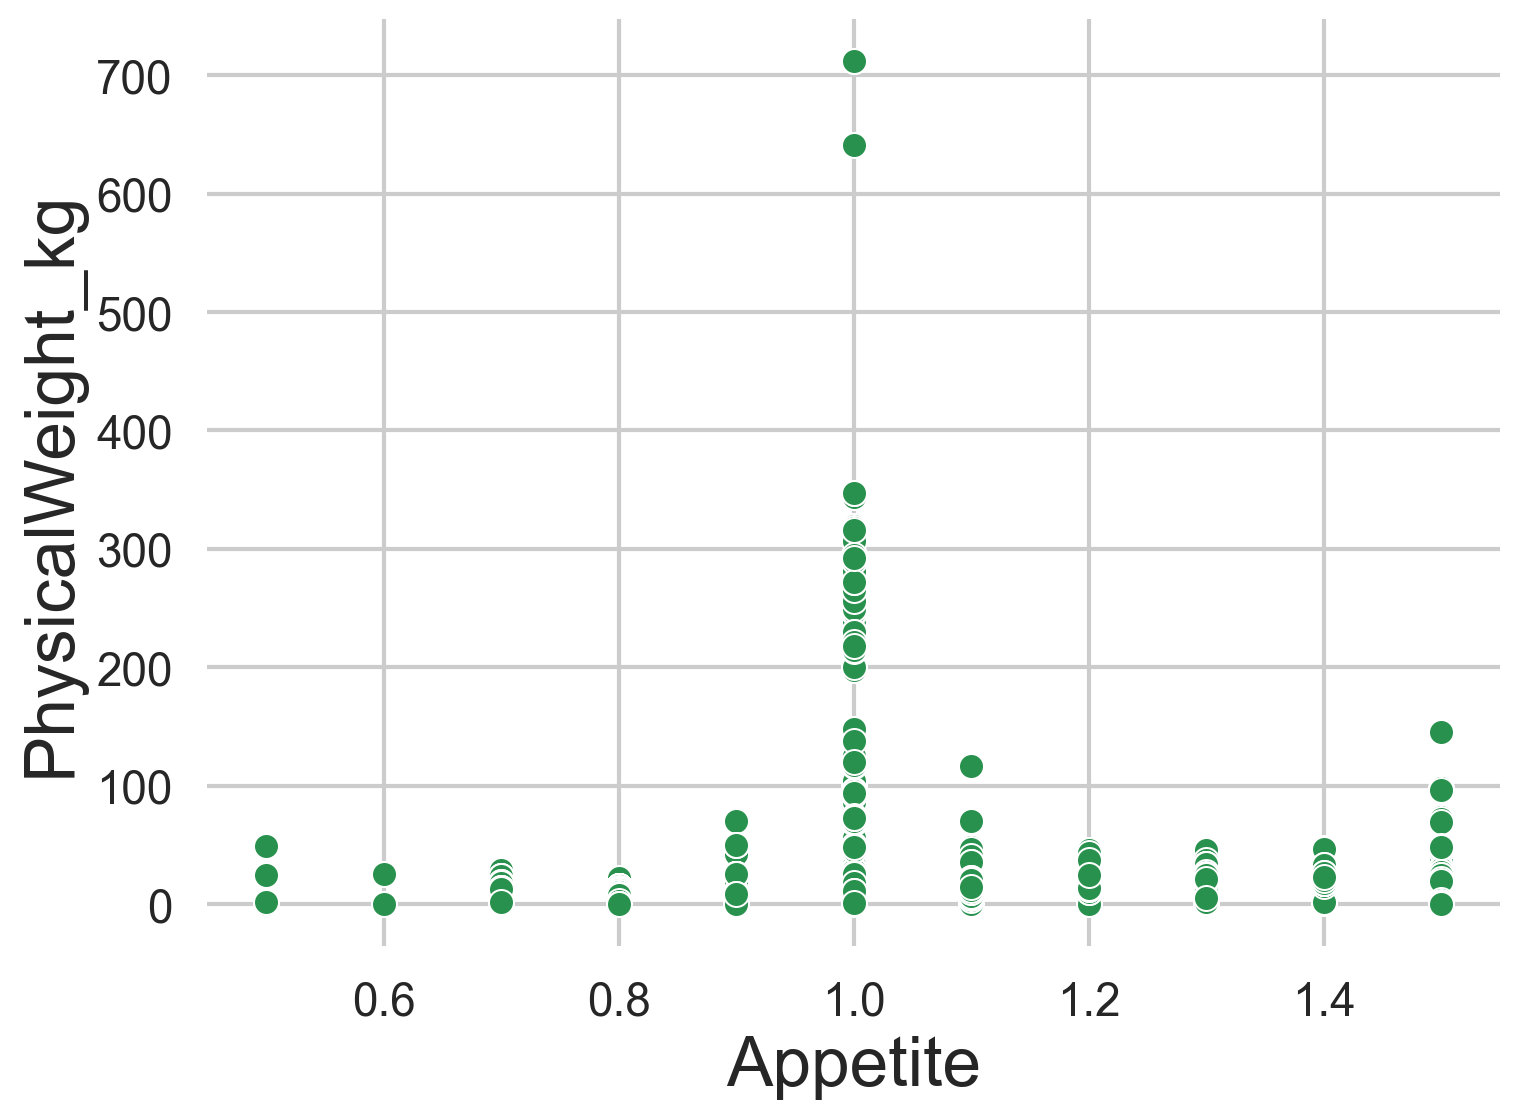

In [71]:
sns.scatterplot(data=feeding_and_details[feeding_and_details['IngredientType'] == 'Medication'], x='Appetite', y='PhysicalWeight_kg')